# Bird Observation Data Analysis / 鸟类观测数据分析

This notebook analyzes bird observation data from 2014-2025, including species diversity, temporal trends, and environmental influences.

本笔记本分析 2014-2025 年的鸟类观测数据，包括物种多样性、时间趋势和环境影响。

## 1. Data Loading / 数据加载

Load bird observation data from Excel file.

从 Excel 文件加载鸟类观测数据。

In [1063]:
import pandas as pd
file_path = "Observations 2012-2025.xlsx"
df = pd.read_excel(file_path)

In [1064]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Aigrette bleue    86 non-null     object
 1   Egretta caerulea  86 non-null     object
 2   Migrateur         85 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


## 2. Load Observation Data / 加载观测数据表

Load bird species observation data from "NOM FRANÇAIS" sheet.

从"NOM FRANÇAIS"工作表加载鸟类物种观测数据。

In [1065]:
column_names = [
    'Nom_observateur',
    'code_departement', 
    'Nom_transect',
    'date',
    'passage',
    'nuages',
    'pluie', 
    'vent',
    'visibilite',
    'N_point',
    'heure_debut',
    'ESPECE',
    'dist_25m_Auditif',
    'dist_25m_Visuel',
    'dist_50m_Auditif', 
    'dist_50m_Visuel',
    'dist_100m_Auditif',
    'dist_100m_Visuel',
    'dist_plus100m_Auditif',
    'dist_plus100m_Visuel',
    'vol',
    'total_Auditif',
    'total_Visuel_sans_vol',
    'total_AV_sans_vol',
    'total_AV_avec_vol'
]

In [1066]:
obs_data = pd.read_excel(
    file_path,
    sheet_name='NOM FRANÇAIS',
    header=None,      
    skiprows=3,       
    names=column_names,
    index_col=False
)

In [1067]:
obs_data.shape

(114495, 25)

In [1068]:
obs_data.head()

Nom_observateur  code_departement  Nom_transect                 date  \
0    BELFAN David             972.0  Fond l'Etang  2014-04-12 00:00:00   
1    BELFAN David             972.0  Fond l'Etang  2014-04-12 00:00:00   
2    BELFAN David             972.0  Fond l'Etang  2014-04-12 00:00:00   
3    BELFAN David             972.0  Fond l'Etang  2014-04-12 00:00:00   
4    BELFAN David             972.0  Fond l'Etang  2014-04-12 00:00:00   

   passage nuages  pluie  vent  visibilite  N_point  ... dist_50m_Visuel  \
0        1      2    1.0   1.0         1.0        1  ...             NaN   
1        1      2    1.0   1.0         1.0        1  ...             NaN   
2        1      2    1.0   1.0         1.0        1  ...             NaN   
3        1      2    1.0   1.0         1.0        1  ...             NaN   
4        1      2    1.0   1.0         1.0        1  ...             NaN   

  dist_100m_Auditif dist_100m_Visuel dist_plus100m_Auditif  \
0               NaN              NaN                   NaN   
1               NaN              NaN                   NaN   
2               NaN              NaN                   NaN   
3               NaN              NaN                   NaN   
4               NaN              NaN                   NaN   

   dist_plus100m_Visuel  vol  total_Auditif  total_Visuel_sans_vol  \
0                   NaN  NaN            1.0                    0.0   
1                   NaN  NaN            0.0                    1.0   
2                   NaN  NaN            0.0                    2.0   
3                   NaN  NaN            1.0                    0.0   
4                   NaN  NaN            1.0                    0.0   

   total_AV_sans_vol  total_AV_avec_vol  
0                  1                1.0  
1                  1                1.0  
2                  2                2.0  
3                  1                1.0  
4                  1                1.0  

[5 rows x 25 columns]

## 3. Load Species Reference Data / 加载物种参考数据

Load species information from "ESPECES" sheet including French names, scientific names, and migration status.

从"ESPECES"工作表加载物种信息,包括法语名称、学名和迁徙状态。

In [1069]:
species_column_names = [
    'nom_francais',
    'nom_scientifique',
    'statut_migratoire'
]

species_data = pd.read_excel(file_path, sheet_name='ESPECES', header=0, names=species_column_names)
species_data.head()

nom_francais             nom_scientifique  \
0       Aigrette garzette             Egretta garzetta   
1       Aigrette neigeuse                Egretta thula   
2      Aigrette tricolore  Egretta tricolor ruficollis   
3          Amazone aourou            Amazona amazonica   
4  Astrild à joues orange             Estrilda melpoda   

               statut_migratoire  
0                      Migrateur  
1                      Migrateur  
2                      Migrateur  
3  Exogène introduit par l'homme  
4                            NaN

## 4. Load Site and Habitat Data / 加载站点和栖息地数据

Load GPS coordinates and habitat information from "GPS-MILIEU" sheet.

从"GPS-MILIEU"工作表加载 GPS 坐标和栖息地信息。

In [1070]:
site_column_names = [
    'transect_name',
    'utm_x',
    'utm_y',
    'habitat_type',
    'site_id',
    'point_id'
]

In [1071]:
site_data = pd.read_excel(file_path, sheet_name='GPS-MILIEU',skiprows=2, names=site_column_names)

In [1072]:
site_data.head()

transect_name   utm_x    utm_y habitat_type site_id point_id
0      Aéroport  714416  1614194     Mangrove      S1     S1P2
1      Aéroport  714133  1614141     Mangrove      S1     S1P3
2      Aéroport  713914  1614103     Mangrove      S1     S1P4
3      Aéroport  713719  1614062     Mangrove      S1     S1P5
4      Aéroport  713559  1614036     Mangrove      S1     S1P6

## 5. Exploratory Data Analysis / 探索性数据分析

### 5.1 Dataset Overview / 数据集概览

Basic information about the observation dataset including dimensions, date range, and unique entities.

观测数据集的基本信息,包括维度、日期范围和唯一实体。

In [1073]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Dataset Overview ===")
print(f"Shape (rows, columns): {obs_data.shape}")

obs_data['date'] = pd.to_datetime(obs_data['date'], errors='coerce')
time_min, time_max = obs_data['date'].min(), obs_data['date'].max()
print(f"Date range: {time_min.date()} to {time_max.date()}")

unique_transects = obs_data['Nom_transect'].nunique()
unique_observers = obs_data['Nom_observateur'].nunique()
unique_species = obs_data['ESPECE'].nunique()
print(f"Unique transects: {unique_transects}")
print(f"Unique observers: {unique_observers}")
print(f"Unique species: {unique_species}")

=== Dataset Overview ===
Shape (rows, columns): (114495, 25)
Date range: 2014-03-29 to 2025-07-03
Unique transects: 74
Unique observers: 49
Unique species: 103


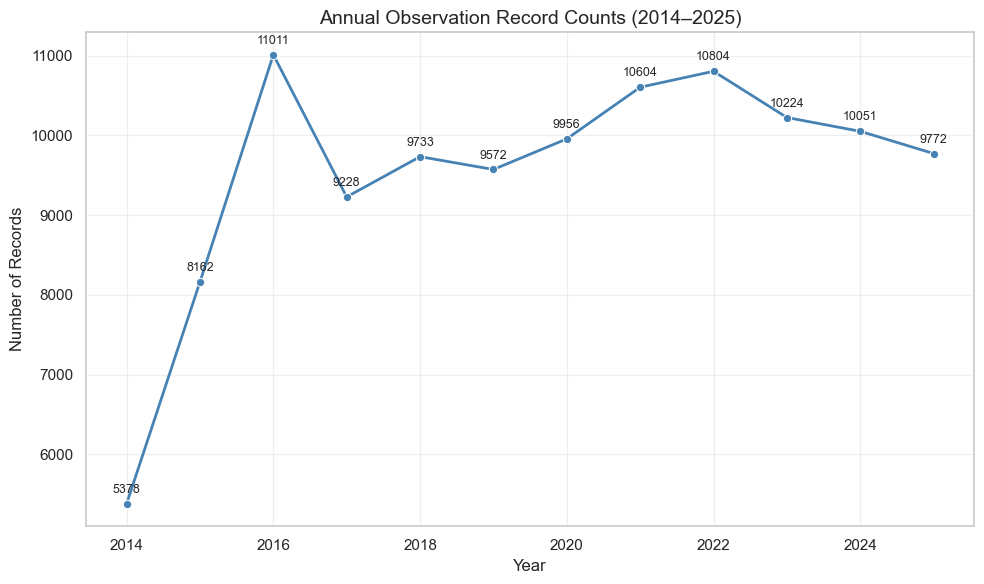

In [1074]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

obs_data['date'] = pd.to_datetime(obs_data['date'], errors='coerce')
obs_data['year'] = obs_data['date'].dt.year

annual_counts = (
    obs_data.groupby('year')
    .size()
    .reset_index(name='record_count')
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=annual_counts,
    x='year',
    y='record_count',
    marker='o',
    color='steelblue',
    linewidth=2
)

for i in range(len(annual_counts)):
    plt.text(
        annual_counts['year'][i],
        annual_counts['record_count'][i] + 100,
        str(annual_counts['record_count'][i]),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Annual Observation Record Counts (2014–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Annual Observation Trends / 年度观测趋势

Annual record counts showing observation effort over time.

年度记录数量,显示观测工作量的时间变化。

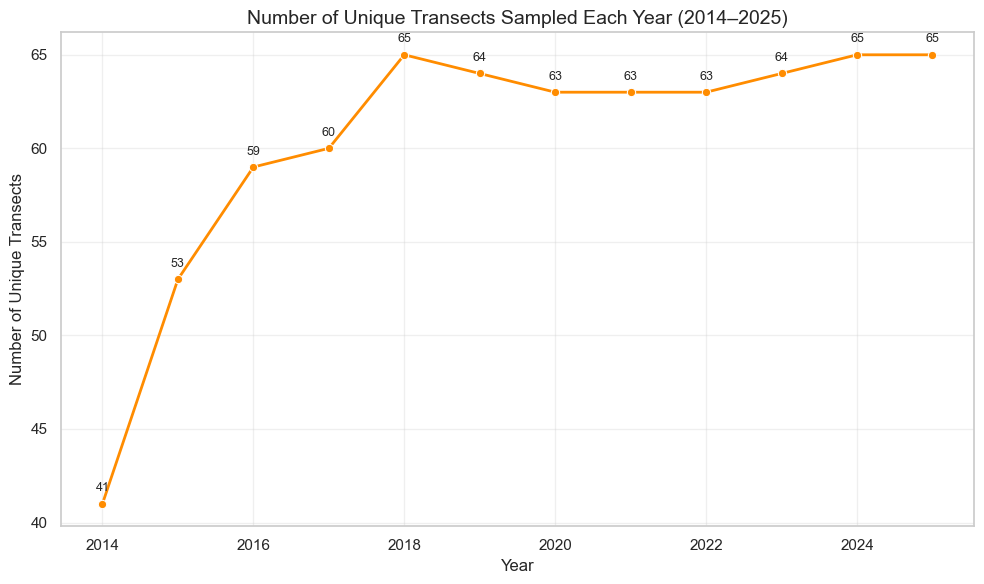

In [1075]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

obs_data['date'] = pd.to_datetime(obs_data['date'], errors='coerce')
obs_data['year'] = obs_data['date'].dt.year

transect_per_year = (
    obs_data.groupby('year')['Nom_transect']
    .nunique()
    .reset_index(name='unique_transects')
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=transect_per_year,
    x='year',
    y='unique_transects',
    marker='o',
    color='darkorange',
    linewidth=2
)

for i in range(len(transect_per_year)):
    plt.text(
        transect_per_year['year'][i],
        transect_per_year['unique_transects'][i] + 0.5,
        str(transect_per_year['unique_transects'][i]),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Number of Unique Transects Sampled Each Year (2014–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Unique Transects", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 5.3 Spatial Coverage Over Time / 空间覆盖随时间的变化

Number of unique transects surveyed each year.

每年调查的唯一样线数量。

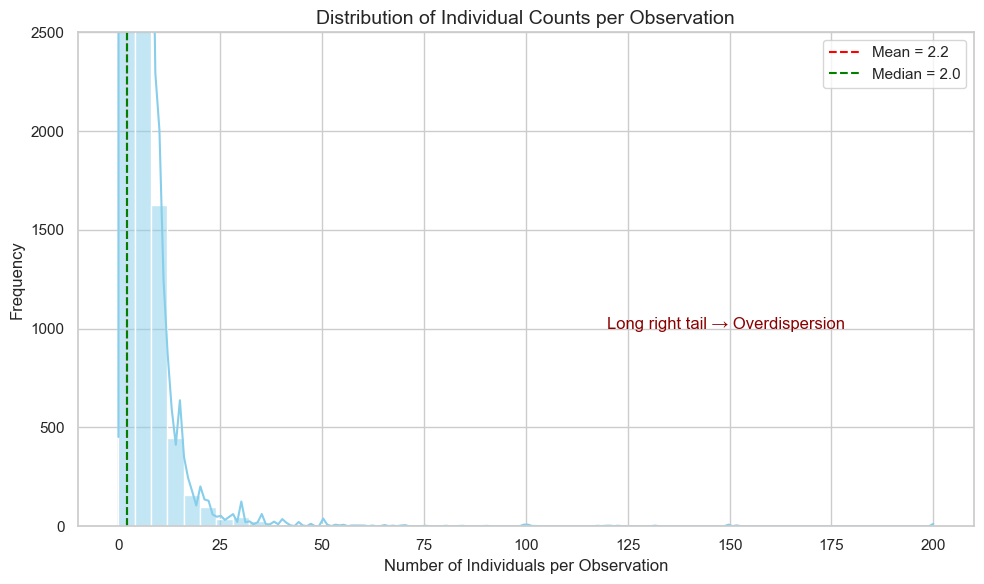

In [1076]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure total count column exists
if 'total_AV_avec_vol' in obs_data.columns:
    count_col = 'total_AV_avec_vol'
else:
    dist_cols = [
        'dist_25m_Auditif', 'dist_25m_Visuel',
        'dist_50m_Auditif', 'dist_50m_Visuel',
        'dist_100m_Auditif', 'dist_100m_Visuel',
        'dist_plus100m_Auditif', 'dist_plus100m_Visuel'
    ]
    obs_data['total_count'] = obs_data[dist_cols].sum(axis=1)
    count_col = 'total_count'

count_data = obs_data[count_col].dropna()

plt.figure(figsize=(10,6))
sns.histplot(count_data, bins=50, kde=True, color='skyblue')

# Set y-axis limits to better visualize small counts
plt.ylim(0, 2500)  # ✅ Y-axis from 0 to 100,000

# Titles and labels
plt.title("Distribution of Individual Counts per Observation", fontsize=14)
plt.xlabel("Number of Individuals per Observation")
plt.ylabel("Frequency")

# Key statistics
mean_val = count_data.mean()
median_val = count_data.median()
max_val = count_data.max()

plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.1f}")
plt.axvline(median_val, color='green', linestyle='--', label=f"Median = {median_val:.1f}")
plt.legend()

plt.text(max_val * 0.6, 1000, "Long right tail → Overdispersion", fontsize=12, color='darkred')

plt.tight_layout()
plt.show()

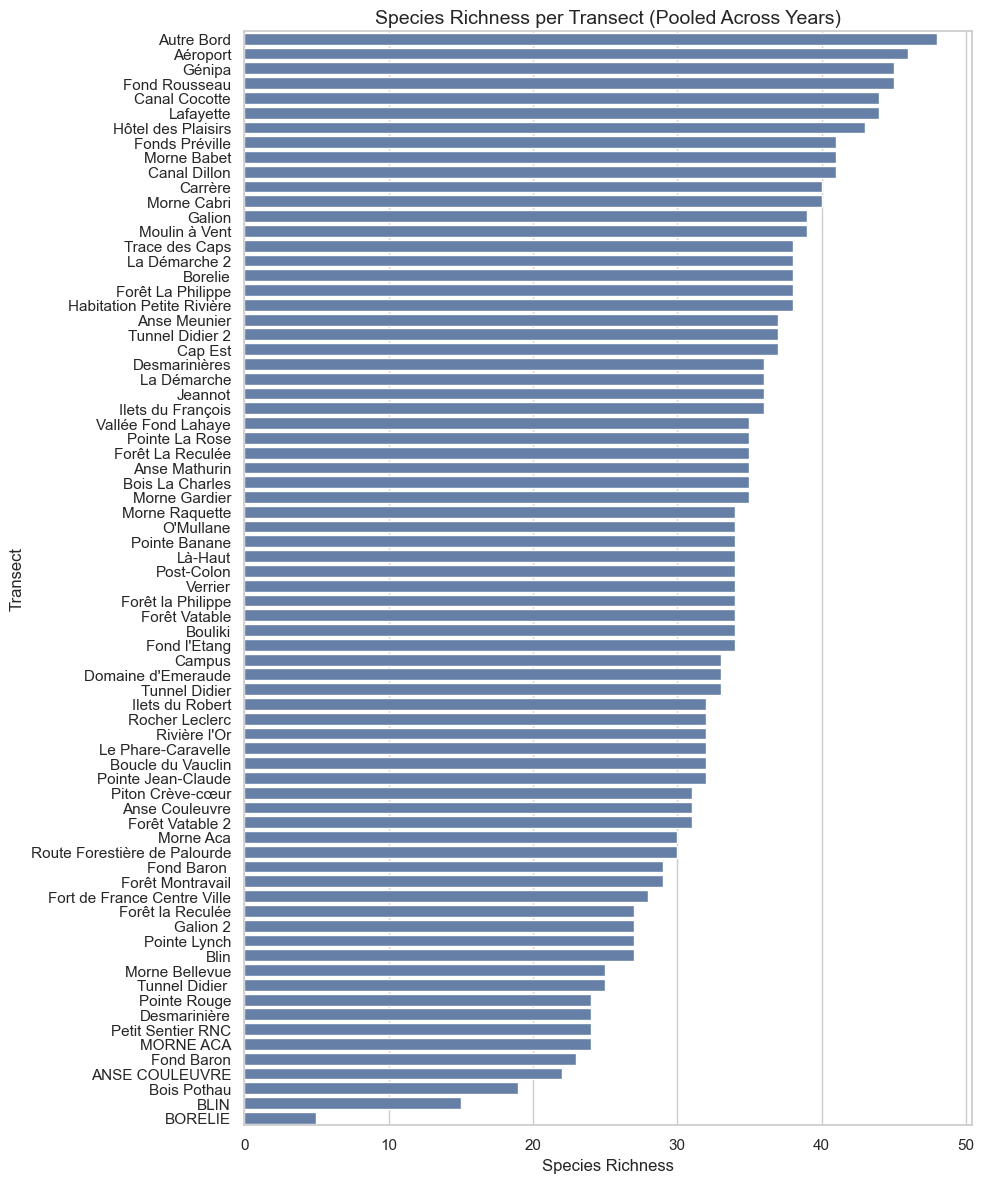

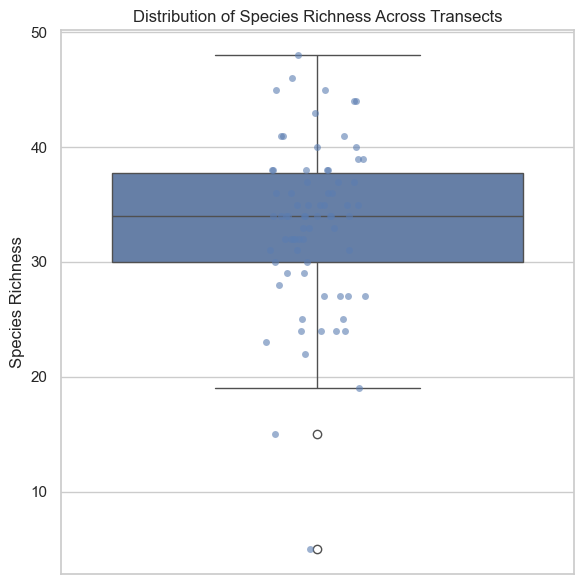

In [1077]:
# %% [markdown]
# ## Species Richness per Transect (Pooled Across Years)
# ## 每条样线物种丰富度（多年度合并）

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 确保 Seaborn 风格
sns.set(style="whitegrid")

# 计算每条样线的物种丰富度（去重物种数量）
transect_richness = (
    obs_data.groupby('Nom_transect')['ESPECE']
    .nunique()  # unique species count
    .reset_index(name='species_richness')
    .sort_values('species_richness', ascending=False)
)

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Horizontal bar plot / 横向条形图
plt.figure(figsize=(10,12))
sns.barplot(
    data=transect_richness,
    y='Nom_transect',
    x='species_richness',
    color='#5B7DB1',  # 柔和蓝色
    orient='h'
)
plt.xlabel("Species Richness")
plt.ylabel("Transect")
plt.title("Species Richness per Transect (Pooled Across Years)", fontsize=14)
plt.tight_layout()
plt.show()

# Boxplot with jittered points / 箱线图 + 散点
plt.figure(figsize=(6,6))
sns.boxplot(y='species_richness', data=transect_richness, color='#5B7DB1')
sns.stripplot(y='species_richness', data=transect_richness, color='#5B7DB1', alpha=0.6, jitter=True)
plt.ylabel("Species Richness")
plt.title("Distribution of Species Richness Across Transects")
plt.tight_layout()
plt.show()

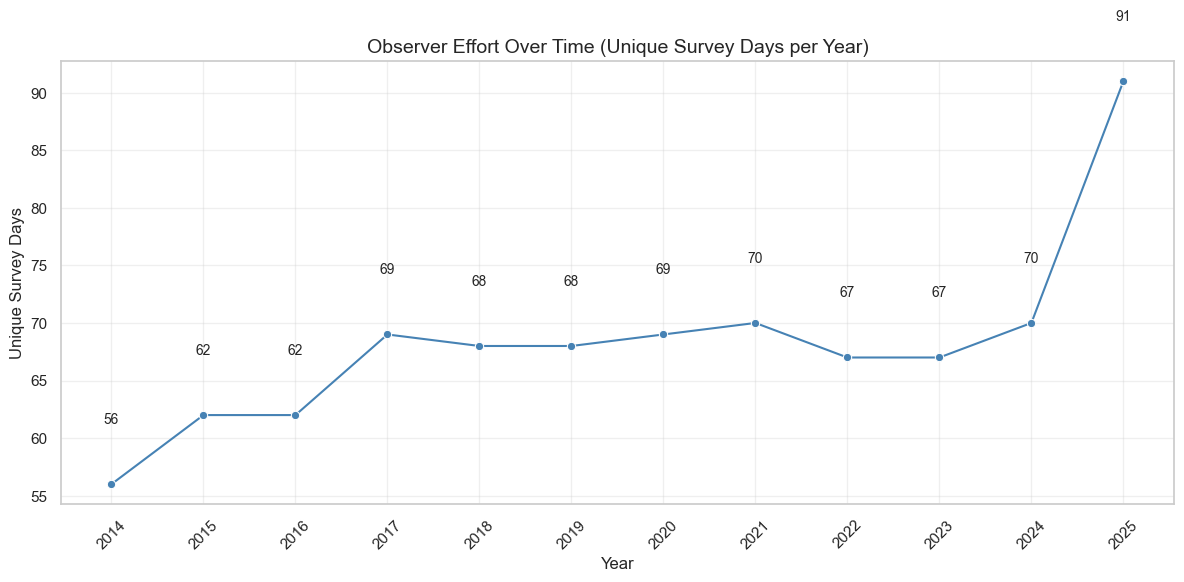

In [1078]:
# 每年观测日数量
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure year and date columns exist
obs_data['year'] = obs_data['date'].dt.year

# Count unique survey days per year
annual_effort = (
    obs_data.groupby('year')['date']
    .nunique()
    .reset_index(name='unique_survey_days')
)

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(
    data=annual_effort,
    x='year',
    y='unique_survey_days',
    marker='o',
    color='steelblue'
)

# Annotate points with values
for i, row in annual_effort.iterrows():
    plt.text(row['year'], row['unique_survey_days']+5, int(row['unique_survey_days']),
             ha='center', va='bottom', fontsize=10)

# Set x-axis to show each year
plt.xticks(annual_effort['year'], rotation=45)

plt.title("Observer Effort Over Time (Unique Survey Days per Year)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unique Survey Days", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 5.4 Observation Effort Analysis / 观测努力量分析

Analysis of survey effort across time, transects, and observers.

跨时间、样线和观察者的调查努力量分析。

## Calculate and visualise observation effort over time and across transects.
## 计算并可视化时间和样线维度上的观测努力量

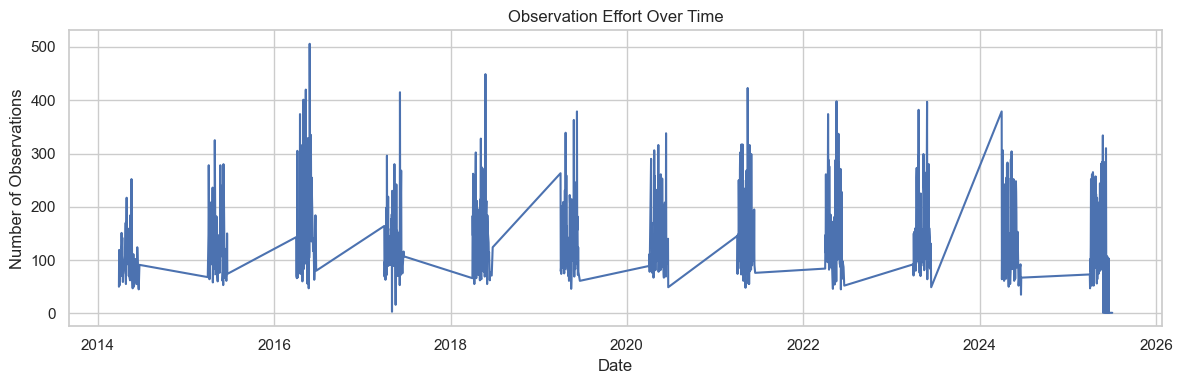

In [1079]:
effort_by_date = obs_data.groupby('date').size().reset_index(name='n_observations')

plt.figure(figsize=(12, 4))
sns.lineplot(data=effort_by_date, x='date', y='n_observations')
plt.title("Observation Effort Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Observations")
plt.tight_layout()
plt.show()

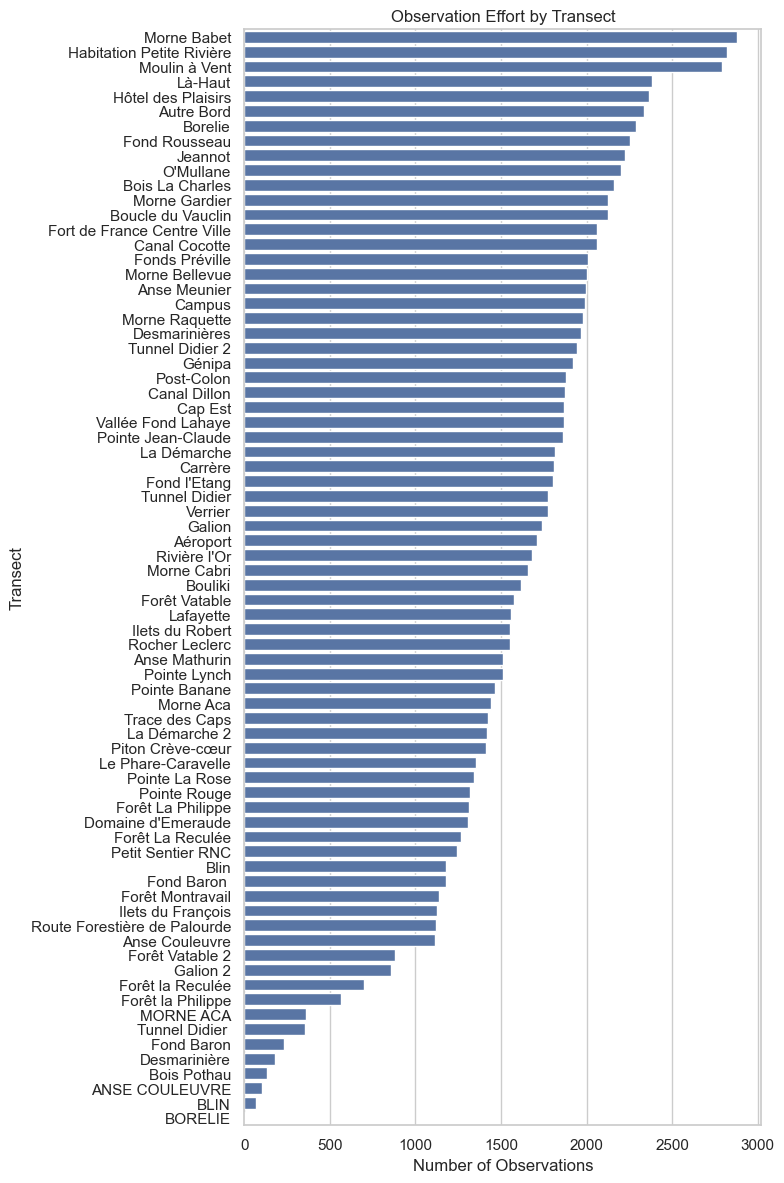

In [1080]:
# 2.2 Effort by transect (number of observations per transect)
# 样线维度上的努力量（每条样线观测记录数）
effort_by_transect = obs_data.groupby('Nom_transect').size().sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=effort_by_transect.values, y=effort_by_transect.index)
plt.title("Observation Effort by Transect")
plt.xlabel("Number of Observations")
plt.ylabel("Transect")
plt.tight_layout()
plt.show()

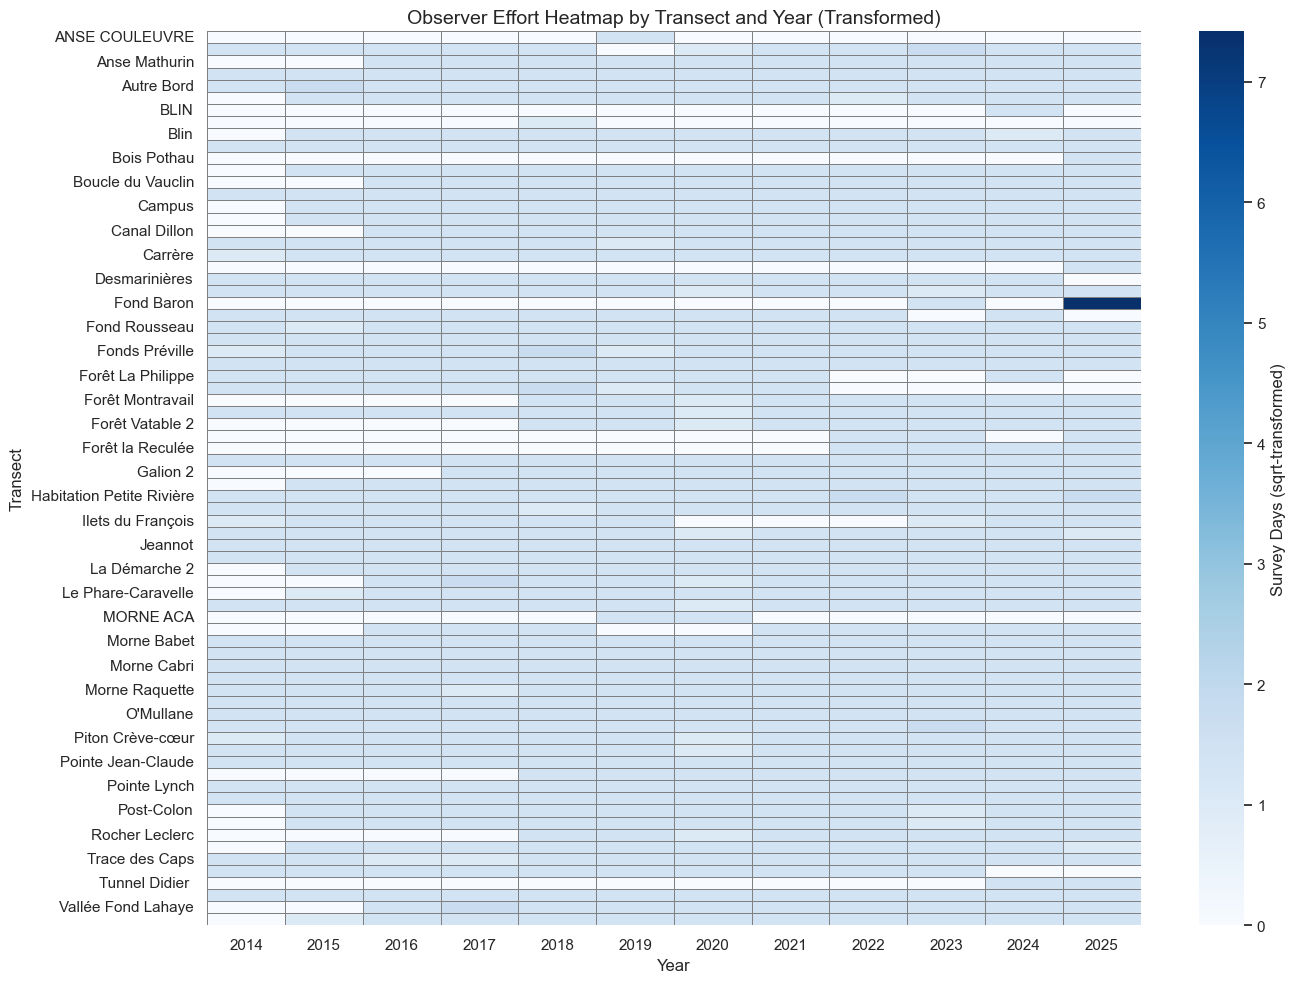

In [1081]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure year column exists
obs_data['year'] = obs_data['date'].dt.year

# Count number of unique survey days per transect per year
effort_transect_year = (
    obs_data.groupby(['Nom_transect', 'year'])['date']
    .nunique()  # unique survey days as effort
    .reset_index(name='survey_days')
)

# Pivot to create transect x year matrix
# Pivot 表格
effort_pivot = effort_transect_year.pivot(index='Nom_transect', columns='year', values='survey_days')

# 可视化时使用对数或平方根增强对比
effort_display = np.sqrt(effort_pivot.fillna(0))  # 对数也可以： np.log1p(effort_pivot)

plt.figure(figsize=(14,10))
sns.heatmap(
    effort_display,
    cmap="Blues",  # 蓝色
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Survey Days (sqrt-transformed)'},
    square=False
)
plt.title("Observer Effort Heatmap by Transect and Year (Transformed)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Transect", fontsize=12)
plt.tight_layout()
plt.show()

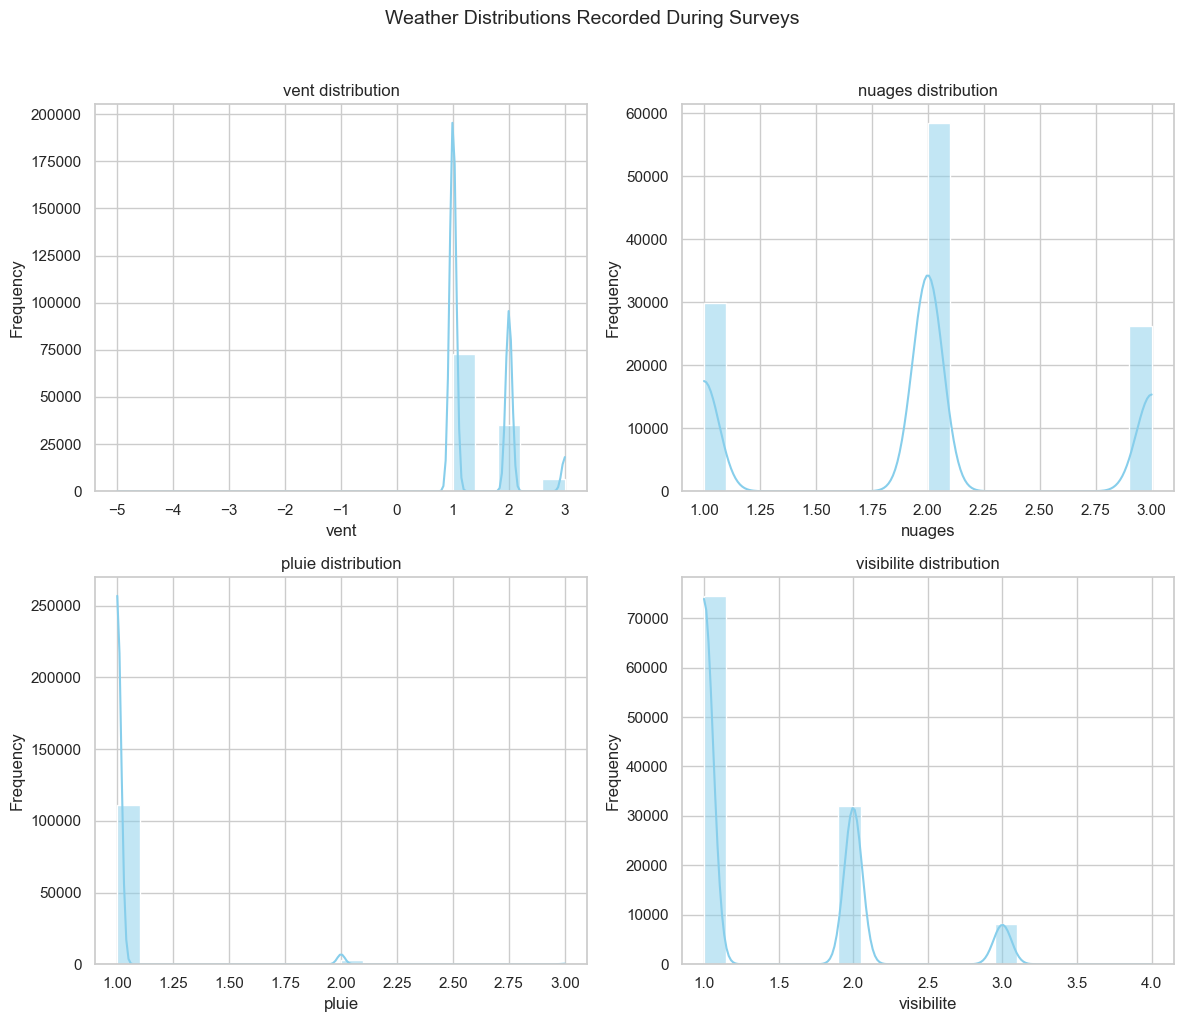

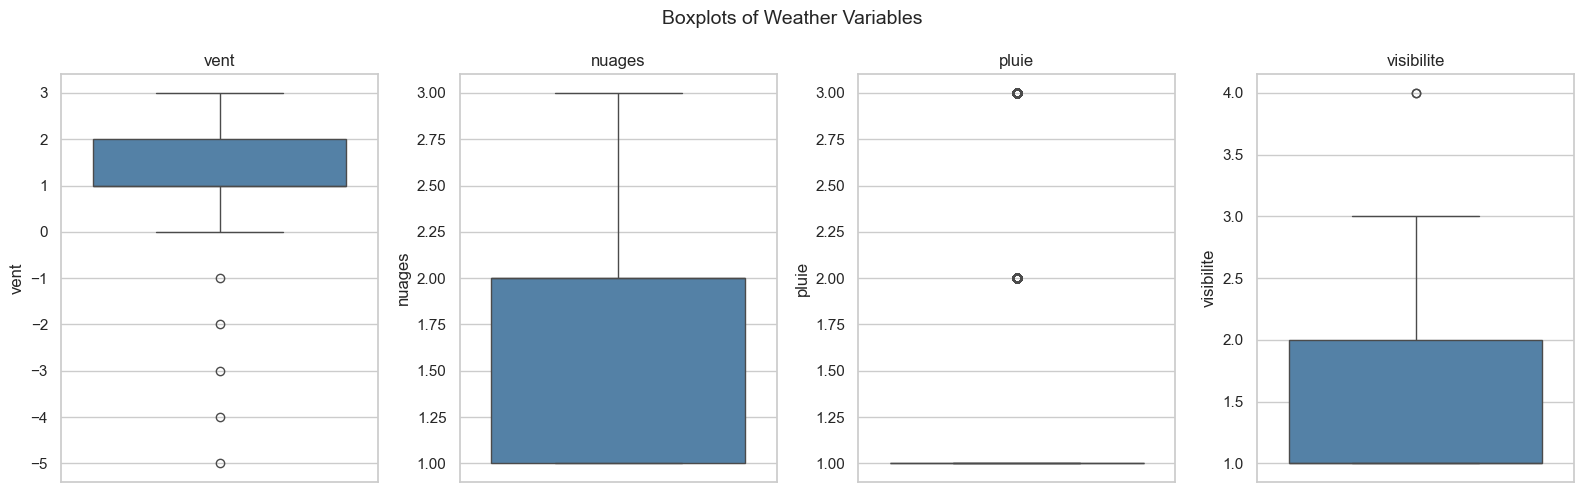

In [1082]:
# # 四个天气变量（vent、nuages、pluie、visibilite）分布，使用 箱线图 + 密度图
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # 设置 Seaborn 风格
# sns.set(style="whitegrid")
# 
# # 天气变量列表
# weather_cols = ['vent', 'nuages', 'pluie', 'visibilite']
# 
# # 创建子图布局
# n_cols = 2
# n_rows = 2
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
# axes = axes.flatten()
# 
# # 遍历每个天气变量绘制分布
# for i, col in enumerate(weather_cols):
#     sns.histplot(
#         data=obs_data,
#         x=col,
#         bins=20,
#         kde=True,
#         color='skyblue',
#         ax=axes[i]
#     )
#     axes[i].set_title(f"{col} distribution", fontsize=12)
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel("Frequency")
# 
# plt.suptitle("Weather Distributions Recorded During Surveys", fontsize=14, y=1.02)
# plt.tight_layout()
# plt.show()
# 
# # %%
# # 可选：绘制箱线图查看极端值
# fig, axes = plt.subplots(1, 4, figsize=(16, 5))
# for i, col in enumerate(weather_cols):
#     sns.boxplot(
#         y=obs_data[col],
#         color='steelblue',
#         ax=axes[i]
#     )
#     axes[i].set_title(f"{col}", fontsize=12)
# plt.suptitle("Boxplots of Weather Variables", fontsize=14)
# plt.tight_layout()
# plt.show()

# %% [markdown]
# ## Weather Variables Distribution
# Distribution of four weather variables (vent, nuages, pluie, visibilite) using histograms and boxplots

# %%
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid")

# List of weather variables
weather_cols = ['vent', 'nuages', 'pluie', 'visibilite']

# -------------------------------
# 1. Histograms + Density Plots
# -------------------------------
n_cols = 2
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(weather_cols):
    # Ensure data is numeric and remove NaNs
    data = pd.to_numeric(obs_data[col], errors='coerce').dropna()
    
    sns.histplot(
        data=data,
        bins=20,
        kde=True,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f"{col} distribution", fontsize=12)
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("Frequency")

plt.suptitle("Weather Distributions Recorded During Surveys", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Boxplots to Visualize Outliers
# -------------------------------
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for i, col in enumerate(weather_cols):
    data = pd.to_numeric(obs_data[col], errors='coerce').dropna()
    sns.boxplot(
        y=data,
        color='steelblue',
        ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=12)

plt.suptitle("Boxplots of Weather Variables", fontsize=14)
plt.tight_layout()
plt.show()

In [1083]:
# # 天气和鸟的关系分析
# # ## Relationship Between Weather and Observed Bird Counts
# # Explore how temperature, wind speed, precipitation, and cloud cover relate to total bird counts
# 
# # %%
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# 
# # 确保使用总计列
# count_col = 'total_AV_avec_vol'
# 
# # 选择天气变量
# weather_cols = ['vent', 'pluie', 'visibilite', 'nuages']
# 
# # 设置 Seaborn 风格
# sns.set(style="whitegrid")
# 
# # 1. Scatter plots for continuous weather variables vs total counts
# plt.figure(figsize=(16, 12))
# for i, col in enumerate(weather_cols, 1):
#     plt.subplot(2, 2, i)
#     sns.scatterplot(
#         x=col,
#         y=count_col,
#         data=obs_data_cleaned,
#         alpha=0.5,
#         color='steelblue'
#     )
#     plt.title(f"{col} vs {count_col}")
#     plt.xlabel(col)
#     plt.ylabel("Total Count")
# plt.tight_layout()
# plt.show()
# 
# # 2. Boxplots / Violin plots for discrete weather levels
# plt.figure(figsize=(16, 12))
# for i, col in enumerate(weather_cols, 1):
#     plt.subplot(2, 2, i)
#     sns.boxplot(
#         x=col,
#         y=count_col,
#         data=obs_data,
#         color='skyblue'
#     )
#     # 也可以用小提琴图
#     # sns.violinplot(x=col, y=count_col, data=obs_data, color='skyblue', inner='quartile')
#     plt.title(f"{count_col} by {col} levels")
#     plt.xlabel(col)
#     plt.ylabel("Total Count")
# plt.tight_layout()
# plt.show()

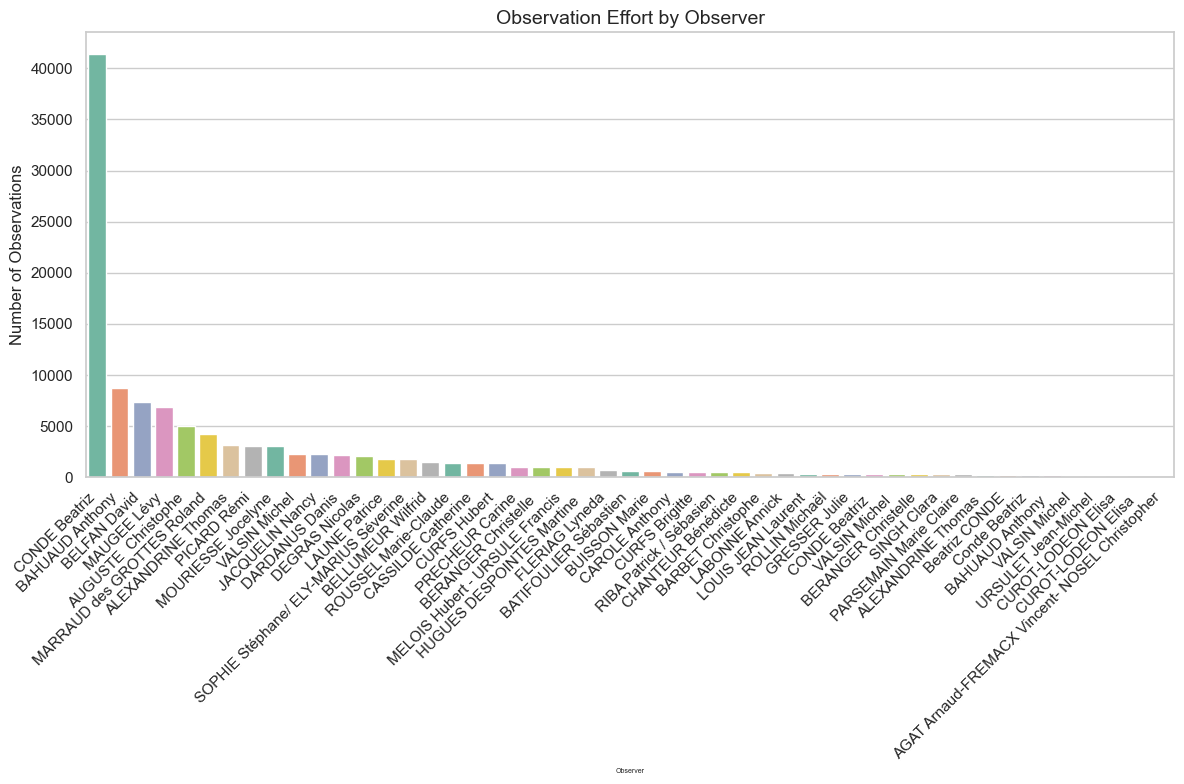

In [1084]:
# 2.3 Effort by observer
# 观察者努力量 / 每位观察者观测次数

# 计算每位观察者的观测次数 / Count observations per observer
effort_by_observer = obs_data['Nom_observateur'].value_counts()

# 将 Series 转为 DataFrame / Convert Series to DataFrame
observer_df = effort_by_observer.reset_index()
observer_df.columns = ['Observer', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Observer',
    y='Count',
    data=observer_df,
    hue='Observer',   # 使用 hue 兼容 seaborn 未来版本
    dodge=False,      # 不拆分箱体
    palette="Set2",
    legend=False      # 隐藏图例
)
plt.title("Observation Effort by Observer", fontsize=14)
plt.xlabel("Observer", fontsize=5)
plt.ylabel("Number of Observations", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [1085]:
# ## 3. Distribution of species counts
# ## 3. 物种计数分布
# Descriptive statistics for numeric variables related to counts.
# 对计数相关的数值列进行描述性统计

# %%
# Define numeric columns
# 定义数值列 / numeric columns for counts
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Convert numeric columns
# 转换为数值类型 / convert to numeric
obs_data[count_cols] = obs_data[count_cols].apply(pd.to_numeric, errors='coerce')

# Summary statistics
# 数值列描述性统计 / descriptive statistics
count_summary = obs_data[count_cols].describe().T
print("=== Descriptive Statistics for Counts===")
count_summary


=== Descriptive Statistics for Counts===


count      mean        std       min  25%  50%  75%  \
dist_25m_Auditif        58829.0  1.619694   0.960943  0.000000  1.0  1.0  2.0   
dist_25m_Visuel         39190.0  2.011687   2.567085  0.000000  1.0  1.0  2.0   
dist_50m_Auditif        31148.0  1.298831   0.681653  0.000000  1.0  1.0  1.0   
dist_50m_Visuel          5432.0  2.051178   3.573717  0.000000  1.0  1.0  2.0   
dist_100m_Auditif        8402.0  1.235777   0.667929  0.000000  1.0  1.0  1.0   
dist_100m_Visuel         1531.0  1.951012   4.316356  0.000000  1.0  1.0  2.0   
dist_plus100m_Auditif    2648.0  1.305136   3.979901  0.000000  1.0  1.0  1.0   
dist_plus100m_Visuel     1388.0  4.189481  12.844451  0.000000  1.0  1.0  3.0   
vol                      1821.0  1.983526   4.056436  0.000000  1.0  1.0  2.0   
total_Auditif          114255.0  1.305836   1.339722  0.000000  1.0  1.0  2.0   
total_Visuel_sans_vol  114491.0  0.862018   2.599084 -1.190476  0.0  0.0  1.0   
total_AV_sans_vol      114489.0  2.165288   2.775428  0.000000  1.0  2.0  3.0   
total_AV_avec_vol      114495.0  2.199626   2.830612  0.000000  1.0  2.0  3.0   

                         max  
dist_25m_Auditif        40.0  
dist_25m_Visuel        121.0  
dist_50m_Auditif        23.0  
dist_50m_Visuel        100.0  
dist_100m_Auditif       22.0  
dist_100m_Visuel       150.0  
dist_plus100m_Auditif  200.0  
dist_plus100m_Visuel   200.0  
vol                     80.0  
total_Auditif          200.0  
total_Visuel_sans_vol  200.0  
total_AV_sans_vol      200.0  
total_AV_avec_vol      200.0

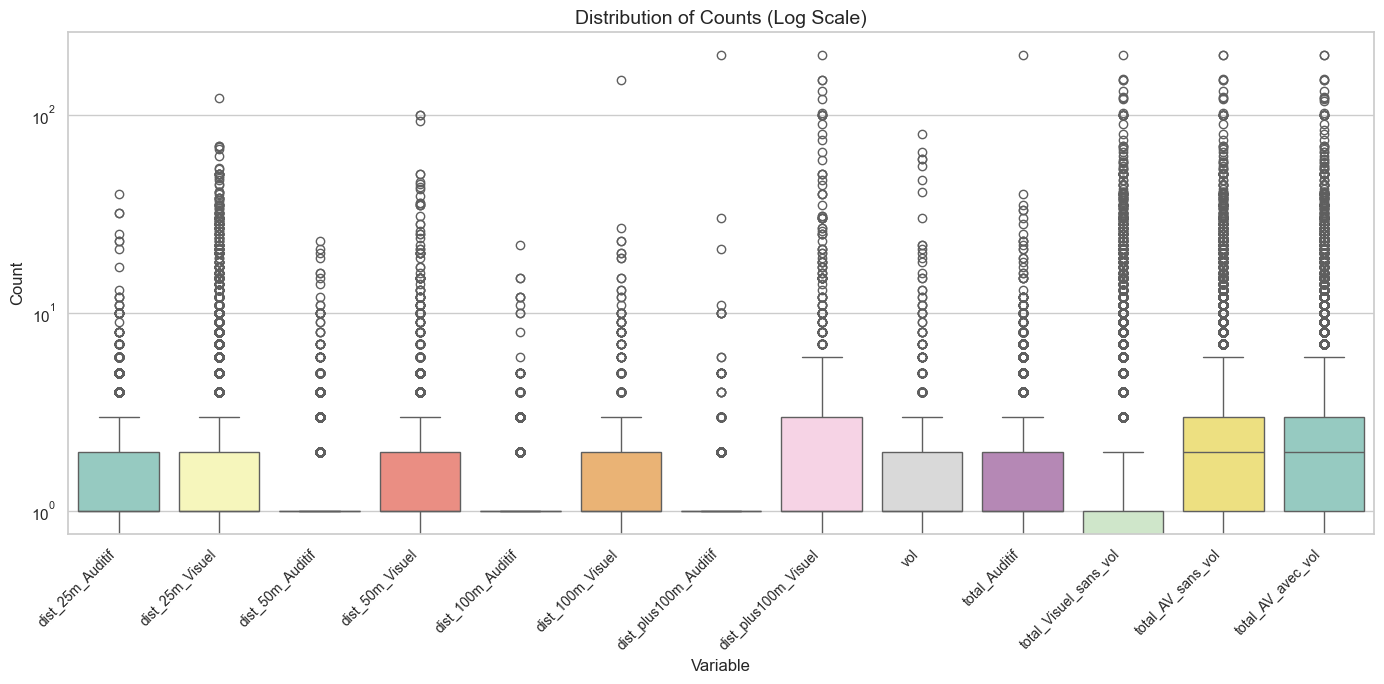

In [1086]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [1087]:
# ## 4. Weather conditions
# ## 4. 天气条件
# Distribution of environmental descriptors such as clouds, rain, wind, and visibility.
# 天气相关变量（云量、降雨、风力、能见度）的分布

# %%
# Convert weather columns to numeric
# 转换为数值类型 / convert to numeric
weather_cols = ['nuages', 'pluie', 'vent', 'visibilite']
obs_data[weather_cols] = obs_data[weather_cols].apply(pd.to_numeric, errors='coerce')


# Summary statistics
# 描述性统计 / descriptive statistics
weather_summary = obs_data[weather_cols].describe().T
print("=== Weather Conditions Summary / 天气条件描述性统计 ===")
weather_summary

=== Weather Conditions Summary / 天气条件描述性统计 ===


count      mean       std  min  25%  50%  75%  max
nuages      114493.0  1.968181  0.698651  1.0  1.0  2.0  2.0  3.0
pluie       114494.0  1.029355  0.177576  1.0  1.0  1.0  1.0  3.0
vent        114478.0  1.422885  0.600866 -5.0  1.0  1.0  2.0  3.0
visibilite  114494.0  1.419559  0.619856  1.0  1.0  1.0  2.0  4.0

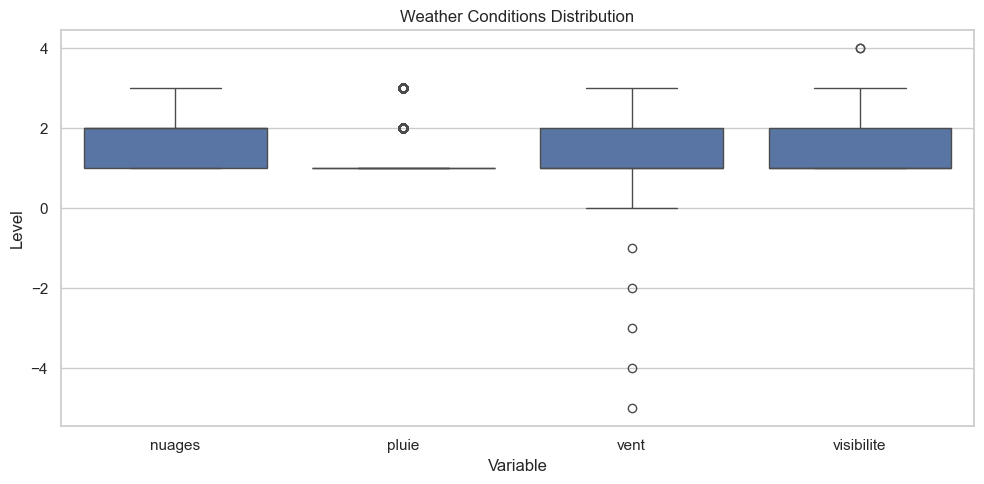

In [1088]:
# Boxplot for weather variables
# 天气条件箱线图 / boxplot
plt.figure(figsize=(10, 5))
melted_weather = obs_data[weather_cols].melt(var_name='Variable', value_name='Level')
sns.boxplot(x='Variable', y='Level', data=melted_weather)
plt.title("Weather Conditions Distribution")
plt.ylabel("Level")
plt.xlabel("Variable")
plt.tight_layout()
plt.show()

## 6. Data Preprocessing / 数据预处理

Clean and prepare the observation dataset for analysis.

清理和准备观测数据集以供分析。

In [1089]:
obs_data_cleaned = obs_data.copy()

### 6.1 Handle Duplicate Records / 处理重复记录

Check and remove duplicate observations.

检查并删除重复的观测记录。

Number of duplicate records: 2243


/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/3109588997.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_duplicate', data=obs_data_cleaned, palette=['skyblue','salmon'])


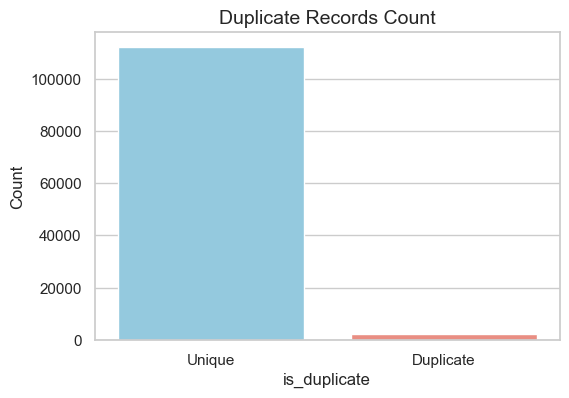

In [1090]:
num_duplicates = obs_data_cleaned.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

obs_data_cleaned['is_duplicate'] = obs_data_cleaned.duplicated()

plt.figure(figsize=(6,4))
sns.countplot(x='is_duplicate', data=obs_data_cleaned, palette=['skyblue','salmon'])
plt.xticks([0,1], ['Unique', 'Duplicate'])
plt.title("Duplicate Records Count", fontsize=14)
plt.ylabel("Count")
plt.show()

In [1091]:
obs_data_cleaned = obs_data_cleaned.drop_duplicates()

In [1092]:
obs_data_cleaned.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
114490    False
114491    False
114492    False
114493    False
114494    False
Length: 114491, dtype: bool

### 6.2 Handle Missing Values / 处理缺失值

Identify and handle missing data in key columns.

识别并处理关键列中的缺失数据。

In [1093]:
missing_counts = obs_data.isna().sum()
missing_df = missing_counts.reset_index()
missing_df.columns = ['Column', 'MissingCount']
missing_df.sort_values(by='MissingCount', ascending=False)

Column  MissingCount
19   dist_plus100m_Visuel        113107
17       dist_100m_Visuel        112964
20                    vol        112674
18  dist_plus100m_Auditif        111847
15        dist_50m_Visuel        109063
16      dist_100m_Auditif        106093
14       dist_50m_Auditif         83347
13        dist_25m_Visuel         75305
12       dist_25m_Auditif         55666
21          total_Auditif           240
7                    vent            17
23      total_AV_sans_vol             6
22  total_Visuel_sans_vol             4
5                  nuages             2
1        code_departement             2
8              visibilite             1
6                   pluie             1
24      total_AV_avec_vol             0
0         Nom_observateur             0
11                 ESPECE             0
10            heure_debut             0
9                 N_point             0
4                 passage             0
3                    date             0
2            Nom_transect             0
25                   year             0

<Figure size 1200x600 with 0 Axes>

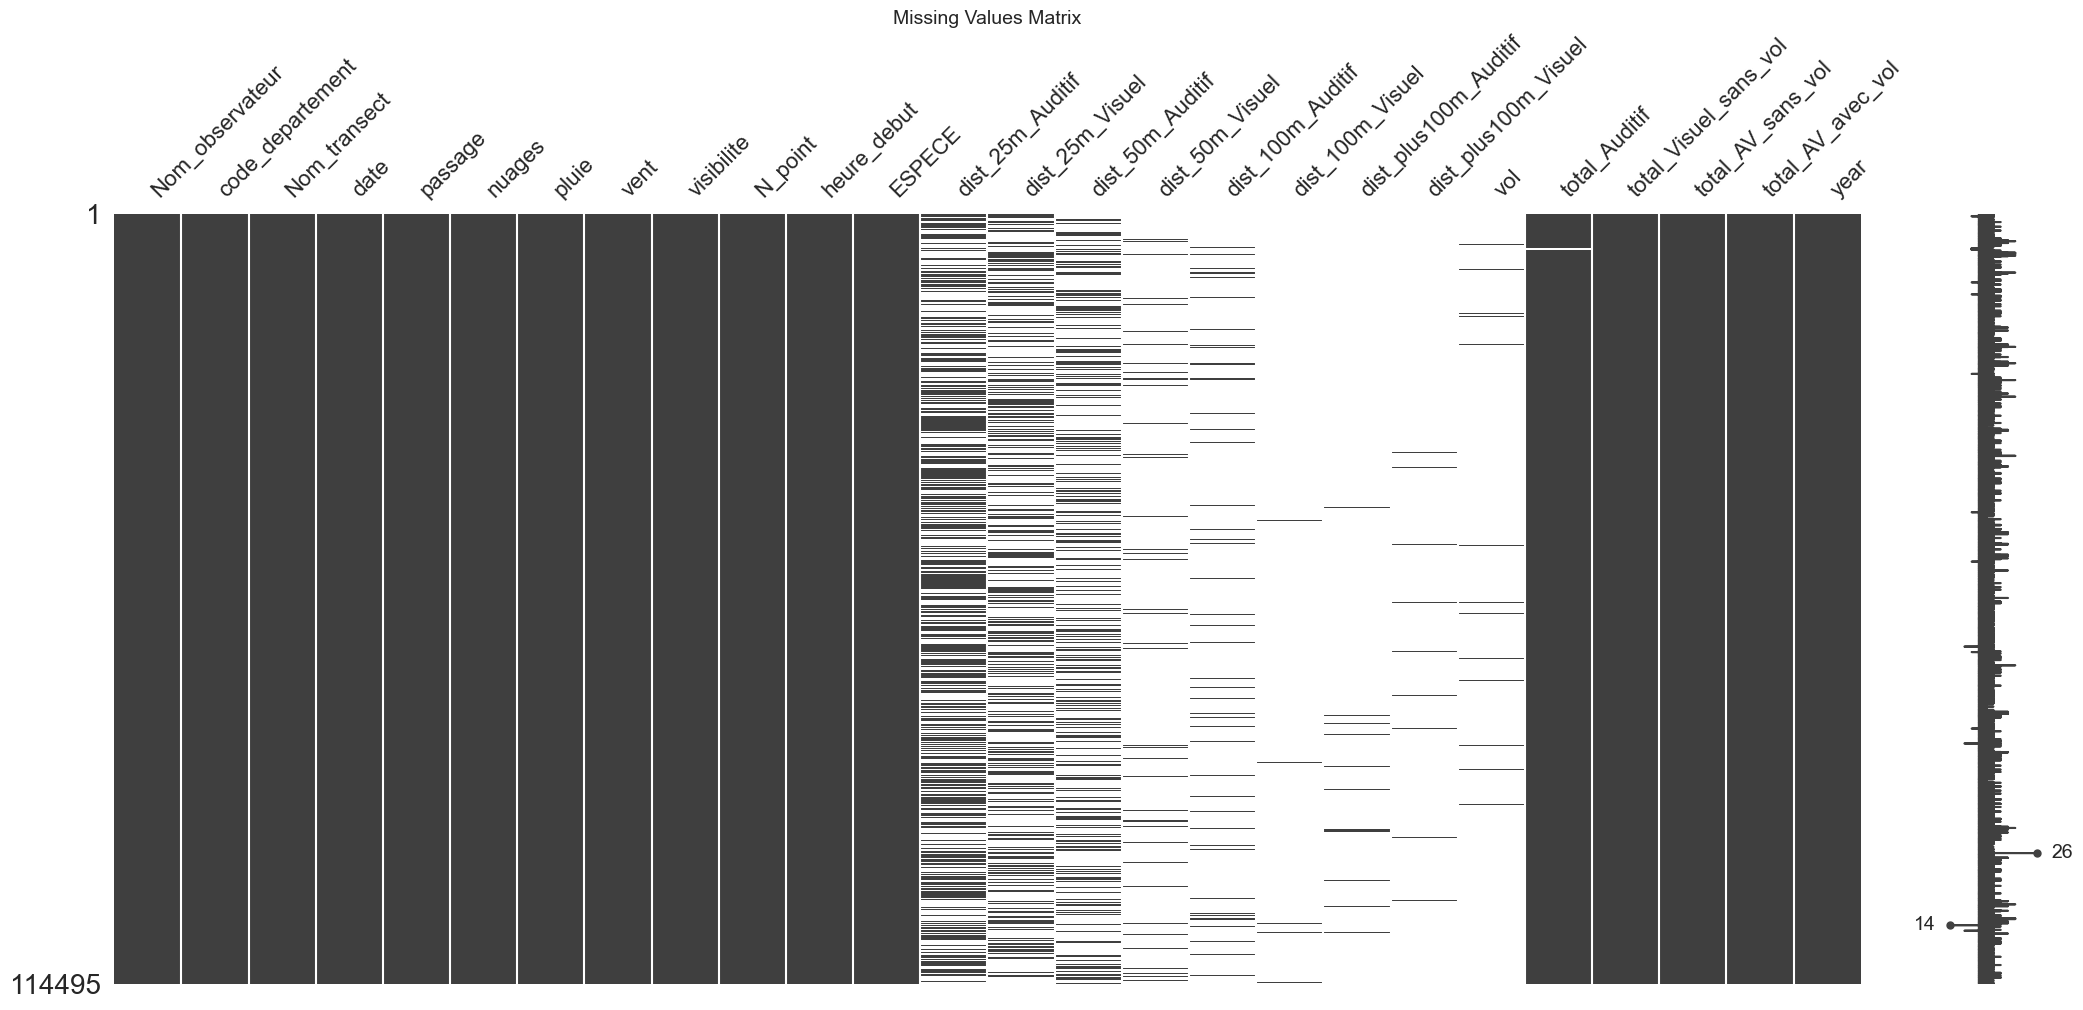

<Figure size 1200x600 with 0 Axes>

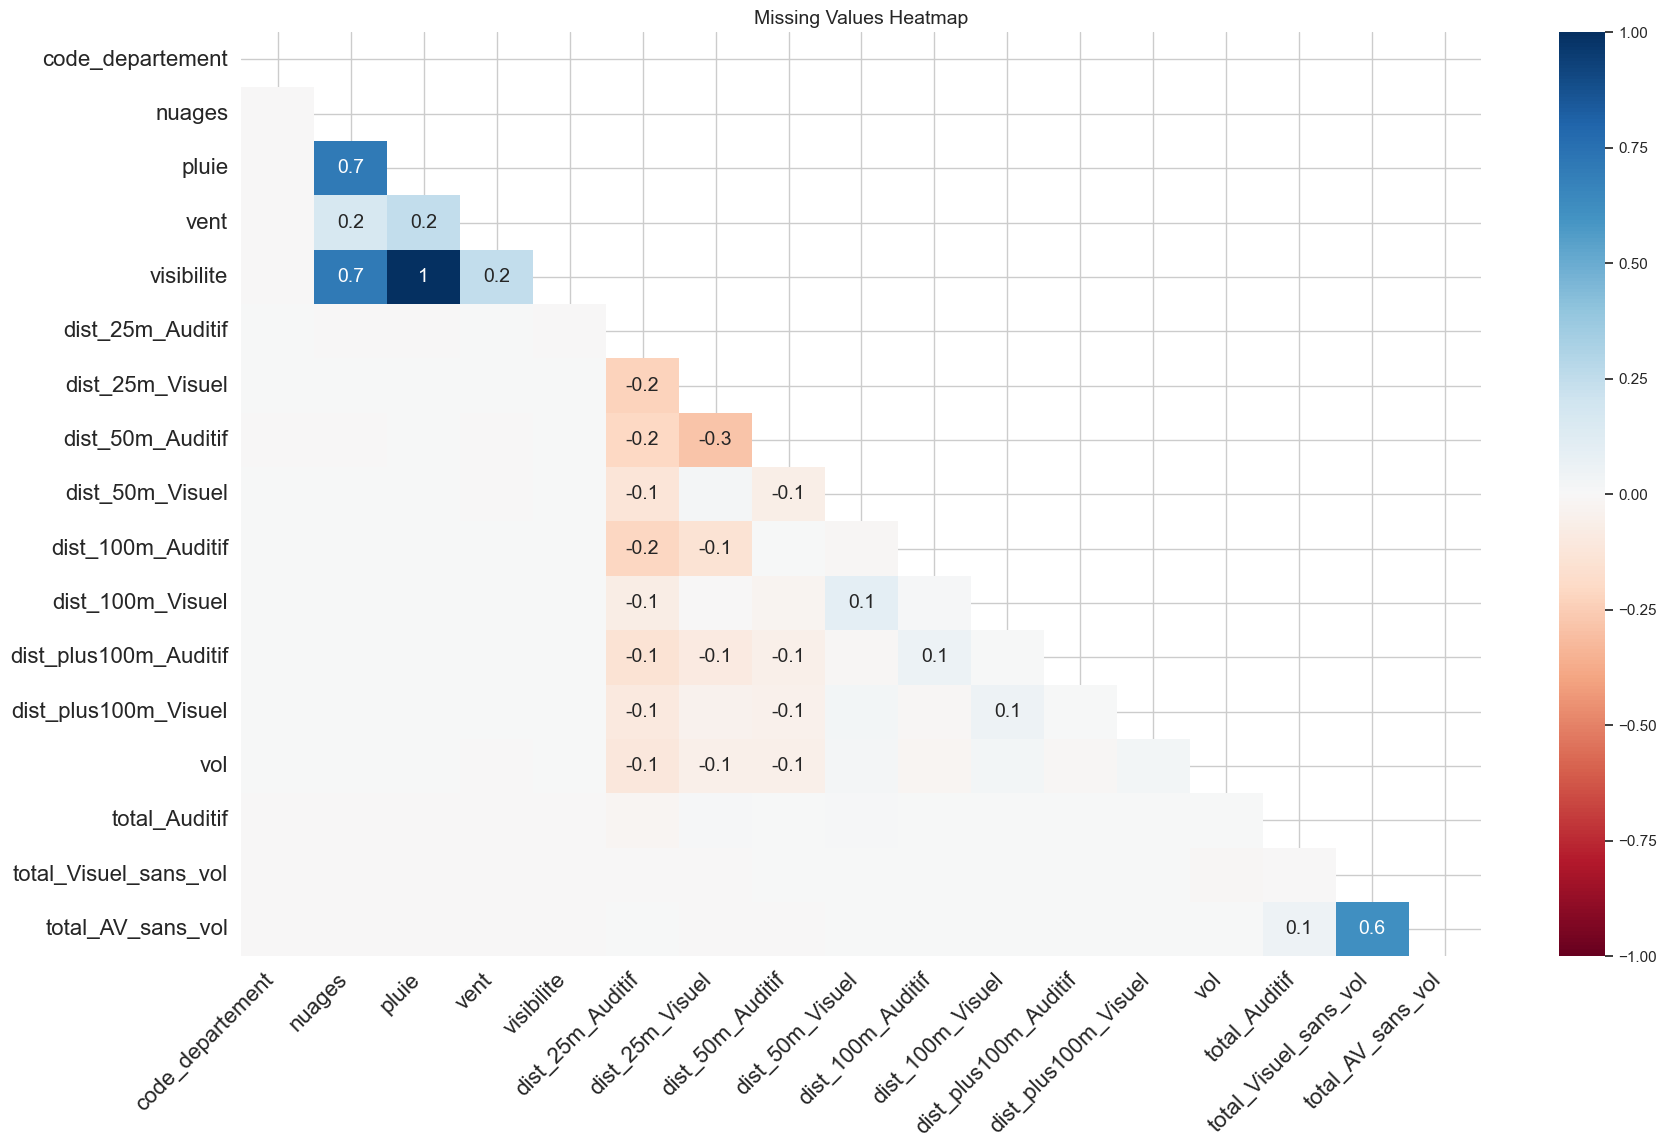

In [1094]:
# %% [markdown]
# ## Missing Values and Duplicate Records Visualization for obs_data
# ## 对 obs_data 的缺失值与重复记录可视化

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # 用于可视化缺失值

# %% [markdown]
# ### 1. Missing Values / 缺失值

# %%
# 可视化缺失值矩阵 / Visualize missing values matrix
plt.figure(figsize=(12,6))
msno.matrix(obs_data)
plt.title("Missing Values Matrix", fontsize=14)
plt.show()

# 可视化缺失值热力图 / Heatmap of missing values
plt.figure(figsize=(12,6))
msno.heatmap(obs_data)
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()


### 6.3 Data Cleaning Strategy / 数据清理策略

- Remove rows with missing key information (date, transect, department, point)
- Fill distance band counts with 0
- Recalculate total counts from distance bands
- Fill weather variables with mean values

- 删除关键信息缺失的行(日期、样线、部门、点位)
- 将距离带计数的缺失值填充为 0
- 从距离带重新计算总计数
- 用平均值填充天气变量

In [1095]:
obs_data_cleaned = obs_data.dropna(subset=['date', 'Nom_transect','code_departement', 'N_point'])
obs_data_cleaned.shape

(114493, 26)

In [1096]:
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

obs_data_cleaned = obs_data_cleaned.copy()
obs_data_cleaned.loc[:, count_cols] = obs_data_cleaned.loc[:, count_cols].apply(pd.to_numeric, errors='coerce')

In [1097]:
# %% [markdown]
# ## Fill missing values in distance-based count columns with 0

# %%
# List of distance-based count columns
distance_count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol'
]

# Fill missing values with 0
obs_data_cleaned[distance_count_cols] = obs_data_cleaned[distance_count_cols].fillna(0)

In [1098]:
# %% [markdown]
# ## Fill Missing Values in obs_data

# %%
import numpy as np

# List of count columns used to recalc totals
count_cols_for_total = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol'
]

# Fill missing total_Auditif by summing relevant columns
missing_total_auditif_idx = obs_data_cleaned['total_Auditif'].isna()
obs_data_cleaned.loc[missing_total_auditif_idx, 'total_Auditif'] = obs_data_cleaned.loc[missing_total_auditif_idx, 
                                                                     ['dist_25m_Auditif', 'dist_50m_Auditif', 
                                                                      'dist_100m_Auditif', 'dist_plus100m_Auditif', 
                                                                      'vol']].sum(axis=1)

# Fill missing total_Visuel_sans_vol
missing_total_visuel_idx = obs_data_cleaned['total_Visuel_sans_vol'].isna()
obs_data_cleaned.loc[missing_total_visuel_idx, 'total_Visuel_sans_vol'] = obs_data_cleaned.loc[missing_total_visuel_idx, 
                                                                              ['dist_25m_Visuel', 'dist_50m_Visuel', 
                                                                               'dist_100m_Visuel', 'dist_plus100m_Visuel']].sum(axis=1)

# Fill missing total_AV_sans_vol
missing_total_av_idx = obs_data_cleaned['total_AV_sans_vol'].isna()
obs_data_cleaned.loc[missing_total_av_idx, 'total_AV_sans_vol'] = (obs_data_cleaned.loc[missing_total_av_idx, 
                                                                       ['total_Auditif', 'total_Visuel_sans_vol']].sum(axis=1))

# Fill weather/environment columns with mean
for col in ['vent', 'nuages', 'visibilite', 'pluie']:
    mean_val = obs_data_cleaned[col].mean()
    obs_data_cleaned[col] = obs_data_cleaned[col].fillna(mean_val)

In [1099]:
missing_counts = obs_data_cleaned.isna().sum()
print(missing_counts)

Nom_observateur          0
code_departement         0
Nom_transect             0
date                     0
passage                  0
nuages                   0
pluie                    0
vent                     0
visibilite               0
N_point                  0
heure_debut              0
ESPECE                   0
dist_25m_Auditif         0
dist_25m_Visuel          0
dist_50m_Auditif         0
dist_50m_Visuel          0
dist_100m_Auditif        0
dist_100m_Visuel         0
dist_plus100m_Auditif    0
dist_plus100m_Visuel     0
vol                      0
total_Auditif            0
total_Visuel_sans_vol    0
total_AV_sans_vol        0
total_AV_avec_vol        0
year                     0
dtype: int64


In [1100]:
# %% [markdown]
# ## 6. Create auxiliary columns / 创建辅助列

# %%
# Extract year and month / 提取年份和月份
# 使用 .loc 显式赋值 / Use .loc to avoid SettingWithCopyWarning
obs_data_cleaned.loc[:, 'year'] = obs_data_cleaned['date'].dt.year
obs_data_cleaned.loc[:, 'month'] = obs_data_cleaned['date'].dt.month

In [1101]:
obs_data_cleaned

Nom_observateur  code_departement  Nom_transect       date  passage  \
0         BELFAN David             972.0  Fond l'Etang 2014-04-12        1   
1         BELFAN David             972.0  Fond l'Etang 2014-04-12        1   
2         BELFAN David             972.0  Fond l'Etang 2014-04-12        1   
3         BELFAN David             972.0  Fond l'Etang 2014-04-12        1   
4         BELFAN David             972.0  Fond l'Etang 2014-04-12        1   
...                ...               ...           ...        ...      ...   
114490     MAUGEE Lévy             972.0    Post-Colon 2025-05-01        1   
114491     MAUGEE Lévy             972.0    Post-Colon 2025-05-01        1   
114492     MAUGEE Lévy             972.0    Post-Colon 2025-05-01        1   
114493     MAUGEE Lévy             972.0    Post-Colon 2025-05-01        1   
114494     MAUGEE Lévy             972.0    Post-Colon 2025-05-01        1   

        nuages  pluie  vent  visibilite  N_point  ... dist_100m_Visuel  \
0          2.0    1.0   1.0         1.0        1  ...              0.0   
1          2.0    1.0   1.0         1.0        1  ...              0.0   
2          2.0    1.0   1.0         1.0        1  ...              0.0   
3          2.0    1.0   1.0         1.0        1  ...              0.0   
4          2.0    1.0   1.0         1.0        1  ...              0.0   
...        ...    ...   ...         ...      ...  ...              ...   
114490     2.0    1.0   1.0         1.0       10  ...              0.0   
114491     2.0    1.0   1.0         1.0       10  ...              0.0   
114492     2.0    1.0   1.0         1.0       10  ...              0.0   
114493     2.0    1.0   1.0         1.0       10  ...              0.0   
114494     2.0    1.0   1.0         1.0       10  ...              0.0   

       dist_plus100m_Auditif  dist_plus100m_Visuel  vol  total_Auditif  \
0                        0.0                   0.0  0.0            1.0   
1                        0.0                   0.0  0.0            0.0   
2                        0.0                   0.0  0.0            0.0   
3                        0.0                   0.0  0.0            1.0   
4                        0.0                   0.0  0.0            1.0   
...                      ...                   ...  ...            ...   
114490                   0.0                   0.0  0.0            2.0   
114491                   0.0                   0.0  0.0            1.0   
114492                   0.0                   0.0  0.0            2.0   
114493                   0.0                   0.0  0.0            3.0   
114494                   0.0                   0.0  0.0            4.0   

        total_Visuel_sans_vol  total_AV_sans_vol  total_AV_avec_vol  year  \
0                         0.0                1.0                1.0  2014   
1                         1.0                1.0                1.0  2014   
2                         2.0                2.0                2.0  2014   
3                         0.0                1.0                1.0  2014   
4                         0.0                1.0                1.0  2014   
...                       ...                ...                ...   ...   
114490                    0.0                2.0                2.0  2025   
114491                    0.0                1.0                1.0  2025   
114492                    0.0                2.0                2.0  2025   
114493                    0.0                3.0                3.0  2025   
114494                    0.0                4.0                4.0  2025   

        month  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
114490      5  
114491      5  
114492      5  
114493      5  
114494      5  

[114493 rows x 27 columns]

### 6.4 Handle Weather Outliers / 处理天气异常值

Mark extreme weather conditions and filter invalid weather values.

标记极端天气条件并过滤无效的天气值。

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2248936828.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


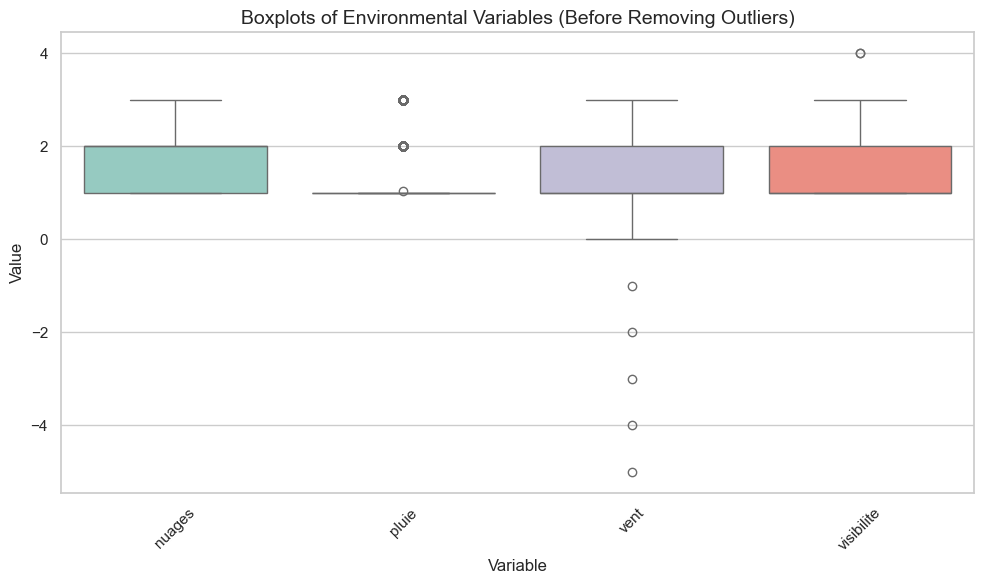

In [1102]:
# %% [markdown]
# ## Boxplots of environmental variables / 环境变量箱线图（未删除异常值）
# Visualize distributions of nuages, pluie, vent, visibilite / 可视化云量、降雨、风力、能见度分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Melt dataframe for plotting / 转成长表便于绘图
plot_data = obs_data_cleaned[env_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data,
    palette="Set3"
)
plt.title("Boxplots of Environmental Variables (Before Removing Outliers)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1103]:
obs_data['vent'].unique()

array([ 1.,  2.,  3., nan,  0., -1., -2., -3., -4., -5.])

In [1104]:
obs_data_cleaned["vent"].value_counts().sort_index()

vent
-5.000000        1
-4.000000        1
-3.000000        1
-2.000000        1
-1.000000        1
 0.000000        1
 1.000000    72680
 1.422875       17
 2.000000    35150
 3.000000     6640
Name: count, dtype: int64

In [1105]:
obs_data['nuages'].unique()

array([ 2.,  3.,  1., nan])

In [1106]:
obs_data["nuages"].value_counts().sort_index()

nuages
1.0    29822
2.0    58492
3.0    26179
Name: count, dtype: int64

In [1107]:
obs_data['pluie'].unique()

array([ 1.,  2.,  3., nan])

In [1108]:
obs_data['pluie'].value_counts().sort_index()

pluie
1.0    111307
2.0      3013
3.0       174
Name: count, dtype: int64

In [1109]:
obs_data['visibilite'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [1110]:
obs_data['visibilite'].value_counts().sort_index()

visibilite
1.0    74509
2.0    31935
3.0     8048
4.0        2
Name: count, dtype: int64

In [1111]:
# # %% [markdown]
# # ## Remove outliers in environmental columns / 删除环境列中的异常值
# # Use IQR method to filter extreme values / 使用 IQR 方法过滤极端值
# 
# # %%
# # List of environmental columns / 环境列
# env_cols = ['nuages', 'pluie', 'vent', 'visibilite']
# 
# # Copy the DataFrame to avoid modifying original / 复制一份数据
# obs_data_no_outliers = obs_data_cleaned.copy()
# 
# for col in env_cols:
#     # Convert to numeric in case of strings / 转为数值型
#     obs_data_no_outliers[col] = pd.to_numeric(obs_data_no_outliers[col], errors='coerce')
#     
#     # Calculate Q1, Q3 and IQR / 计算四分位数和 IQR
#     Q1 = obs_data_no_outliers[col].quantile(0.25)
#     Q3 = obs_data_no_outliers[col].quantile(0.75)
#     IQR = Q3 - Q1
#     
#     # Define bounds / 定义上下界
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     
#     # Filter out outliers / 删除异常值
#     obs_data_no_outliers = obs_data_no_outliers[
#         (obs_data_no_outliers[col] >= lower_bound) & (obs_data_no_outliers[col] <= upper_bound)
#     ]
# 
# # %% [markdown]
# # ## Check results / 检查处理后的数据
# print("Shape after removing environmental outliers / 删除异常值后数据维度:", obs_data_no_outliers.shape)
# print("Remaining environmental data ranges / 剩余环境列范围:")
# print(obs_data_no_outliers[env_cols].describe())

In [1112]:
obs_data_cleaned = obs_data_cleaned[obs_data_cleaned["vent"] > 0].copy()
obs_data_cleaned = obs_data_cleaned[obs_data_cleaned["vent"] % 1 == 0].copy()

In [1113]:
obs_data_cleaned["is_extreme_weather"] = (
    (obs_data_cleaned["vent"] == 3) |
    (obs_data_cleaned["pluie"].isin([2,3])) |
    (obs_data_cleaned["visibilite"].isin([4]))
)

extreme_count = obs_data_cleaned["is_extreme_weather"].sum()
print(f"Number of extreme weather records: {extreme_count}")

obs_data_cleaned[["vent","nuages", "pluie", "visibilite", "is_extreme_weather"]].head(10)

Number of extreme weather records: 9490


vent  nuages  pluie  visibilite  is_extreme_weather
0   1.0     2.0    1.0         1.0               False
1   1.0     2.0    1.0         1.0               False
2   1.0     2.0    1.0         1.0               False
3   1.0     2.0    1.0         1.0               False
4   1.0     2.0    1.0         1.0               False
5   1.0     2.0    1.0         1.0               False
6   1.0     2.0    1.0         1.0               False
7   1.0     2.0    1.0         1.0               False
8   1.0     2.0    1.0         1.0               False
9   1.0     2.0    1.0         1.0               False

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/441264105.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


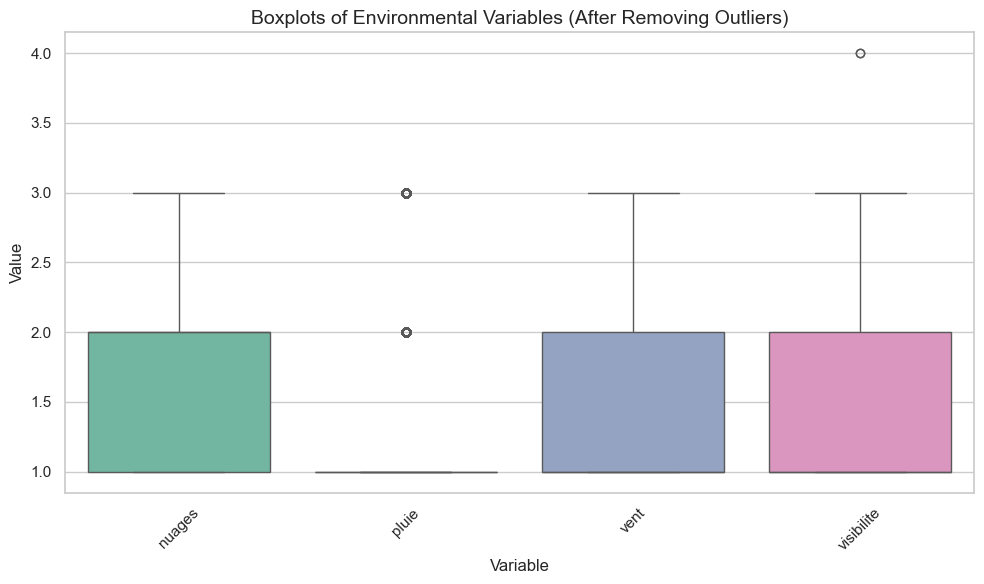

In [1114]:
# %% [markdown]
# ## Boxplots of environmental variables after removing outliers / 删除异常值后的环境变量箱线图
# Visualize distributions after outlier removal / 删除异常值后可视化环境列分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Melt dataframe for plotting / 转成长表便于绘图
plot_data_after = obs_data_cleaned[env_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data_after,
    palette="Set2"
)
plt.title("Boxplots of Environmental Variables (After Removing Outliers)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/256666084.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather_type", y="total_AV_avec_vol", data=weather_counts, palette=["skyblue", "lightgreen"])


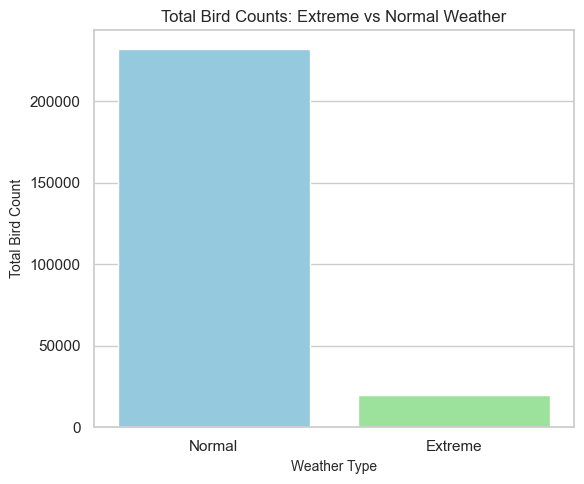

In [1115]:
# %% [markdown]
# ## Compare Bird Counts in Extreme vs Normal Weather
# ## 极端天气与正常天气的鸟类数量比较

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# 分组统计总鸟类数量 / Group by extreme weather
weather_counts = obs_data_cleaned.groupby("is_extreme_weather")["total_AV_avec_vol"].sum().reset_index()
weather_counts["weather_type"] = weather_counts["is_extreme_weather"].map({True: "Extreme", False: "Normal"})

# 绘制柱状图 / Bar plot
plt.figure(figsize=(6,5))
sns.barplot(x="weather_type", y="total_AV_avec_vol", data=weather_counts, palette=["skyblue", "lightgreen"])
plt.title("Total Bird Counts: Extreme vs Normal Weather", fontsize=12)
plt.xlabel("Weather Type", fontsize=10)
plt.ylabel("Total Bird Count", fontsize=10)
plt.tight_layout()
plt.show()

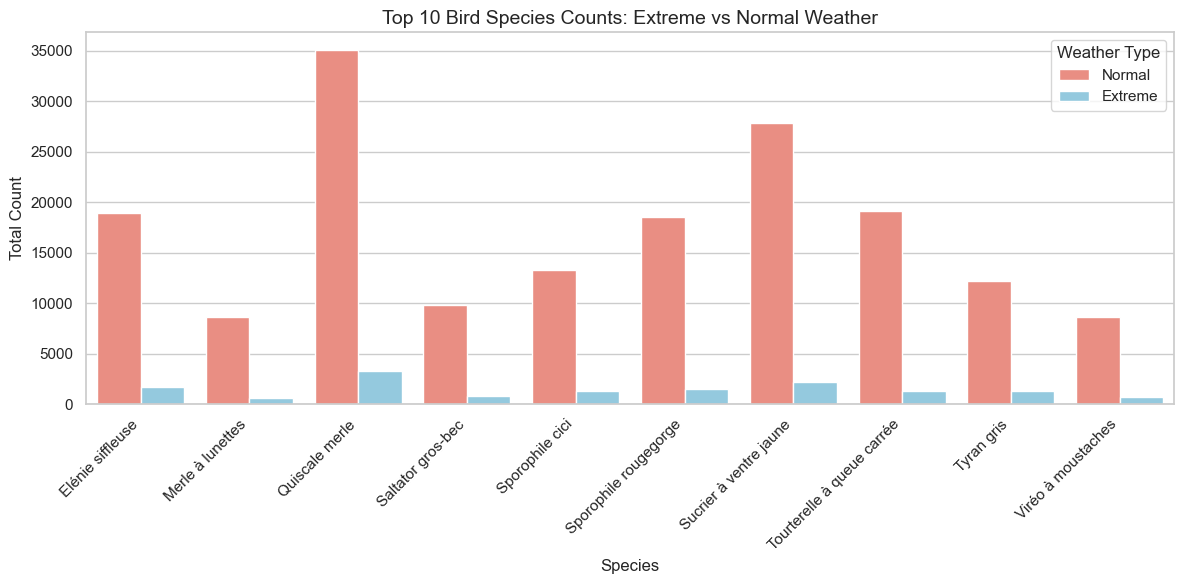

In [1116]:
# %% [markdown]
# ## Compare Top 10 Bird Species in Extreme vs Normal Weather
# ## 比较极端天气与正常天气下前10种鸟类的数量

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 统计每种鸟类总数量 / Total counts per species
species_totals = obs_data_cleaned.groupby("ESPECE")["total_AV_avec_vol"].sum().sort_values(ascending=False)

# 取前10种鸟类 / Top 10 species
top10_species = species_totals.head(10).index.tolist()

# 筛选前10种鸟的数据 / Filter top 10 species data
top10_data = obs_data_cleaned[obs_data_cleaned["ESPECE"].isin(top10_species)].copy()

# 按物种和极端天气分组，计算总计 / Aggregate total counts by species and weather
top10_weather_counts = top10_data.groupby(["ESPECE", "is_extreme_weather"])["total_AV_avec_vol"].sum().reset_index()
top10_weather_counts["weather_type"] = top10_weather_counts["is_extreme_weather"].map({True: "Extreme", False: "Normal"})

# 绘制分组柱状图 / Grouped bar plot
plt.figure(figsize=(12,6))
sns.barplot(x="ESPECE", y="total_AV_avec_vol", hue="weather_type", data=top10_weather_counts, palette=["salmon", "skyblue"])
plt.title("Top 10 Bird Species Counts: Extreme vs Normal Weather", fontsize=14)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Weather Type")
plt.tight_layout()
plt.show()

### 6.5 Count Outliers / 计数异常值

Visualize distribution of count variables to identify outliers.

可视化计数变量的分布以识别异常值。

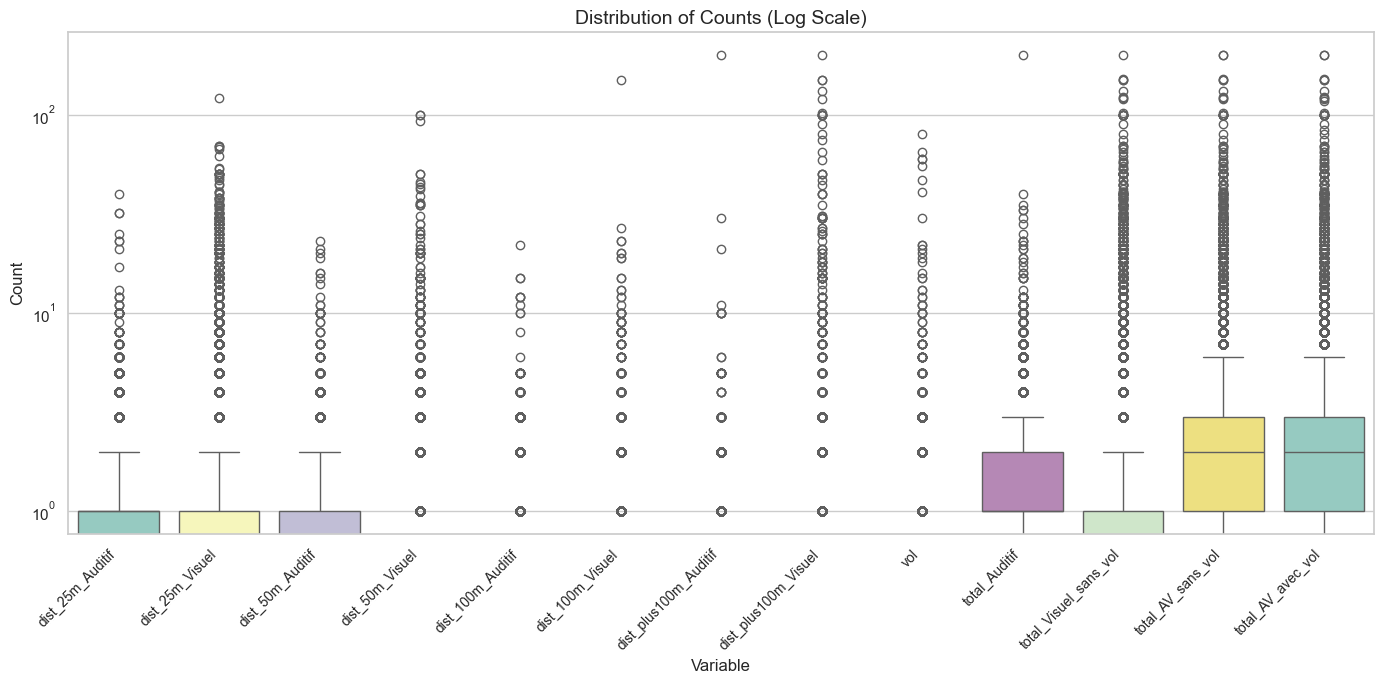

In [1117]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data_cleaned[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

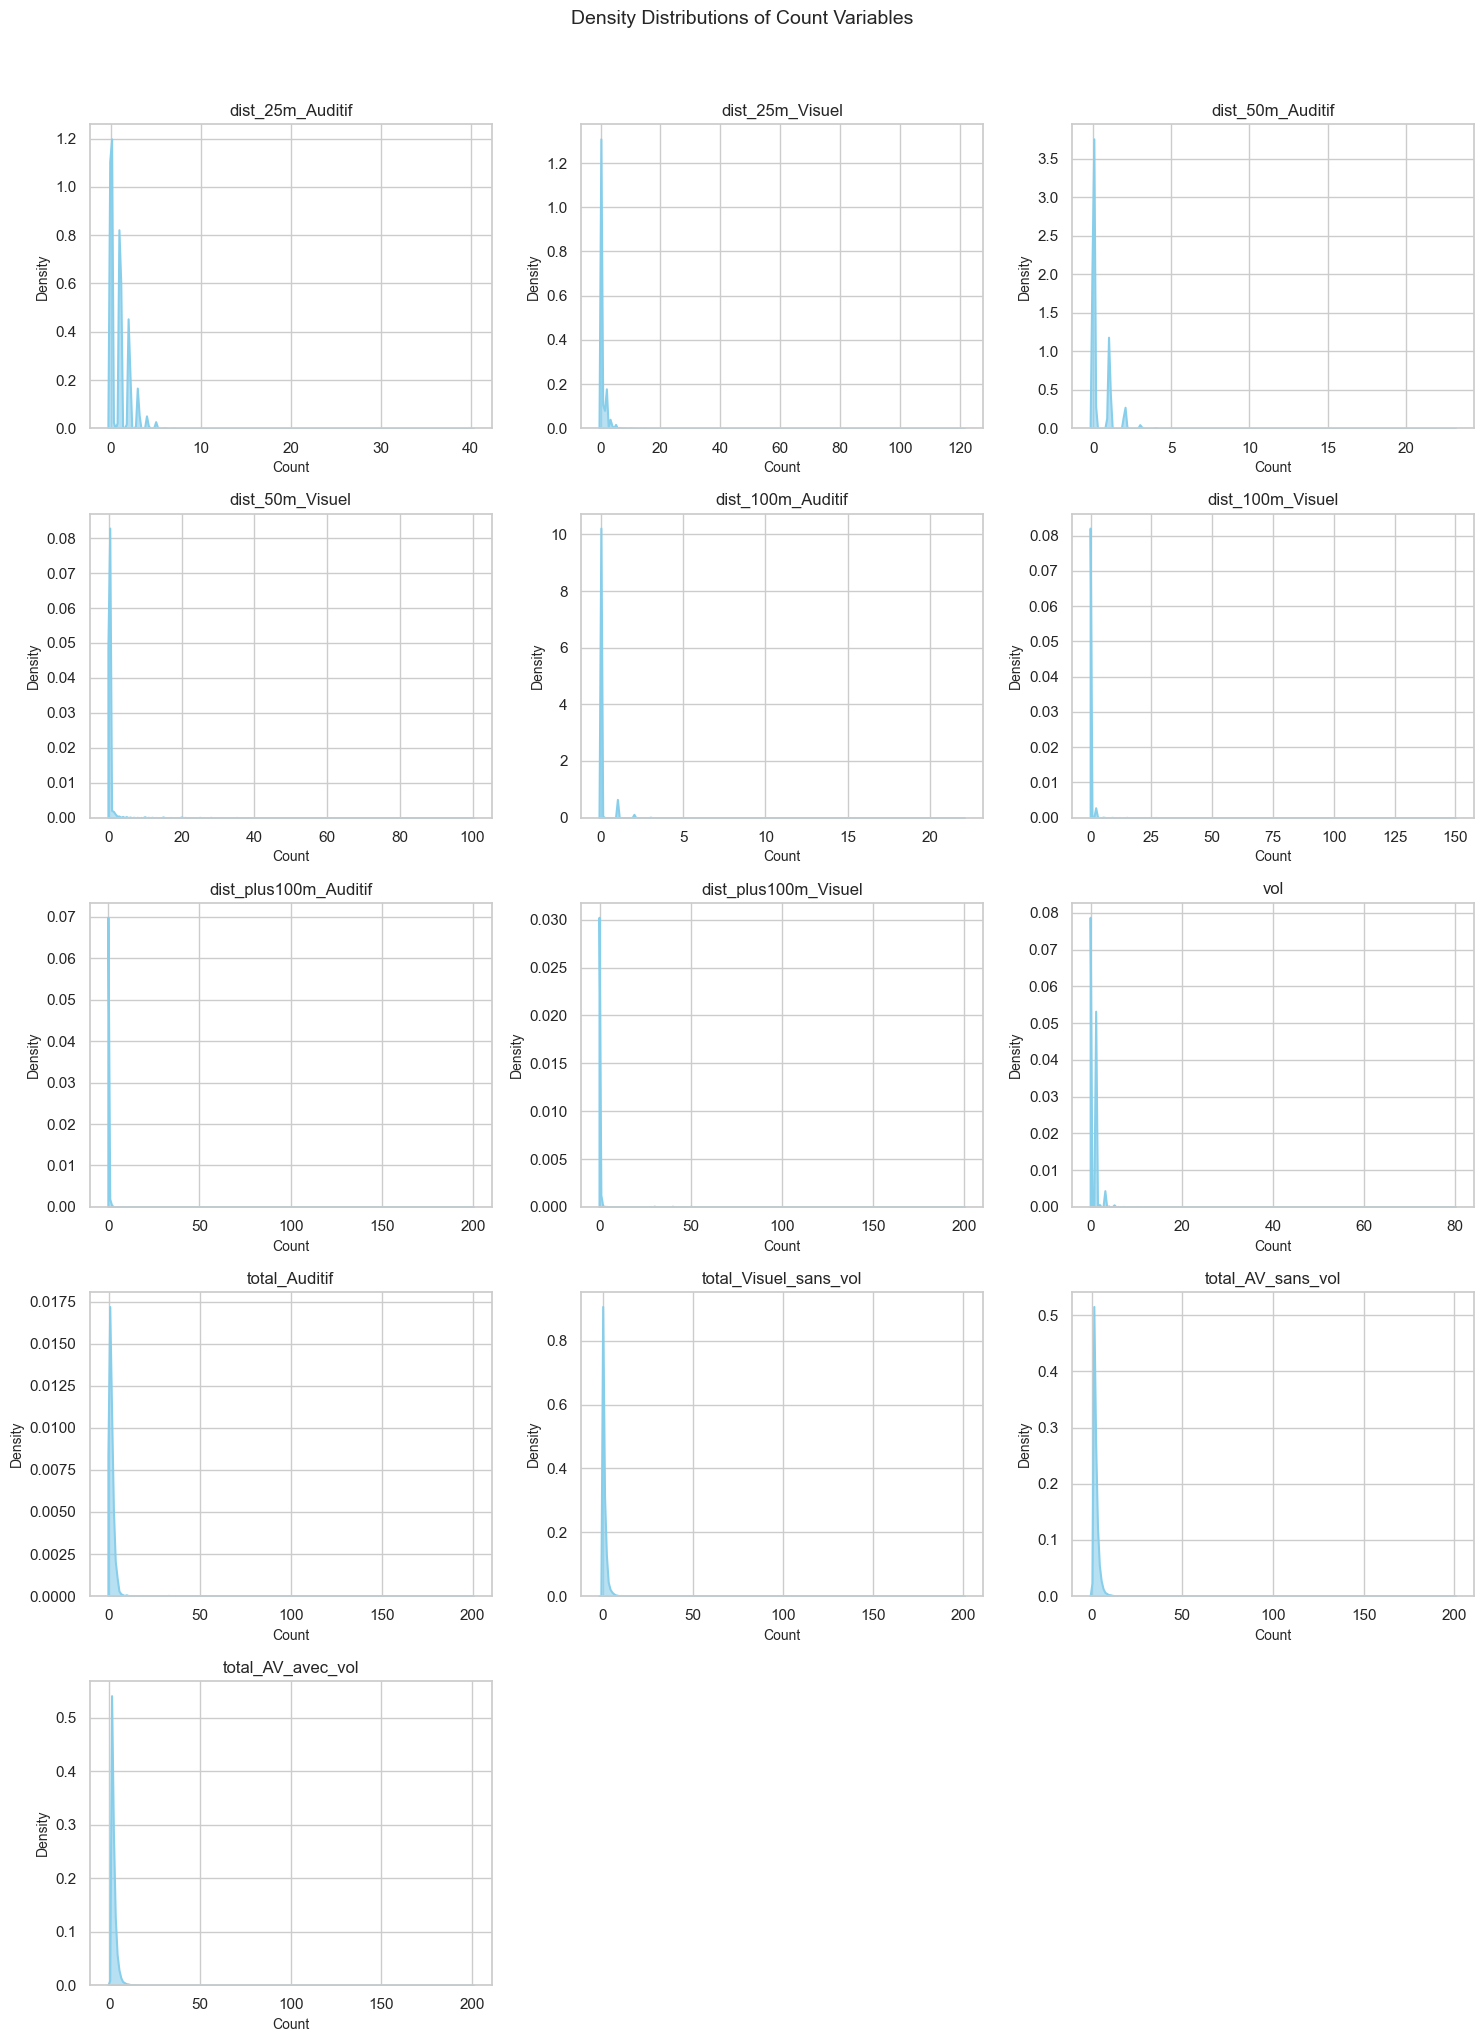

In [1118]:
# %% [markdown]
# ## 各计数指标的密度图（多图布局）  
# ## Density plots for all count variables (grid layout)

# %%
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置绘图风格 / Set Seaborn style
sns.set(style="whitegrid")

# 计算网格行列数 / Compute number of rows and columns
n_cols = 3
n_rows = int(np.ceil(len(count_cols) / n_cols))

# 创建子图布局 / Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # 展平索引方便遍历 / Flatten axes for easy indexing

# 遍历所有计数列并绘图 / Loop through count columns and plot KDE
for i, col in enumerate(count_cols):
    sns.kdeplot(
        data=obs_data_cleaned,
        x=col,
        fill=True,
        color='skyblue',
        alpha=0.6,
        linewidth=1.5,
        ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Count", fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)

# 隐藏空子图（如果列数不是3的倍数）/ Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 全局标题与布局优化 / Adjust layout
plt.suptitle("Density Distributions of Count Variables", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [1119]:
# # %% [markdown]
# # ## Winsorize bird count columns / 对鸟类计数列进行上下 1% 分位数裁剪
# # 将低于 1% 的值设为 1% 分位数，将高于 99% 的值设为 99% 分位数
# 
# # %%
# import numpy as np
# 
# # List of bird count columns / 鸟类计数列
# count_cols = [
#     'dist_25m_Auditif', 'dist_25m_Visuel',
#     'dist_50m_Auditif', 'dist_50m_Visuel',
#     'dist_100m_Auditif', 'dist_100m_Visuel',
#     'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
#     'vol', 'total_Auditif', 'total_Visuel_sans_vol',
#     'total_AV_sans_vol', 'total_AV_avec_vol'
# ]
# 
# # Copy DataFrame / 复制数据
# # obs_data_winsor = obs_data_cleaned.copy()
# obs_data_winsor = obs_data_cleaned.copy()
# 
# # Apply winsorization / 上下分位数裁剪
# for col in count_cols:
#     lower = obs_data_winsor[col].quantile(0.01)  # 1% 分位数
#     upper = obs_data_winsor[col].quantile(0.99)  # 99% 分位数
#     obs_data_winsor[col] = obs_data_winsor[col].clip(lower, upper)  # 裁剪
# 
# # %% [markdown]
# # ## Boxplots after winsorization / 上下1%分位数裁剪后的箱线图
# # Visualize bird count distributions / 可视化鸟类计数分布
# 
# # %%
# import seaborn as sns
# import matplotlib.pyplot as plt
# 
# # Melt dataframe for plotting / 转成长表
# plot_data = obs_data_winsor[count_cols].melt(var_name='Variable', value_name='Value')
# 
# # Plot boxplots / 绘制箱线图
# plt.figure(figsize=(14, 6))
# sns.boxplot(
#     x='Variable',
#     y='Value',
#     data=plot_data,
#     palette="Set3"
# )
# plt.title("Bird Count Distributions After Winsorization (1%-99%)", fontsize=14)
# plt.ylabel("Count", fontsize=12)
# plt.xlabel("Variable", fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

删除异常值后剩余数据量: 108844 条记录


/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2356855004.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


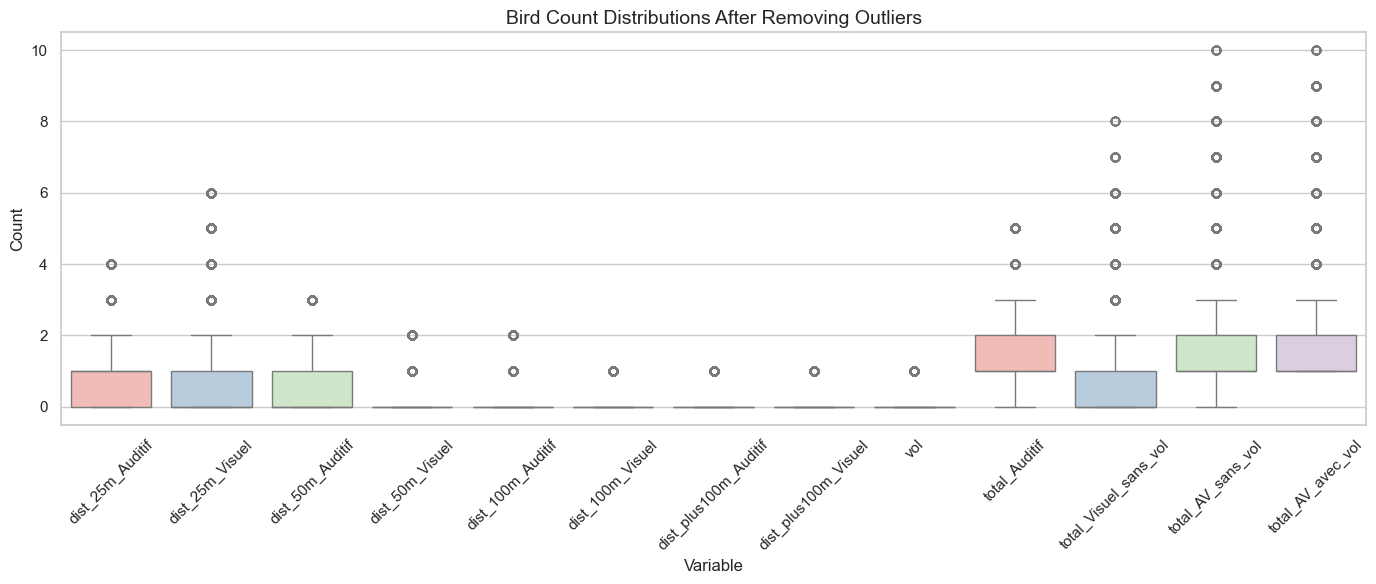

In [1120]:
# %% [markdown]
# ## Remove extreme outliers / 删除极端异常值
# 删除所有鸟类计数中任意列低于1%或高于99%分位数的行

# %%
# 复制数据
obs_data_no_outliers = obs_data_cleaned.copy()

# 计算各列的分位数阈值
thresholds = {}
for col in count_cols:
    lower = obs_data_no_outliers[col].quantile(0.01)
    upper = obs_data_no_outliers[col].quantile(0.99)
    thresholds[col] = (lower, upper)

# 逐列筛选，删除超出范围的记录
for col, (lower, upper) in thresholds.items():
    obs_data_no_outliers = obs_data_no_outliers[
        (obs_data_no_outliers[col] >= lower) &
        (obs_data_no_outliers[col] <= upper)
    ]

# 打印删除后的结果
print(f"删除异常值后剩余数据量: {len(obs_data_no_outliers)} 条记录")

# %% [markdown]
# ## Boxplots after removing outliers / 删除异常值后的箱线图

# %%
# 将删除异常值后的数据转成长表
plot_data_no_outliers = obs_data_no_outliers[count_cols].melt(
    var_name='Variable',
    value_name='Value'
)

# 绘制箱线图
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data_no_outliers,
    palette="Pastel1"
)
plt.title("Bird Count Distributions After Removing Outliers", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.6 Density Plots for Count Variables / 计数变量的密度图

Due to high frequency of zero values, density plots provide better visualization than boxplots.

由于零值频率高,密度图比箱线图提供更好的可视化效果。

In [1121]:
obs_data_cleaned = obs_data_no_outliers.copy()

In [1122]:
# # 一张一张图
# # %%
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # 设置 Seaborn 风格 / Set Seaborn style
# sns.set(style="whitegrid")
# 
# # 遍历每一个计数列 / Loop through each count variable
# for col in count_cols:
#     plt.figure(figsize=(8, 5))
#     
#     # 绘制密度图 / Draw KDE plot for current variable
#     sns.kdeplot(
#         data=obs_data_no_outliers,
#         x=col,
#         fill=True,
#         color='skyblue',
#         alpha=0.5,
#         linewidth=1.5
#     )
#     
#     # 添加标题和标签 / Add titles and labels
#     plt.title(f"Density Distribution of {col}", fontsize=13)
#     plt.xlabel("Count", fontsize=12)
#     plt.ylabel("Density", fontsize=12)
#     plt.grid(alpha=0.3)
#     plt.tight_layout()
#     plt.show()

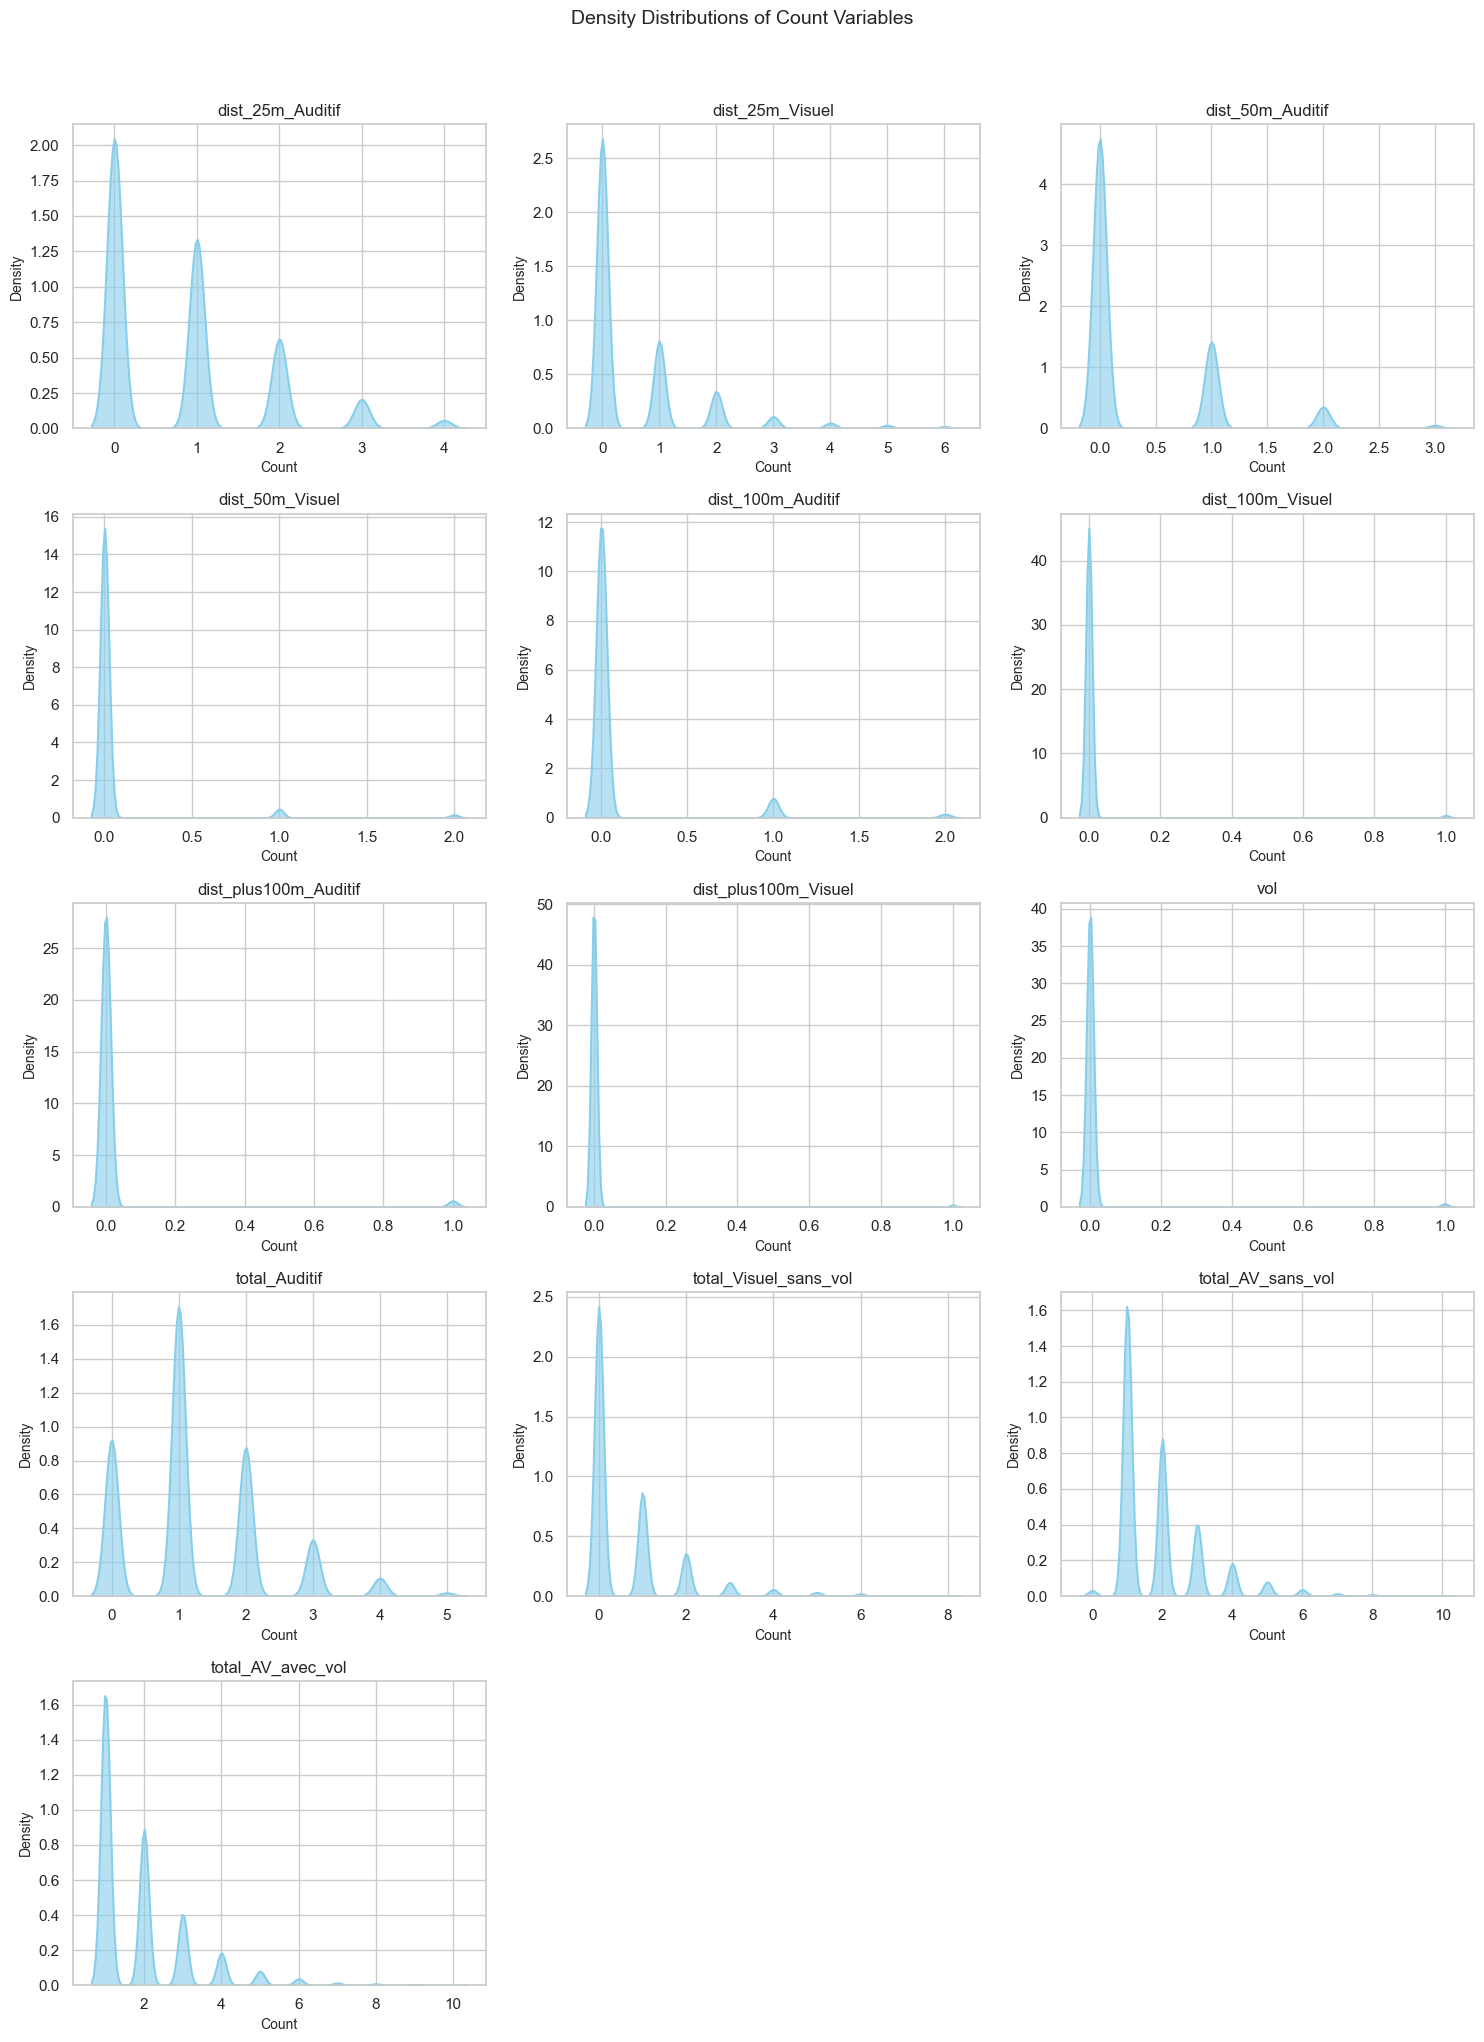

In [1123]:
# %% [markdown]
# ## 各计数指标的密度图（多图布局）  
# ## Density plots for all count variables (grid layout)

# %%
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置绘图风格 / Set Seaborn style
sns.set(style="whitegrid")

# 计算网格行列数 / Compute number of rows and columns
n_cols = 3
n_rows = int(np.ceil(len(count_cols) / n_cols))

# 创建子图布局 / Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # 展平索引方便遍历 / Flatten axes for easy indexing

# 遍历所有计数列并绘图 / Loop through count columns and plot KDE
for i, col in enumerate(count_cols):
    sns.kdeplot(
        data=obs_data_cleaned,
        x=col,
        fill=True,
        color='skyblue',
        alpha=0.6,
        linewidth=1.5,
        ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Count", fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)

# 隐藏空子图（如果列数不是3的倍数）/ Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 全局标题与布局优化 / Adjust layout
plt.suptitle("Density Distributions of Count Variables", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 7. Biodiversity Indicators / 生物多样性指标

### Rationale for Selected Indicators / 指标选择理由

**1. Observation Effort / 观测努力量**
- Reflects survey intensity each year
- Affects reliability of count results
- Essential for standardizing diversity estimates

**2. Species Richness / 物种丰富度**
- Common diversity metric in ecology
- Reflects ecosystem health and changes over time
- Direct measure of biodiversity

**3. Average Abundance / 平均丰度**
- Shows population dynamics beyond species count
- Can be standardized by observation effort
- Indicates actual bird population trends

rich   shan   simp   even      D1      D2  low_rich  high_rich  \
year                                                                     
2014  56.930  3.101  0.060  0.768  22.238  16.561    51.000       62.0   
2015  63.138  3.174  0.056  0.766  23.919  17.843    57.975       68.0   
2016  69.688  3.209  0.054  0.756  24.761  18.385    62.975       75.0   
2017  63.619  3.170  0.056  0.764  23.821  17.819    57.000       68.0   
2018  66.294  3.153  0.058  0.752  23.403  17.324    61.000       71.0   
2019  63.553  3.146  0.058  0.758  23.247  17.370    58.975       68.0   
2020  63.868  3.145  0.057  0.757  23.217  17.446    59.000       67.0   
2021  63.282  3.163  0.056  0.763  23.654  17.728    58.000       68.0   
2022  62.445  3.157  0.057  0.764  23.506  17.686    57.000       66.0   
2023  60.818  3.167  0.056  0.771  23.751  17.754    56.000       65.0   
2024  64.189  3.167  0.058  0.761  23.745  17.397    59.000       69.0   
2025  65.380  3.150  0.058  0.754  23.344  17.235    59.000       70.0   

      low_shan  high_shan  low_even  high_even  low_D1  high_D1  low_D2  \
year                                                                      
2014     3.032      3.161     0.749      0.788  20.748   23.591  15.664   
2015     3.121      3.224     0.751      0.783  22.658   25.128  16.996   
2016     3.152      3.264     0.741      0.775  23.382   26.149  17.532   
2017     3.121      3.222     0.751      0.779  22.662   25.088  17.104   
2018     3.103      3.201     0.738      0.767  22.262   24.552  16.684   
2019     3.090      3.200     0.744      0.773  21.987   24.541  16.629   
2020     3.094      3.197     0.745      0.771  22.057   24.458  16.821   
2021     3.118      3.214     0.749      0.778  22.599   24.879  17.095   
2022     3.100      3.212     0.749      0.781  22.203   24.836  16.885   
2023     3.117      3.220     0.756      0.789  22.570   25.017  17.017   
2024     3.115      3.218     0.746      0.779  22.542   24.978  16.605   
2025     3.097      3.202     0.738      0.770  22.125   24.578  16.420   

      high_D2    cov  low_cov  high_cov  
year                                     
2014   17.486  0.554    0.441     0.662  
2015   18.705  0.716    0.605     0.806  
2016   19.235  0.797    0.692     0.873  
2017   18.568  0.811    0.707     0.884  
2018   18.022  0.878    0.785     0.935  
2019   18.183  0.865    0.769     0.925  
2020   18.173  0.851    0.753     0.915  
2021   18.455  0.851    0.753     0.915  
2022   18.584  0.851    0.753     0.915  
2023   18.561  0.865    0.769     0.925  
2024   18.222  0.878    0.785     0.935  
2025   18.087  0.878    0.785     0.935

Richness: slope=0.0900/year, p=0.7415
Shannon: slope=0.0005/year, p=0.8238
Evenness: slope=-0.0002/year, p=0.6957
Hill_q1: slope=0.0094/year, p=0.8585
Hill_q2: slope=-0.0014/year, p=0.9712
Coverage: slope=0.0196/year, p=0.0055


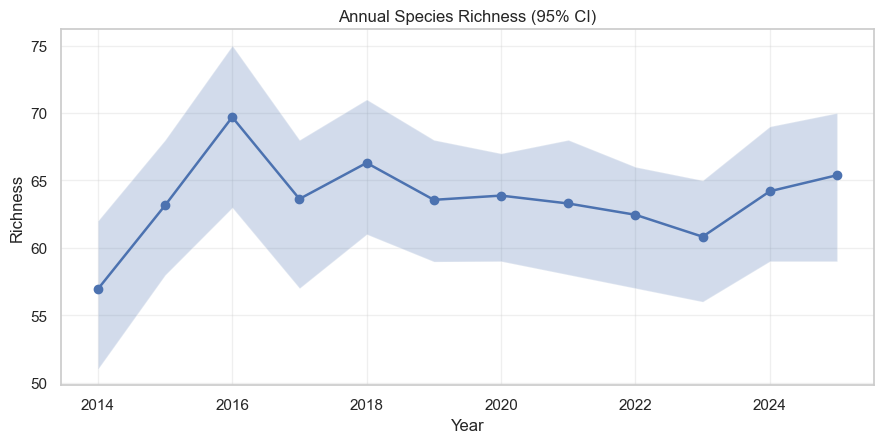

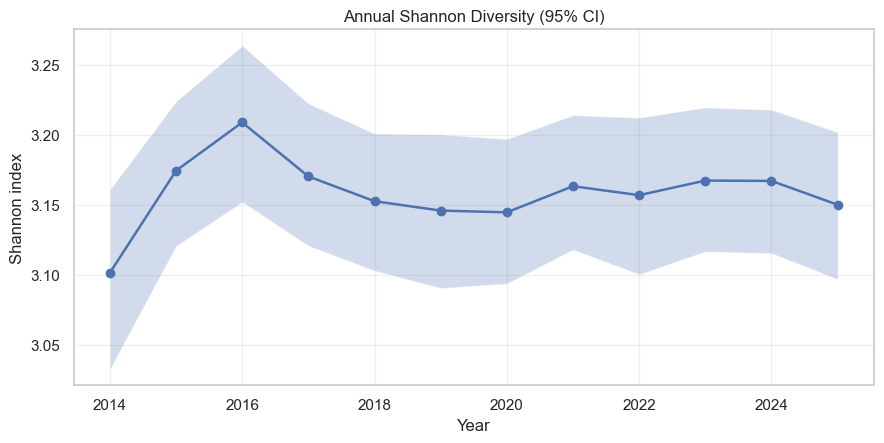

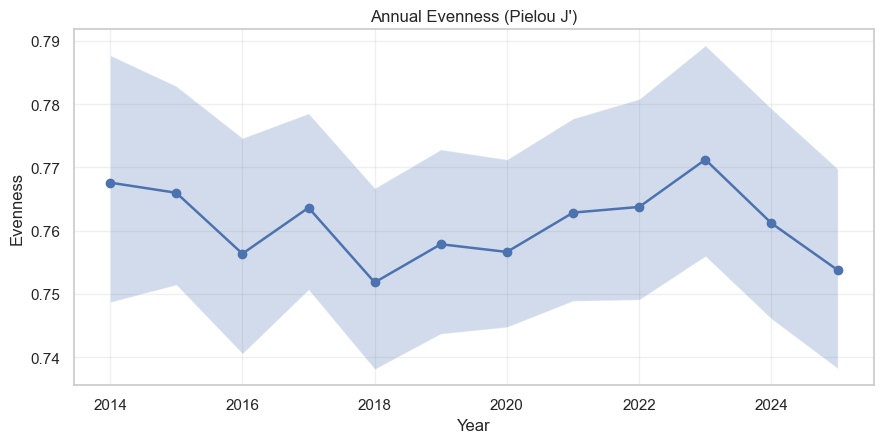

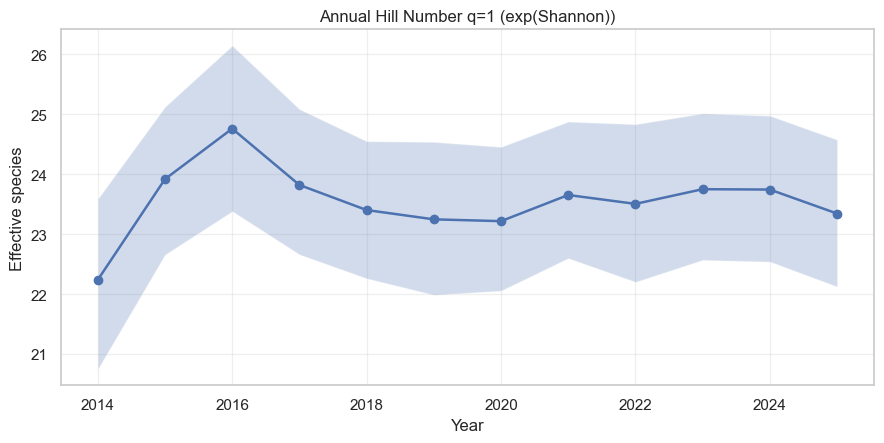

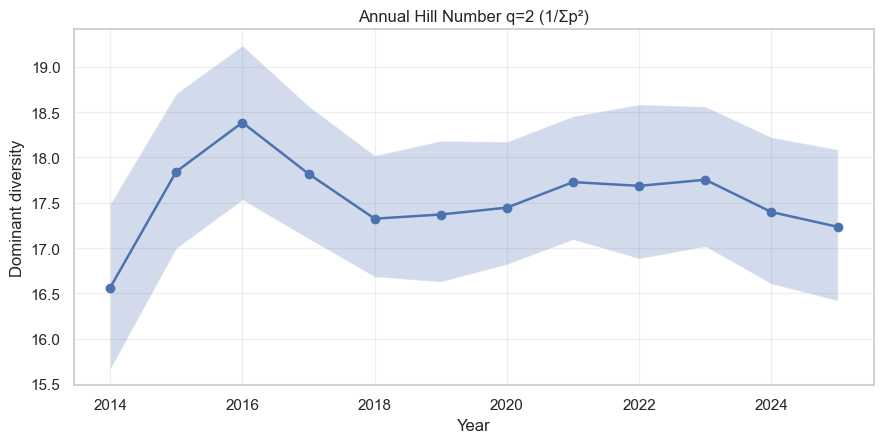

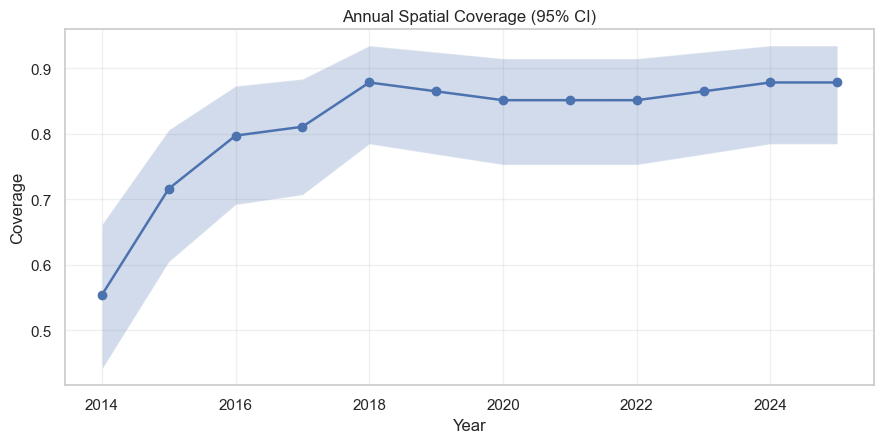

In [1124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm

COLS = {"date": "date", "species": "ESPECE", "transect": "Nom_transect"}

def shannon_from_counts(v):
    v = np.asarray(v, dtype=float)
    tot = v.sum()
    if tot <= 0:
        return np.nan
    p = v[v > 0] / tot
    return -np.sum(p * np.log(p))

def simpson_from_counts(v):
    v = np.asarray(v, dtype=float)
    tot = v.sum()
    if tot <= 0:
        return np.nan
    p = v[v > 0] / tot
    return np.sum(p ** 2)

def build_cluster_species_counts(df_year_group, cluster_col, species_col):
    if df_year_group.empty:
        return pd.DataFrame(dtype=int), [], []
    g = (
        df_year_group
        .dropna(subset=[cluster_col, species_col])
        .groupby([cluster_col, species_col], observed=True)
        .size()
        .unstack(fill_value=0)
    )
    return g.astype(int), g.index.to_list(), g.columns.to_list()

def fast_bootstrap_diversity_extended(counts_df, B=1000, random_state=42):
    rng = np.random.default_rng(random_state)
    T = counts_df.shape[0]
    if T == 0:
        return {k: np.nan for k in ["rich","shan","simp","even","D1","D2",
                                    "low_rich","high_rich","low_shan","high_shan",
                                    "low_even","high_even","low_D1","high_D1","low_D2","high_D2"]}
    idx = np.arange(T)
    boots = {"rich": [], "shan": [], "simp": [], "even": [], "D1": [], "D2": []}

    def metrics_from_counts(v):
        S = (v > 0).sum()
        H = shannon_from_counts(v)
        P2 = simpson_from_counts(v)
        D1 = np.exp(H) if np.isfinite(H) else np.nan
        D2 = 1.0 / P2 if P2 > 0 else np.nan
        even = H / np.log(S) if S > 1 else np.nan
        return S, H, P2, D1, D2, even

    v_point = counts_df.sum(axis=0).to_numpy(copy=False)
    S, H, P2, D1, D2, even = metrics_from_counts(v_point)

    for b in range(B):
        sampled = rng.choice(idx, size=T, replace=True)
        v = counts_df.iloc[sampled].sum(axis=0).to_numpy(copy=False)
        S, H, P2, D1, D2, even = metrics_from_counts(v)
        boots["rich"].append(S)
        boots["shan"].append(H)
        boots["simp"].append(P2)
        boots["D1"].append(D1)
        boots["D2"].append(D2)
        boots["even"].append(even)

    def ci(arr): return np.nanpercentile(arr, [2.5, 97.5]) if len(arr) else (np.nan, np.nan)

    result = {
        "rich": np.mean(boots["rich"]),
        "shan": np.mean(boots["shan"]),
        "simp": np.mean(boots["simp"]),
        "even": np.mean(boots["even"]),
        "D1": np.mean(boots["D1"]),
        "D2": np.mean(boots["D2"]),
        "low_rich": ci(boots["rich"])[0], "high_rich": ci(boots["rich"])[1],
        "low_shan": ci(boots["shan"])[0], "high_shan": ci(boots["shan"])[1],
        "low_even": ci(boots["even"])[0], "high_even": ci(boots["even"])[1],
        "low_D1": ci(boots["D1"])[0], "high_D1": ci(boots["D1"])[1],
        "low_D2": ci(boots["D2"])[0], "high_D2": ci(boots["D2"])[1],
    }
    return result

def wilson_ci(k, n, alpha=0.05):
    if n == 0:
        return (np.nan, np.nan)
    z = norm.ppf(1 - alpha/2)
    phat = k / n
    denom = 1 + z**2 / n
    center = (phat + z**2/(2*n)) / denom
    half = (z * np.sqrt(phat*(1-phat)/n + z**2/(4*n**2))) / denom
    return (max(0.0, center - half), min(1.0, center + half))

def linear_trend(y_series):
    y = y_series.dropna()
    if y.empty:
        return {"slope": np.nan, "pvalue": np.nan}
    X = sm.add_constant(y.index.values.astype(float))
    model = sm.OLS(y.values.astype(float), X).fit()
    return {"slope": float(model.params[1]), "pvalue": float(model.pvalues[1])}

YR_MIN, YR_MAX = 2014, 2025
df_raw = obs_data.copy()
df_raw["__date_parsed"] = pd.to_datetime(df_raw[COLS["date"]], errors="coerce")
df_raw["year"] = df_raw["__date_parsed"].dt.year
df_year = df_raw[df_raw["year"].between(YR_MIN, YR_MAX)].copy()

transect_universe = (
    df_year[COLS["transect"]].dropna().drop_duplicates().sort_values().tolist()
)
N_TRANSECTS_UNIVERSE = len(transect_universe)

records = []
for yr in range(YR_MIN, YR_MAX + 1):
    sub = df_year[df_year["year"] == yr]
    counts_df, clusters, species = build_cluster_species_counts(sub, COLS["transect"], COLS["species"])
    res = fast_bootstrap_diversity_extended(counts_df, B=1000, random_state=yr * 19 + 7)
    k, n = len(clusters), N_TRANSECTS_UNIVERSE
    cov_point = (k/n) if n>0 else np.nan
    lo, hi = wilson_ci(k, n)
    res.update({"year": yr, "cov": cov_point, "low_cov": lo, "high_cov": hi})
    records.append(res)

summary_ext = pd.DataFrame(records).set_index("year")
display(summary_ext.round(3))

for key, label in [("rich","Richness"),("shan","Shannon"),("even","Evenness"),("D1","Hill_q1"),("D2","Hill_q2"),("cov","Coverage")]:
    tr = linear_trend(summary_ext[key])
    print(f"{label}: slope={tr['slope']:.4f}/year, p={tr['pvalue']:.4f}")

def plot_indicator(df, col, low, high, title, ylabel):
    plt.figure(figsize=(9,4.6))
    plt.plot(df.index, df[col], marker='o', linewidth=1.8)
    plt.fill_between(df.index, df[low], df[high], alpha=0.25)
    plt.title(title)
    plt.xlabel("Year"); plt.ylabel(ylabel)
    plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

plot_indicator(summary_ext, "rich", "low_rich", "high_rich", "Annual Species Richness (95% CI)", "Richness")
plot_indicator(summary_ext, "shan", "low_shan", "high_shan", "Annual Shannon Diversity (95% CI)", "Shannon index")
plot_indicator(summary_ext, "even", "low_even", "high_even", "Annual Evenness (Pielou J')", "Evenness")
plot_indicator(summary_ext, "D1", "low_D1", "high_D1", "Annual Hill Number q=1 (exp(Shannon))", "Effective species")
plot_indicator(summary_ext, "D2", "low_D2", "high_D2", "Annual Hill Number q=2 (1/Σp²)", "Dominant diversity")
plot_indicator(summary_ext, "cov", "low_cov", "high_cov", "Annual Spatial Coverage (95% CI)", "Coverage")

### 7.1 Multi-Year Diversity Indicators / 多年度多样性指标

Calculate annual biodiversity metrics including:
- Species Richness
- Shannon Index
- Evenness (Pielou's J')
- Hill Numbers (D1, D2)
- Spatial Coverage

Using cluster bootstrap method with 95% confidence intervals.

计算年度生物多样性指标包括:
- 物种丰富度
- 香农指数
- 均匀度(Pielou J')
- Hill 数(D1, D2)
- 空间覆盖率

使用簇自举法和 95% 置信区间。

In [1125]:
# === Auto-interpretation Cell: significance table + bilingual narrative ===
# 功能：
#   1) 从 summary_ext（年度扩展指标表）读取各指标序列；
#   2) 用与前文一致的线性回归估计斜率和 p 值；
#   3) 判定显著性（默认 alpha=0.05，可调）与趋势方向（上升/下降/稳定）；
#   4) 生成英文 + 中文的“结果解读段落”，可直接用于报告；
#   5) 展示一个紧凑的显著性汇总表（指标、斜率、p 值、结论）。

import numpy as np
import pandas as pd
import statsmodels.api as sm
from textwrap import fill

# ------- 0) 基本检查 -------
required_cols = ["rich", "shan", "even", "D1", "D2", "cov"]
if "summary_ext" not in globals():
    raise RuntimeError("未找到变量 summary_ext。请先运行扩展指标计算的 cell，得到 summary_ext 表。")
missing = [c for c in required_cols if c not in summary_ext.columns]
if missing:
    raise RuntimeError(f"summary_ext 缺少必要列: {missing}")

# ------- 1) 工具函数：线性趋势与显著性判别 -------
def linear_trend(y: pd.Series):
    """
    对年度序列做线性回归： y ~ year
    返回 dict: slope, pvalue, intercept, n_years
    """
    y = y.dropna()
    if y.empty:
        return {"slope": np.nan, "pvalue": np.nan, "intercept": np.nan, "n_years": 0}
    X = sm.add_constant(y.index.values.astype(float))
    model = sm.OLS(y.values.astype(float), X).fit()
    slope = float(model.params[1])
    pval = float(model.pvalues[1]) if len(model.pvalues) > 1 else np.nan
    return {"slope": slope, "pvalue": pval, "intercept": float(model.params[0]), "n_years": int(y.shape[0])}

def classify_trend(slope, p, alpha=0.05, small=1e-6):
    """
    根据斜率与 p 值判定趋势：
      - p < alpha: 显著；slope>0 => 上升，slope<0 => 下降（允许 small 阈值避免数值抖动）
      - 否则：稳定（不显著）
    返回: ("up"/"down"/"stable", is_significant: bool)
    """
    if np.isnan(slope) or np.isnan(p):
        return "stable", False
    if p < alpha:
        if slope > small:
            return "up", True
        elif slope < -small:
            return "down", True
        else:
            # p<alpha 但斜率极小，仍视为“稳定”（极不常见；保守处理）
            return "stable", False
    else:
        return "stable", False

# ------- 2) 计算每个指标的趋势与显著性 -------
alpha = 0.05
labels_en = {
    "rich":"Species Richness",
    "shan":"Shannon diversity",
    "even":"Evenness (Pielou's J')",
    "D1":"Hill number q=1 (exp(Shannon))",
    "D2":"Hill number q=2 (1/Σp²)",
    "cov":"Spatial coverage"
}
labels_zh = {
    "rich":"物种丰富度",
    "shan":"香农多样性",
    "even":"群落均匀度（Pielou J′）",
    "D1":"Hill 数 q=1（exp(Shannon)）",
    "D2":"Hill 数 q=2（1/Σp²）",
    "cov":"空间覆盖率"
}

rows = []
for key in required_cols:
    tr = linear_trend(summary_ext[key])
    direction, significant = classify_trend(tr["slope"], tr["pvalue"], alpha=alpha)
    rows.append({
        "indicator": key,
        "name_en": labels_en[key],
        "name_zh": labels_zh[key],
        "slope_per_year": tr["slope"],
        "p_value": tr["pvalue"],
        "significant": significant,
        "direction": direction
    })

sig_df = pd.DataFrame(rows).set_index("indicator")
display(sig_df.loc[:, ["name_en","name_zh","slope_per_year","p_value","significant","direction"]].round(4))

# ------- 3) 自动撰写 英文 + 中文 结果解读段落 -------
def dir_to_text_en(direction):
    return {"up":"increased", "down":"decreased", "stable":"remained stable"}.get(direction,"remained stable")

def dir_to_text_zh(direction):
    return {"up":"上升", "down":"下降", "stable":"稳定"}.get(direction,"稳定")

def fmt_slope(s):
    return f"{s:.4f}"

def fmt_p(p):
    return f"{p:.4f}"

# 英文段落构建
parts_en = []
parts_en.append("Temporal trends in biodiversity indicators (2014–2025):")
stable_en = []
change_en  = []
for key, row in sig_df.iterrows():
    name = row["name_en"]
    slope = fmt_slope(row["slope_per_year"])
    p = fmt_p(row["p_value"])
    if row["significant"]:
        change_en.append(f"{name} {dir_to_text_en(row['direction'])} significantly (slope = {slope} per year, p = {p}).")
    else:
        stable_en.append(f"{name} remained statistically stable (slope = {slope} per year, p = {p}).")

if change_en:
    parts_en.append(" ".join(change_en))
if stable_en:
    parts_en.append(" ".join(stable_en))

# 强调 coverage 与多样性之间的对照（若 coverage 显著）
if sig_df.loc["cov", "significant"]:
    parts_en.append("In contrast to stable diversity metrics, spatial coverage increased significantly, indicating a broader and more representative monitoring network over time.")

# 中文段落构建
parts_zh = []
parts_zh.append("2014–2025 年多样性指标的时间趋势如下：")
stable_zh = []
change_zh = []
for key, row in sig_df.iterrows():
    name = row["name_zh"]
    slope = fmt_slope(row["slope_per_year"])
    p = fmt_p(row["p_value"])
    if row["significant"]:
        change_zh.append(f"{name}{dir_to_text_zh(row['direction'])}，具有统计学显著性（斜率 {slope}/年，p = {p}）。")
    else:
        stable_zh.append(f"{name}整体保持稳定（斜率 {slope}/年，p = {p}）。")

if change_zh:
    parts_zh.append("".join(change_zh))
if stable_zh:
    parts_zh.append("".join(stable_zh))

if sig_df.loc["cov", "significant"]:
    parts_zh.append("与多样性指标的稳定性相对，空间覆盖率显著上升，说明监测网络逐步扩展、代表性增强。")

# 输出段落（自动换行，便于阅读/复制）
print("\n=== Interpretation (EN) ===")
print(fill(" ".join(parts_en), width=100))
print("\n=== 结果解读（中文） ===")
print(fill("".join(parts_zh), width=50))

# ------- 4) 简短的结论建议（可选） -------
conclusion_en = (
    "Overall, the avian community appears ecologically stable across the study period, "
    "with no measurable loss in diversity, while the monitoring design has improved due to increased spatial coverage."
)
conclusion_zh = (
    "总体而言，研究期内鸟类群落表现为生态稳定：多样性未检测到显著下降，"
    "同时空间覆盖率的提升表明监测设计逐步完善、代表性增强。"
)

print("\n=== Conclusion (EN) ===")
print(fill(conclusion_en, width=100))
print("\n=== 结论（中文） ===")
print(fill(conclusion_zh, width=50))


name_en                   name_zh  \
indicator                                                             
rich                     Species Richness                     物种丰富度   
shan                    Shannon diversity                     香农多样性   
even               Evenness (Pielou's J')          群落均匀度（Pielou J′）   
D1         Hill number q=1 (exp(Shannon))  Hill 数 q=1（exp(Shannon)）   
D2                Hill number q=2 (1/Σp²)         Hill 数 q=2（1/Σp²）   
cov                      Spatial coverage                     空间覆盖率   

           slope_per_year  p_value  significant direction  
indicator                                                  
rich               0.0900   0.7415        False    stable  
shan               0.0005   0.8238        False    stable  
even              -0.0002   0.6957        False    stable  
D1                 0.0094   0.8585        False    stable  
D2                -0.0014   0.9712        False    stable  
cov                0.0196   0.0055         True        up


=== Interpretation (EN) ===
Temporal trends in biodiversity indicators (2014–2025): Spatial coverage increased significantly
(slope = 0.0196 per year, p = 0.0055). Species Richness remained statistically stable (slope =
0.0900 per year, p = 0.7415). Shannon diversity remained statistically stable (slope = 0.0005 per
year, p = 0.8238). Evenness (Pielou's J') remained statistically stable (slope = -0.0002 per year, p
= 0.6957). Hill number q=1 (exp(Shannon)) remained statistically stable (slope = 0.0094 per year, p
= 0.8585). Hill number q=2 (1/Σp²) remained statistically stable (slope = -0.0014 per year, p =
0.9712). In contrast to stable diversity metrics, spatial coverage increased significantly,
indicating a broader and more representative monitoring network over time.

=== 结果解读（中文） ===
2014–2025 年多样性指标的时间趋势如下：空间覆盖率上升，具有统计学显著性（斜率
0.0196/年，p = 0.0055）。物种丰富度整体保持稳定（斜率 0.0900/年，p =
0.7415）。香农多样性整体保持稳定（斜率 0.0005/年，p =
0.8238）。群落均匀度（Pielou J′）整体保持稳定（斜率 -0.0002/年，p =
0.6957）。Hill 数 q=1（exp

### 7.2 Trend Significance Analysis / 趋势显著性分析

Automated interpretation of temporal trends with statistical significance testing.

自动解释时间趋势及统计显著性检验。

[Info] No explicit effort column found. Using number of unique survey dates per transect-year as effort.
[Dispersion] Pearson chi2/df = 17.282 → Use Negative Binomial
[Model] Using Negative Binomial (alpha estimated) GLM with offset(log(effort)).


/Users/jinzhuoyuan/King/Saclay/Course/AS/AS_Code/.venv/lib/python3.12/site-packages/statsmodels/base/_prediction_inference.py:782: UserWarning: using default log-link in get_prediction
  warnings.warn("using default log-link in get_prediction")


rate_pred  rate_ci_low  rate_ci_high
year                                      
2014    68.4576      62.7890       74.6379
2015    80.1862      74.3556       86.4741
2016    94.0440      87.6047      100.9565
2017    77.2340      71.9483       82.9080
2018    74.8019      69.8722       80.0793
2019    76.5846      71.4982       82.0328
2020    86.5511      80.7621       92.7551
2021    84.1589      78.5570       90.1602
2022    86.3149      80.5706       92.4688
2023    81.5069      76.1068       87.2901
2024    77.7717      72.6549       83.2488
2025    75.0136      70.0675       80.3089

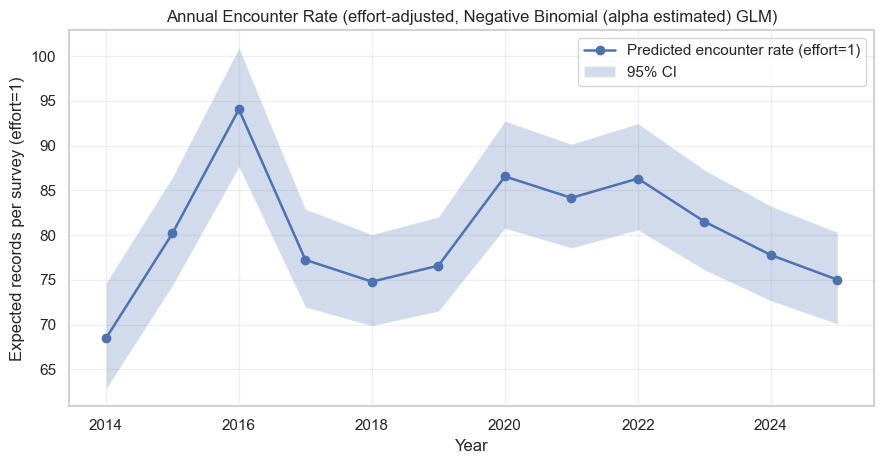

=== Trend on marginal annual means ===
Slope (per year) = 0.1611, p = 0.7918

[Notes]
1) Encounter rate is modeled with offset(log(effort)) for proper effort adjustment.
2) If overdispersion is present (Pearson chi2/df > 1.5), Negative Binomial is used; otherwise Poisson is adequate.
3) Optional covariates (e.g., habitat, weather) are supported and help reduce confounding.


In [1126]:
# === Effort-adjusted Encounter Rate via GLM/NegBin (annual estimates + 95% CI) ===
# 目的（“加固报告”模块）：
#   - 构造“努力校正后的遇见率（encounter rate）”年度指标
#   - 使用 GLM（Poisson；若过度离散则自动切换 Negative Binomial）
#   - 模型： count ~ C(year) + [可选协变量] + offset(log(effort))
#   - 输出 2014–2025 各年的“标准努力(=1)”预测值及 95% CI，并绘图
#
# 兼容性：
#   - 仅依赖 obs_data（已存在的数据表）
#   - 必要列：date, Nom_transect, ESPECE
#   - 可选列：habitat_type, weather_code, 以及任一“effort”数值列（见 CAND_EFFORT_COLS）
#   - 若无显式 effort 列，则回退为：effort = 同一 transect-年 的“独立调查日数”（unique date 数）
#
# 统计解释：
#   - 通过 offset(log(effort)) 在模型内做努力校正，优于先除以 effort 再回归（避免方差扭曲）
#   - 以 transect-year 为分析单元，减少行级相关性
#
# 输出：
#   - annual_encounter（DataFrame）：year, rate_pred, rate_ci_low, rate_ci_high
#   - 过度离散诊断、选择的家族（Poisson or NegBin）
#   - 图：年度预测 + 95% CI

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ---------------- 0) 基本参数与列名 ----------------
YR_MIN, YR_MAX = 2014, 2025
COL_DATE = "date"
COL_TRANSECT = "Nom_transect"
COL_SPECIES = "ESPECE"

# 可能存在的 effort 列候选（如距离/时长/总努力等）
CAND_EFFORT_COLS = [
    "effort_km","effort_h","Effort","effort","distance","duration",
    "km","hours","len_km","time_h","Longueur_km","Duree_h"
]

# ---------------- 1) 构造 transect-year 聚合表：count 与 effort ----------------
df0 = obs_data.copy()
df0["__date_parsed"] = pd.to_datetime(df0[COL_DATE], errors="coerce")
df0["year"] = df0["__date_parsed"].dt.year
df0 = df0[df0["year"].between(YR_MIN, YR_MAX)].copy()

# count：transect-year 的记录条数（每行视为一次记录）
grp_keys = [COL_TRANSECT, "year"]
agg = df0.groupby(grp_keys, dropna=True).size().rename("count").reset_index()

# effort：优先使用显式 effort 列（数值型，transect-year 求和）；否则回退为“独立调查日数”
effort_col_found = None
for c in CAND_EFFORT_COLS:
    if c in df0.columns and pd.api.types.is_numeric_dtype(df0[c]):
        effort_col_found = c
        break

if effort_col_found is not None:
    eff_tbl = (
        df0.groupby(grp_keys, dropna=True)[effort_col_found]
           .sum(min_count=1)
           .rename("effort")
           .reset_index()
    )
    print(f"[Info] Using explicit effort column: {effort_col_found} (summed over transect-year).")
else:
    eff_tbl = (
        df0.dropna(subset=[COL_TRANSECT, "__date_parsed"])
           .groupby(grp_keys)["__date_parsed"]
           .nunique()
           .rename("effort")
           .reset_index()
    )
    print("[Info] No explicit effort column found. Using number of unique survey dates per transect-year as effort.")

ty = pd.merge(agg, eff_tbl, on=grp_keys, how="outer")
# 保护：effort<=0 或缺失 → 设为 1，避免 log(0)
ty["effort"] = ty["effort"].fillna(0)
ty.loc[ty["effort"] <= 0, "effort"] = 1.0

# ---------------- 1.1 可选：加入协变量（如存在） ----------------
# habitat：众数；weather：均值。可按需要替换为你前序清洗的更权威口径。
covars = []
if "habitat_type" in df0.columns:
    mode_hab = (
        df0.dropna(subset=[COL_TRANSECT, "year","habitat_type"])
           .groupby(grp_keys)["habitat_type"]
           .agg(lambda x: x.mode().iat[0] if len(x.mode()) else np.nan)
           .reset_index()
           .rename(columns={"habitat_type":"habitat_type_mode"})
    )
    ty = ty.merge(mode_hab, on=grp_keys, how="left")
    covars.append("C(habitat_type_mode)")

if "weather_code" in df0.columns and pd.api.types.is_numeric_dtype(df0["weather_code"]):
    wmean = (
        df0.dropna(subset=[COL_TRANSECT, "year","weather_code"])
           .groupby(grp_keys)["weather_code"].mean().reset_index()
           .rename(columns={"weather_code":"weather_mean"})
    )
    ty = ty.merge(wmean, on=grp_keys, how="left")
    covars.append("weather_mean")

# ---------------- 2) 模型拟合：Poisson → NegBin（自动过度离散检测） ----------------
rhs_terms = ["C(year)"] + covars
formula = "count ~ " + " + ".join(rhs_terms)

# Poisson
poisson_model = smf.glm(
    formula=formula,
    data=ty,
    family=sm.families.Poisson(),
    offset=np.log(ty["effort"].astype(float))
).fit()

# 过度离散诊断（Pearson χ²/df）
pearson_chi2 = poisson_model.pearson_chi2
df_resid = poisson_model.df_resid
dispersion = pearson_chi2 / df_resid if df_resid > 0 else np.nan
use_negbin = bool(dispersion > 1.5)  # 阈值可根据需要调整

print(f"[Dispersion] Pearson chi2/df = {dispersion:.3f} → "
      f"{'Use Negative Binomial' if use_negbin else 'Poisson seems adequate'}")

if use_negbin:
    # NegativeBinomial 在 statsmodels 中是独立模型，支持 from_formula + offset
    model = sm.NegativeBinomial.from_formula(
        formula=formula,
        data=ty,
        offset=np.log(ty["effort"].astype(float))
    ).fit(disp=0)  # disp=0 可选，避免冗余输出
    family_name = "Negative Binomial (alpha estimated)"
else:
    model = poisson_model
    family_name = "Poisson"

print(f"[Model] Using {family_name} GLM with offset(log(effort)).")

# ---------------- 3) 年度边际均值（effort=1）预测 + 95% CI ----------------
pred_df = pd.DataFrame({"year": list(range(YR_MIN, YR_MAX+1))})
pred_df["effort"] = 1.0  # 标准努力：每年“单次调查”的期望记录数

# 协变量取参考值（habitat 取众数，weather 取均值）
if "habitat_type_mode" in ty.columns:
    ref_hab = ty["habitat_type_mode"].mode().iat[0] if ty["habitat_type_mode"].notna().any() else None
    pred_df["habitat_type_mode"] = ref_hab
if "weather_mean" in ty.columns:
    pred_df["weather_mean"] = ty["weather_mean"].mean()

# --- 替换从 pred_res 开始的代码 ---
pred_res = model.get_prediction(pred_df.assign(offset=np.log(pred_df["effort"])))
pred_summary = pred_res.summary_frame(alpha=0.05)

# 使用通用列名（兼容 Poisson GLM 和 Negative Binomial）
annual_encounter = pd.DataFrame({
    "year": pred_df["year"].values,
    "rate_pred": pred_summary["predicted"].values,
    "rate_ci_low": pred_summary["ci_lower"].values,
    "rate_ci_high": pred_summary["ci_upper"].values
}).set_index("year")

display(annual_encounter.round(4))

# ---------------- 4) 可视化：年度预测 + 95% CI ----------------
plt.figure(figsize=(9,4.8))
plt.plot(annual_encounter.index, annual_encounter["rate_pred"], marker="o", linewidth=1.8,
         label="Predicted encounter rate (effort=1)")
plt.fill_between(annual_encounter.index,
                 annual_encounter["rate_ci_low"],
                 annual_encounter["rate_ci_high"],
                 alpha=0.25, label="95% CI")
plt.title(f"Annual Encounter Rate (effort-adjusted, {family_name} GLM)")
plt.xlabel("Year"); plt.ylabel("Expected records per survey (effort=1)")
plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# ---------------- 5) 年度边际均值的线性趋势（仅作量化参考） ----------------
lin_X = sm.add_constant(annual_encounter.index.values.astype(float))
lin_mod = sm.OLS(annual_encounter["rate_pred"].values.astype(float), lin_X).fit()
print("=== Trend on marginal annual means ===")
print(f"Slope (per year) = {lin_mod.params[1]:.4f}, p = {lin_mod.pvalues[1]:.4f}")

print("\n[Notes]")
print("1) Encounter rate is modeled with offset(log(effort)) for proper effort adjustment.")
print("2) If overdispersion is present (Pearson chi2/df > 1.5), Negative Binomial is used; otherwise Poisson is adequate.")
print("3) Optional covariates (e.g., habitat, weather) are supported and help reduce confounding.")


# The effort-adjusted encounter rate exhibited substantial year-to-year variability, with a clear non-linear pattern rather than a monotonic trend. Encounter rates increased sharply from 2014 to 2016, peaked around 2016, and subsequently declined and stabilized after 2018.
# A simple linear trend (slope = 0.16/year, p = 0.79) was not significant, suggesting that the variation is better described by a short-term fluctuation rather than a sustained increase or decrease.
# This pattern likely reflects variations in survey effort efficiency, weather, or local population dynamics rather than directional ecological change.)


### 7.3 Effort-Adjusted Encounter Rate / 努力校正后的遇见率

GLM-based analysis accounting for observation effort to estimate true encounter rates.

基于 GLM 的分析,考虑观测努力量以估计真实遇见率。

In [1127]:
# ! pip install pygam

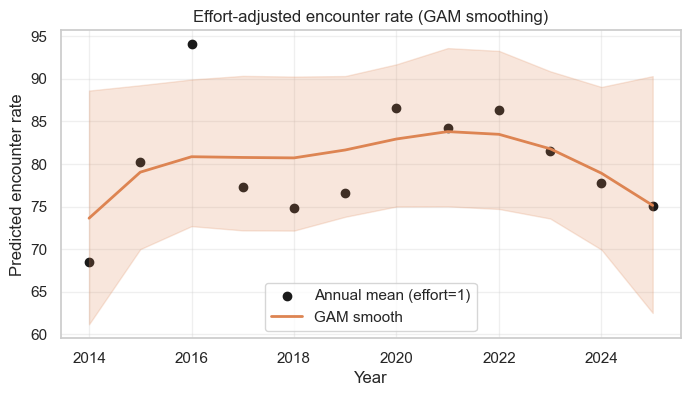

In [1128]:
from pygam import PoissonGAM, s

X = annual_encounter.index.values.reshape(-1, 1)
y = annual_encounter['rate_pred'].values
gam = PoissonGAM(s(0, n_splines=6)).fit(X, y)

plt.figure(figsize=(8,4))
plt.scatter(X, y, color='k', label='Annual mean (effort=1)')
plt.plot(X, gam.predict(X), color='C1', linewidth=2, label='GAM smooth')
plt.fill_between(X.flatten(),
                 gam.confidence_intervals(X)[:,0],
                 gam.confidence_intervals(X)[:,1],
                 color='C1', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Predicted encounter rate')
plt.title('Effort-adjusted encounter rate (GAM smoothing)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [1129]:
# The effort-adjusted encounter rate displayed a distinct non-linear temporal pattern between 2014 and 2025.
# Encounter rates increased sharply in the early years (2014–2016), plateaued during 2017–2021, and showed a slight decline afterwards.
# The GAM smoothing highlights this “rise–stabilization–decline” trajectory, with broad confidence intervals in recent years indicating higher uncertainty.
# This suggests that while survey efficiency and spatial coverage initially improved, ecological or operational factors may have contributed to a mild reduction in observed encounter rates in the most recent period.

In [1130]:
# # %% [markdown]
# # ## 年度物种数量变化趋势 / Annual Species Abundance Over Time
# # 计算每个物种（ESPECE）在每年（year）的观测数量，并可视化趋势。
# 
# # %%
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # 确保日期列已转换为 datetime 类型 / Ensure date is datetime
# obs_data_winsor['date'] = pd.to_datetime(obs_data_winsor['date'], errors='coerce')
# obs_data_winsor['year'] = obs_data_winsor['date'].dt.year
# 
# # 选择总计列作为观测数量 / Choose total count column for abundance
# count_col = 'total_AV_avec_vol'  # 包含听觉+视觉+飞行观测总数的列
# 
# # 按年份和物种分组求和 / Group by year and species to get total counts
# species_yearly = (
#     obs_data_winsor
#     .groupby(['year', 'ESPECE'])[count_col]
#     .sum()
#     .reset_index()
# )
# 
# # 检查结果 / Preview
# display(species_yearly.head())
# 
# # %% [markdown]
# # ## 可视化年度趋势（按物种分组）
# # 使用线图展示不同物种随年份变化的观测数量
# 
# # %%
# plt.figure(figsize=(12, 7))
# sns.lineplot(
#     data=species_yearly,
#     x='year',
#     y=count_col,
#     hue='ESPECE',
#     lw=2,
#     alpha=0.8
# )
# 
# plt.title("Annual Bird Species Abundance (2014–2025)", fontsize=16)
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Total Count (Auditory + Visual + Flight)", fontsize=12)
# plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

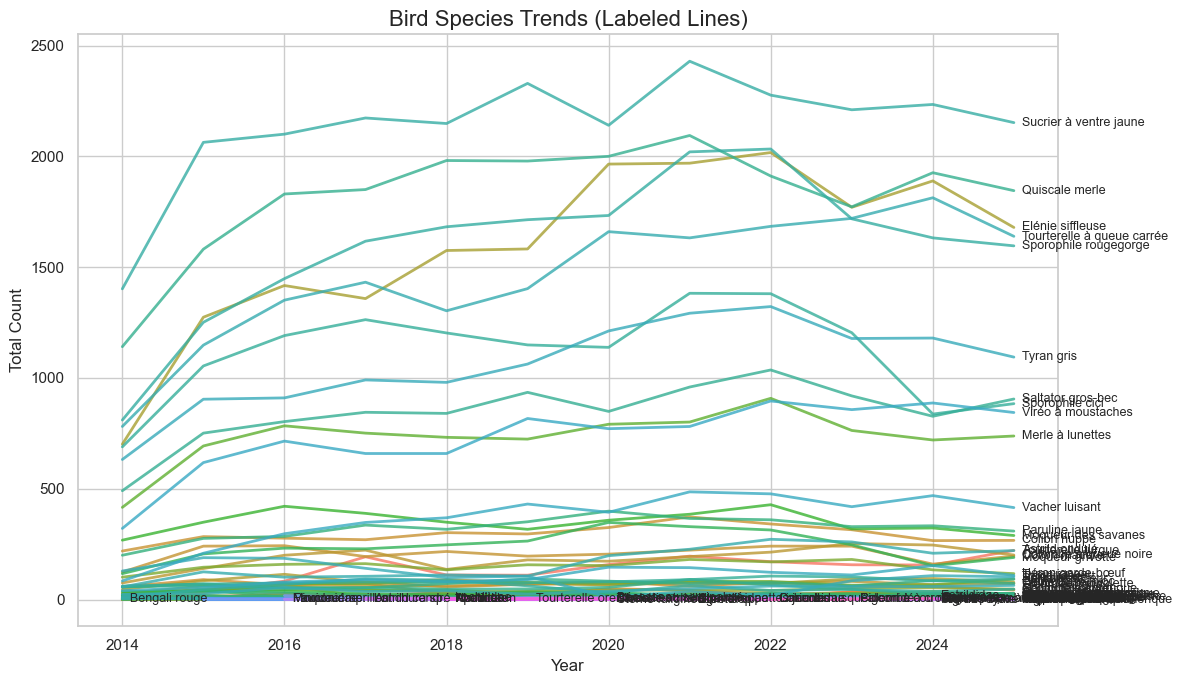

In [1131]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=species_yearly,
    x='year',
    y=count_col,
    hue='ESPECE',
    lw=2,
    alpha=0.8,
    legend=False  # 关闭图例
)

# 在每条线末尾添加文字标签 / Label each line end
for species in species_yearly['ESPECE'].unique():
    subset = species_yearly[species_yearly['ESPECE'] == species]
    last_year = subset['year'].max()
    last_value = subset.loc[subset['year'] == last_year, count_col].values[0]
    plt.text(last_year + 0.1, last_value, species, fontsize=9, va='center')

plt.title("Bird Species Trends (Labeled Lines)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()

In [1132]:
# 计算每种鸟类的观测总数
species_counts = obs_data_winsor.groupby('ESPECE')['total_AV_avec_vol'].sum().sort_values(ascending=False)

# 取前10种最常见鸟
print(species_counts.head(10))


ESPECE
Quiscale merle                35429.666667
Sucrier à ventre jaune        29593.000000
Elénie siffleuse              20224.000000
Sporophile rougegorge         19812.666667
Tourterelle à queue carrée    19567.000000
Sporophile cici               14209.000000
Tyran gris                    13269.666667
Saltator gros-bec             10352.000000
Viréo à moustaches             9201.000000
Merle à lunettes               9066.000000
Name: total_AV_avec_vol, dtype: float64


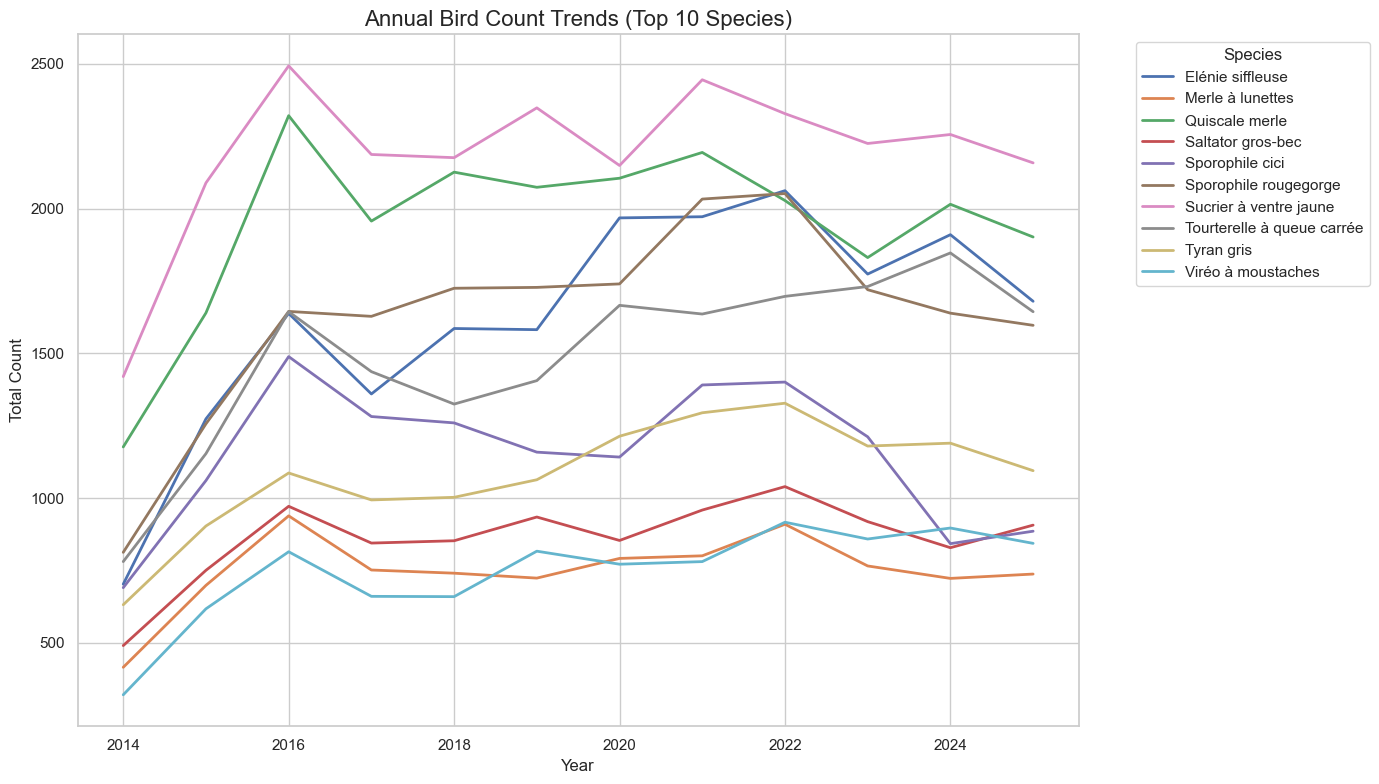

In [1133]:
# %% [markdown]
# ## 年尺度鸟类数量变化折线图（使用清洗后的数据 obs_data_cleaned）
# ## Annual Bird Count Trends (based on cleaned dataset)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set Seaborn style
sns.set(style="whitegrid")

# 十种高丰度鸟类 / Top 10 most abundant species
top10_species = [
    "Sucrier à ventre jaune",
    "Quiscale merle",
    "Sporophile rougegorge",
    "Elénie siffleuse",
    "Tourterelle à queue carrée",
    "Sporophile cici",
    "Tyran gris",
    "Saltator gros-bec",
    "Viréo à moustaches",
    "Merle à lunettes"
]

# 确保日期为 datetime 格式 / Ensure date is datetime
obs_data_cleaned['date'] = pd.to_datetime(obs_data_cleaned['date'], errors='coerce')

# 提取年份 / Extract year
obs_data_cleaned['year'] = obs_data_cleaned['date'].dt.year

# 仅保留十种目标鸟类 / Filter top 10 species
top10_data = obs_data_cleaned[obs_data_cleaned['ESPECE'].isin(top10_species)]

# 按年份和物种汇总年度总数量 / Group by year and species, sum counts
annual_counts = (
    top10_data.groupby(['year', 'ESPECE'])['total_AV_avec_vol']
    .sum()
    .reset_index()
)

# %% [markdown]
# ### 绘制年度数量变化折线图  
# ### Plot annual count trends for top 10 bird species

# %%
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=annual_counts,
    x='year',
    y='total_AV_avec_vol',
    hue='ESPECE',
    linewidth=2
)

plt.title("Annual Bird Count Trends (Top 10 Species)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.legend(
    title="Species",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

## 8. Species-Specific Analysis / 物种特定分析

Detailed temporal trends and environmental relationships for key bird species.

关键鸟类物种的详细时间趋势和环境关系。

In [1134]:
unique_months = obs_data_cleaned["month"].unique()
unique_months

array([4, 5, 6, 3, 7], dtype=int32)

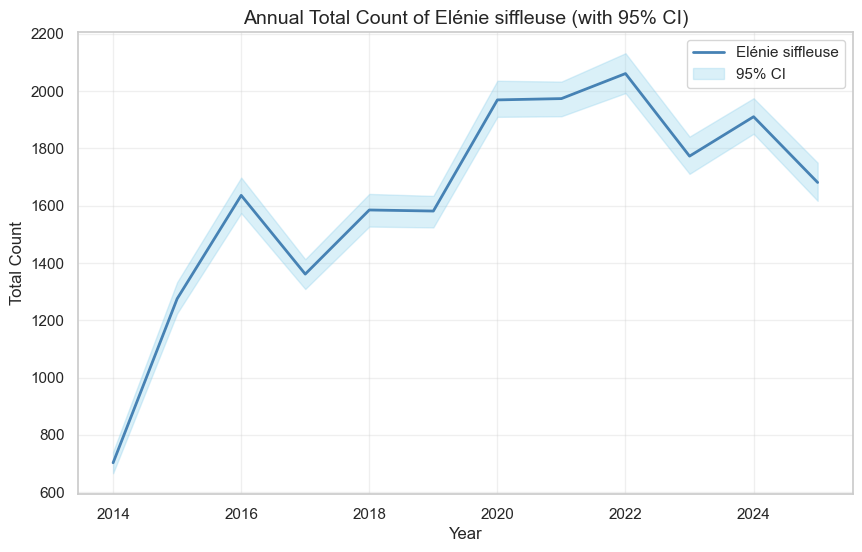

In [1135]:
# %% [markdown]
# ## 年尺度 Elénie siffleuse 总数量变化趋势（使用 total_AV_avec_vol）
# ## Annual Total Count Trend of Elénie siffleuse

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set style
sns.set(style="whitegrid")

# 选择目标物种 / Target species
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# 按年份汇总总数量 / Aggregate total counts by year
annual_counts = data_species.groupby("year")["total_AV_avec_vol"].sum().reset_index()

# 定义 Bootstrap 函数计算总数置信区间
def bootstrap_ci_total(values, n_boot=1000, ci=95):
    totals = []
    values = np.array(values)
    for _ in range(n_boot):
        sample = np.random.choice(values, size=len(values), replace=True)
        totals.append(np.sum(sample))
    lower = np.percentile(totals, (100 - ci) / 2)
    upper = np.percentile(totals, 100 - (100 - ci) / 2)
    return np.mean(totals), lower, upper

# 计算每年的总数均值和置信区间
results = []
for year, group in data_species.groupby("year"):
    counts = group["total_AV_avec_vol"].values
    mean_total, lower, upper = bootstrap_ci_total(counts)
    results.append({"year": year, "mean_total": mean_total, "lower": lower, "upper": upper})

df_ci = pd.DataFrame(results)

# %% [markdown]
# ### 绘制年度总计数折线图及置信区间

# %%
plt.figure(figsize=(10,6))
plt.plot(df_ci["year"], df_ci["mean_total"], color="steelblue", linewidth=2, label=species)
plt.fill_between(df_ci["year"], df_ci["lower"], df_ci["upper"], alpha=0.3, color="skyblue", label="95% CI")
plt.title(f"Annual Total Count of {species} (with 95% CI)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### 8.1 Annual Trends for Target Species / 目标物种年度趋势

Annual count trends with bootstrap confidence intervals for Elénie siffleuse.

Elénie siffleuse 的年度计数趋势及自举置信区间。

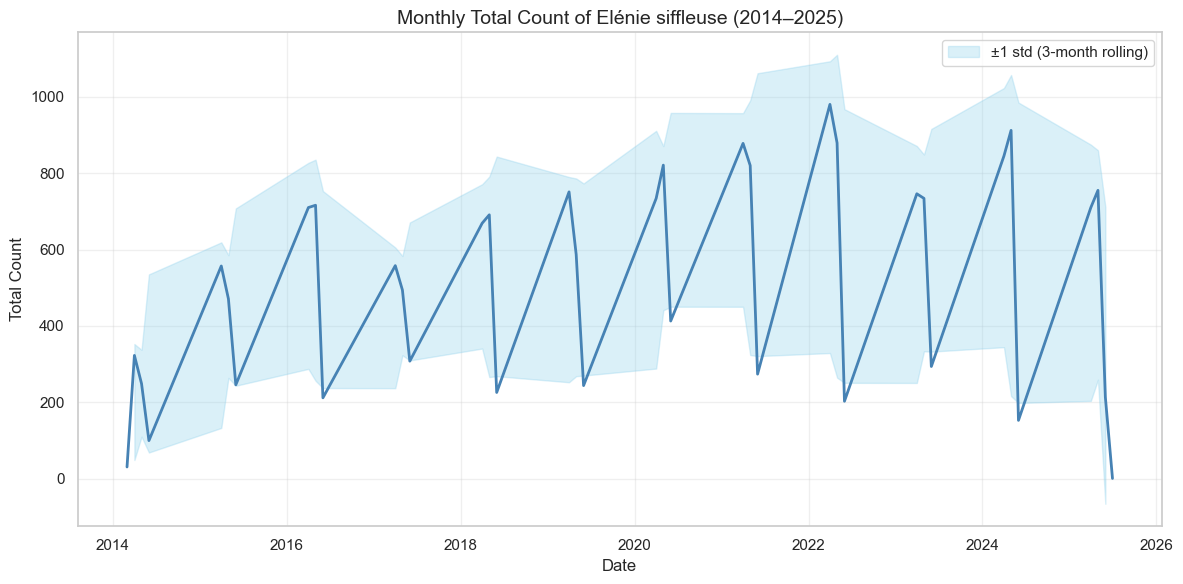

In [1136]:
# %% [markdown]
# ## 月尺度 Elénie siffleuse 数量变化趋势（使用现有 year 和 month 列）
# ## Monthly Total Count Trend of Elénie siffleuse (using existing year and month columns)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set style
sns.set(style="whitegrid")

# 选择目标物种 / Target species
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# 按年和月聚合总数 / Aggregate total counts by year and month
monthly_counts = (
    data_species.groupby(["year", "month"])["total_AV_avec_vol"]
    .sum()
    .reset_index()
)

# 按时间顺序创建年月序列 / Create time index
monthly_counts["year_month"] = pd.to_datetime(
    monthly_counts["year"].astype(str) + "-" + monthly_counts["month"].astype(str) + "-01"
)

# %% [markdown]
# ### 绘制月尺度总数折线图 / Plot monthly total count trend

# %%
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_counts,
    x="year_month",
    y="total_AV_avec_vol",
    color="steelblue",
    linewidth=2
)
plt.fill_between(
    monthly_counts["year_month"],
    monthly_counts["total_AV_avec_vol"].rolling(3, center=True).mean() - monthly_counts["total_AV_avec_vol"].rolling(3, center=True).std(),
    monthly_counts["total_AV_avec_vol"].rolling(3, center=True).mean() + monthly_counts["total_AV_avec_vol"].rolling(3, center=True).std(),
    color="skyblue",
    alpha=0.3,
    label="±1 std (3-month rolling)"
)
plt.title(f"Monthly Total Count of {species} (2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### 8.2 Monthly Trends for Target Species / 目标物种月度趋势

Fine-scale temporal patterns at monthly resolution.

月度分辨率的精细时间模式。

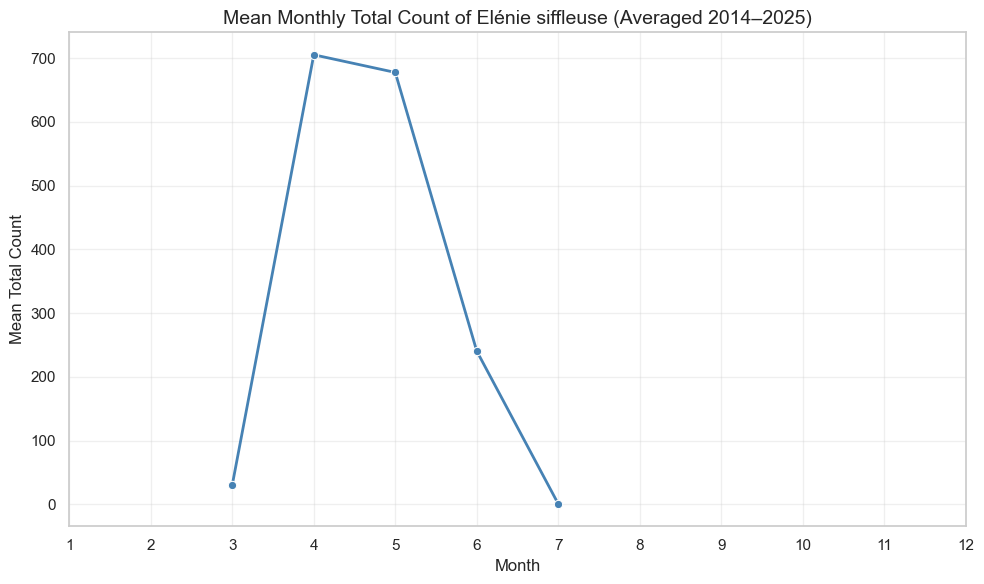

In [1137]:
# %% [markdown]
# ## 平均月尺度 Elénie siffleuse 数量变化（2014–2025 平均）
# ## Mean Monthly Total Count of Elénie siffleuse (averaged across 2014–2025)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 选择目标物种
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# 按年份和月份聚合总数
monthly_sum = (
    data_species.groupby(["year", "month"])["total_AV_avec_vol"]
    .sum()
    .reset_index()
)

# 按月取平均值（跨年平均）
mean_monthly = (
    monthly_sum.groupby("month")["total_AV_avec_vol"]
    .mean()
    .reset_index()
)

# %% [markdown]
# ### 绘制平均月尺度折线图

# %%
plt.figure(figsize=(10,6))
sns.lineplot(
    data=mean_monthly,
    x="month",
    y="total_AV_avec_vol",
    marker="o",
    color="steelblue",
    linewidth=2
)
plt.title(f"Mean Monthly Total Count of {species} (Averaged 2014–2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Mean Total Count", fontsize=12)
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/Users/jinzhuoyuan/King/Saclay/Course/AS/AS_Code/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jinzhuoyuan/King/Saclay/Course/AS/AS_Code/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


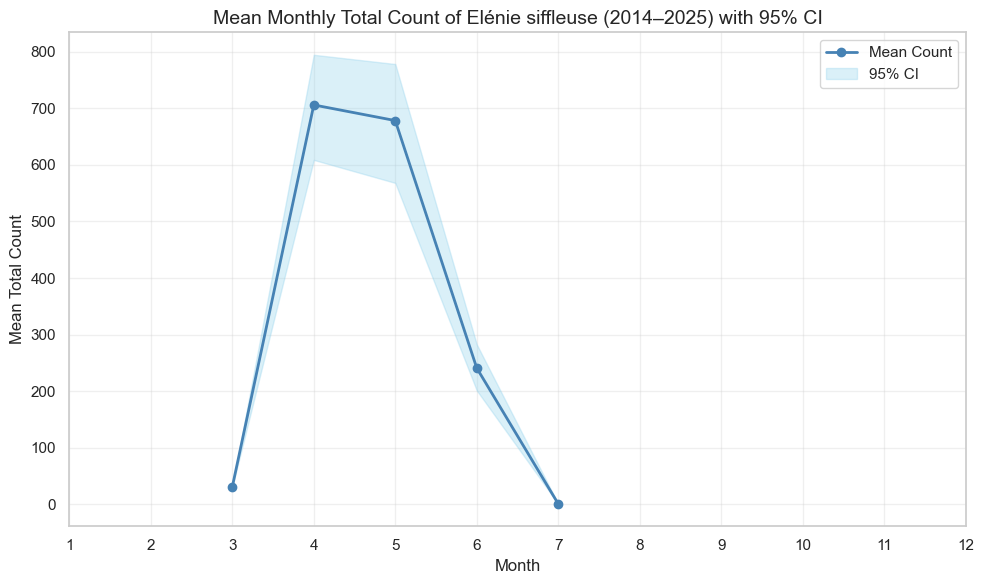

In [1138]:
# %% [markdown]
# ## 平均月尺度 Elénie siffleuse 数量变化及置信区间（2014–2025）
# ## Mean Monthly Total Count with 95% CI

# %%
import numpy as np

# 定义 Bootstrap 函数 / bootstrap function
def bootstrap_ci(values, n_boot=1000, ci=95):
    """返回均值及置信区间"""
    values = np.array(values)
    means = []
    for _ in range(n_boot):
        sample = np.random.choice(values, size=len(values), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(means), lower, upper

# 按月计算均值和置信区间
monthly_results = []
for month in range(1, 13):
    # 取每个月所有年份的数据
    counts = monthly_sum[monthly_sum["month"] == month]["total_AV_avec_vol"].values
    mean, lower, upper = bootstrap_ci(counts)
    monthly_results.append({"month": month, "mean": mean, "lower": lower, "upper": upper})

df_monthly_ci = pd.DataFrame(monthly_results)

# %% [markdown]
# ### 绘制带 95% 置信区间的月均折线图

# %%
plt.figure(figsize=(10,6))
plt.plot(df_monthly_ci["month"], df_monthly_ci["mean"], color="steelblue", linewidth=2, marker="o", label="Mean Count")
plt.fill_between(df_monthly_ci["month"], df_monthly_ci["lower"], df_monthly_ci["upper"], color="skyblue", alpha=0.3, label="95% CI")
plt.title(f"Mean Monthly Total Count of {species} (2014–2025) with 95% CI", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Mean Total Count", fontsize=12)
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

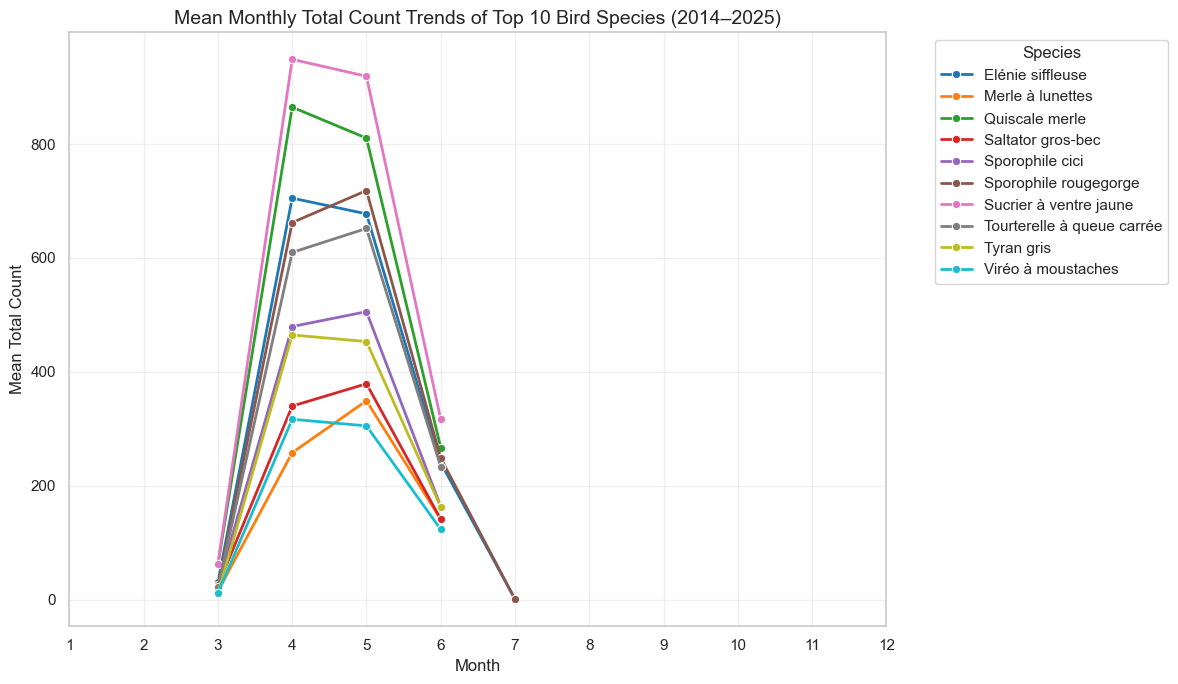

In [1139]:
# %% [markdown]
# ## 平均月尺度数量 Top10 鸟类数量变化趋势
# ## Mean Monthly Total Count Trends of Top 10 Most Abundant Species (2014–2025)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 计算每个物种的总观测量（2014–2025 全部）
species_total = (
    obs_data_cleaned.groupby("ESPECE")["total_AV_avec_vol"]
    .sum()
    .sort_values(ascending=False)
)

# 选择前10个物种
top10_species = species_total.head(10).index.tolist()

# 筛选出这10个物种的数据
top10_data = obs_data_cleaned[obs_data_cleaned["ESPECE"].isin(top10_species)].copy()

# 按年份、月份、物种汇总每月总计数
monthly_counts = (
    top10_data.groupby(["ESPECE", "year", "month"])["total_AV_avec_vol"]
    .sum()
    .reset_index()
)

# 计算跨年平均（月尺度）
mean_monthly_counts = (
    monthly_counts.groupby(["ESPECE", "month"])["total_AV_avec_vol"]
    .mean()
    .reset_index()
)

# %% [markdown]
# ### 绘制折线图（每个物种一条线）

# %%
plt.figure(figsize=(12,7))
sns.lineplot(
    data=mean_monthly_counts,
    x="month",
    y="total_AV_avec_vol",
    hue="ESPECE",
    marker="o",
    linewidth=2,
    palette="tab10"
)
plt.title("Mean Monthly Total Count Trends of Top 10 Bird Species (2014–2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Mean Total Count", fontsize=12)
plt.xticks(range(1,13))
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Top 10 species: ['Sucrier à ventre jaune', 'Quiscale merle', 'Sporophile rougegorge', 'Elénie siffleuse', 'Tourterelle à queue carrée', 'Sporophile cici', 'Tyran gris', 'Saltator gros-bec', 'Merle à lunettes', 'Viréo à moustaches']


/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/3646147177.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_species_top10["date"] = pd.to_datetime(


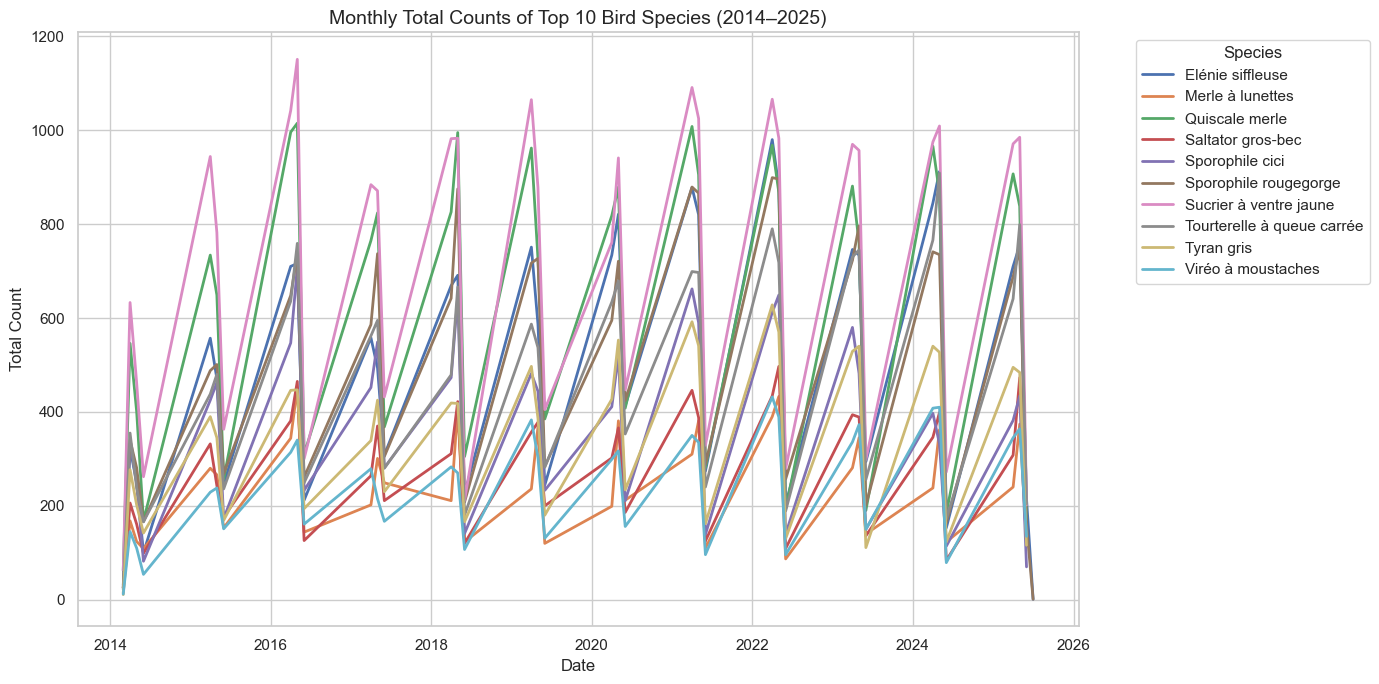

In [1140]:
# %% [markdown]
# ## 2014–2025 年 Top 10 鸟类的月尺度数量变化趋势
# ## Monthly Total Count Trends for Top 10 Bird Species (2014–2025)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# === 1. 计算每个物种的总数量（用于筛选 Top 10） ===
species_total = (
    obs_data_cleaned.groupby("ESPECE")["total_AV_avec_vol"]
    .sum()
    .sort_values(ascending=False)
)
top10_species = species_total.head(10).index.tolist()

print("Top 10 species:", top10_species)

# === 2. 计算月尺度总数量（按物种、年份、月份汇总） ===
monthly_species = (
    obs_data_cleaned.groupby(["ESPECE", "year", "month"])["total_AV_avec_vol"]
    .sum()
    .reset_index()
)

# 仅保留 Top 10 物种
monthly_species_top10 = monthly_species[monthly_species["ESPECE"].isin(top10_species)]

# === 3. 创建日期列（方便排序和绘图） ===
monthly_species_top10["date"] = pd.to_datetime(
    monthly_species_top10["year"].astype(str)
    + "-"
    + monthly_species_top10["month"].astype(str)
    + "-01"
)

# === 4. 绘图 ===
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_species_top10,
    x="date",
    y="total_AV_avec_vol",
    hue="ESPECE",
    linewidth=2
)

plt.title("Monthly Total Counts of Top 10 Bird Species (2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

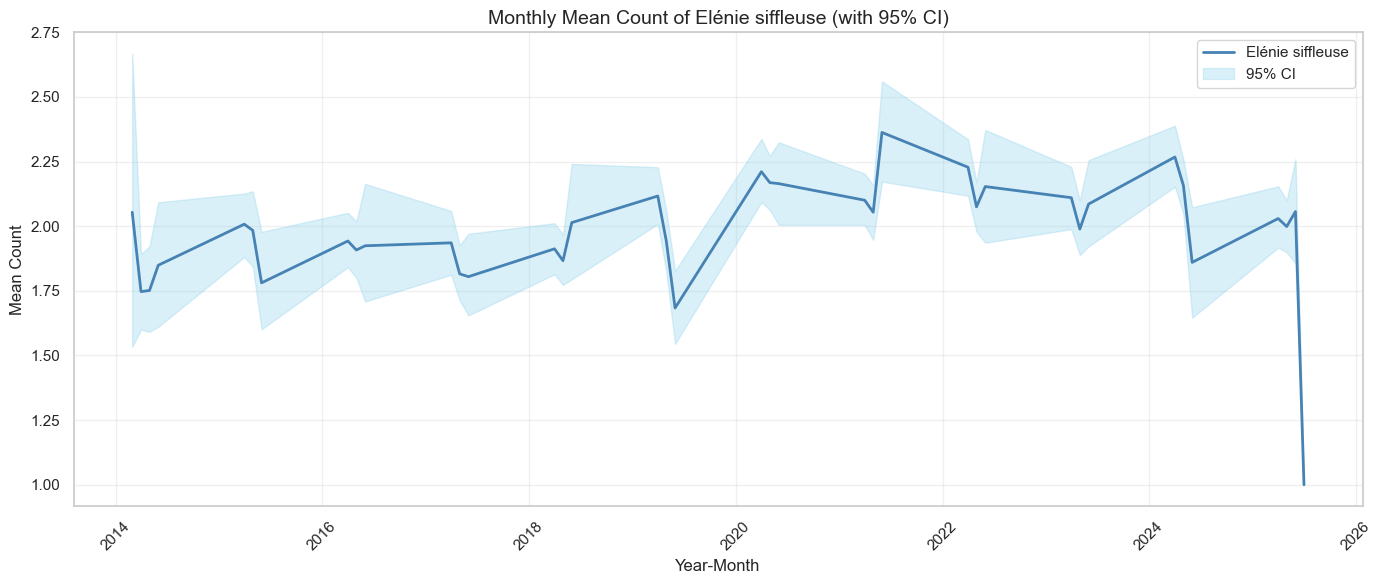

In [1141]:
# %% [markdown]
# ## 月尺度 Elénie siffleuse 数量变化趋势
# ## Monthly Count Trend of Elénie siffleuse

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格 / Set Seaborn style
sns.set(style="whitegrid")

# 选择目标物种 / Target species
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# 创建年月列 / Create year-month column
data_species['year_month'] = pd.to_datetime(data_species['year'].astype(str) + '-' + data_species['month'].astype(str).str.zfill(2))

# 按年月汇总总计数 / Aggregate total counts by year-month
monthly_counts = data_species.groupby('year_month')['total_AV_avec_vol'].agg(list).reset_index()

# Bootstrap 函数计算均值和95%置信区间 / Compute mean and 95% CI via bootstrap
def bootstrap_ci(values, n_boot=1000, ci=95):
    means = []
    values = np.array(values)
    for _ in range(n_boot):
        sample = np.random.choice(values, size=len(values), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(means), lower, upper

# 计算均值和置信区间 / Compute mean and CI
results = []
for _, row in monthly_counts.iterrows():
    counts = row['total_AV_avec_vol']
    if len(counts) > 0:
        mean, lower, upper = bootstrap_ci(counts)
        results.append({
            "year_month": row['year_month'],
            "mean": mean,
            "lower": lower,
            "upper": upper
        })

df_monthly_ci = pd.DataFrame(results)

# %% [markdown]
# ### 绘制月度折线图及置信区间 / Plot monthly trends with 95% CI

# %%
plt.figure(figsize=(14,6))
plt.plot(df_monthly_ci['year_month'], df_monthly_ci['mean'], color='steelblue', linewidth=2, label=species)
plt.fill_between(df_monthly_ci['year_month'], df_monthly_ci['lower'], df_monthly_ci['upper'], alpha=0.3, color='skyblue', label='95% CI')
plt.title(f"Monthly Mean Count of {species} (with 95% CI)", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Mean Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [1142]:
# 转数值类型
obs_data_cleaned[['nuages','pluie','vent','visibilite']] = obs_data_cleaned[['nuages','pluie','vent','visibilite']].apply(pd.to_numeric, errors='coerce')

# 按年和风力聚合 Elénie siffleuse 数量
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned['ESPECE'] == species]

agg_data = data_species.groupby(['year','vent'])['total_AV_avec_vol'].mean().reset_index()

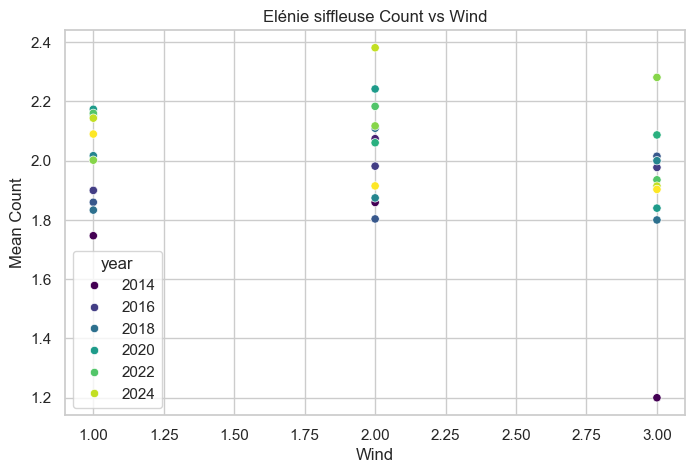

In [1143]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=agg_data, x='vent', y='total_AV_avec_vol', hue='year', palette='viridis')
plt.xlabel("Wind")
plt.ylabel("Mean Count")
plt.title("Elénie siffleuse Count vs Wind")
plt.show()

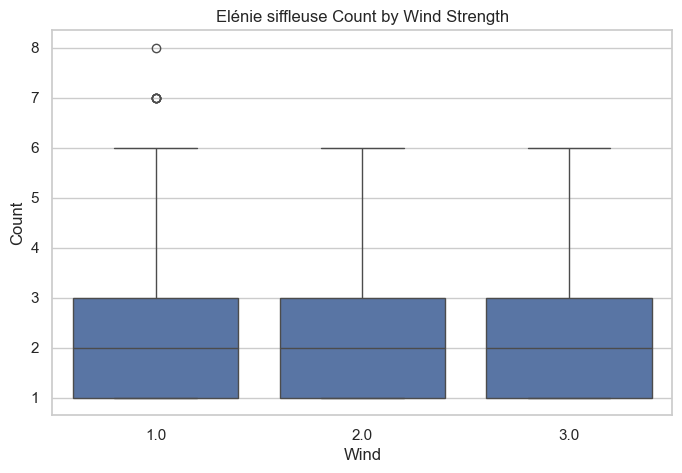

In [1144]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data_species, x='vent', y='total_AV_avec_vol')
plt.xlabel("Wind")
plt.ylabel("Count")
plt.title("Elénie siffleuse Count by Wind Strength")
plt.show()

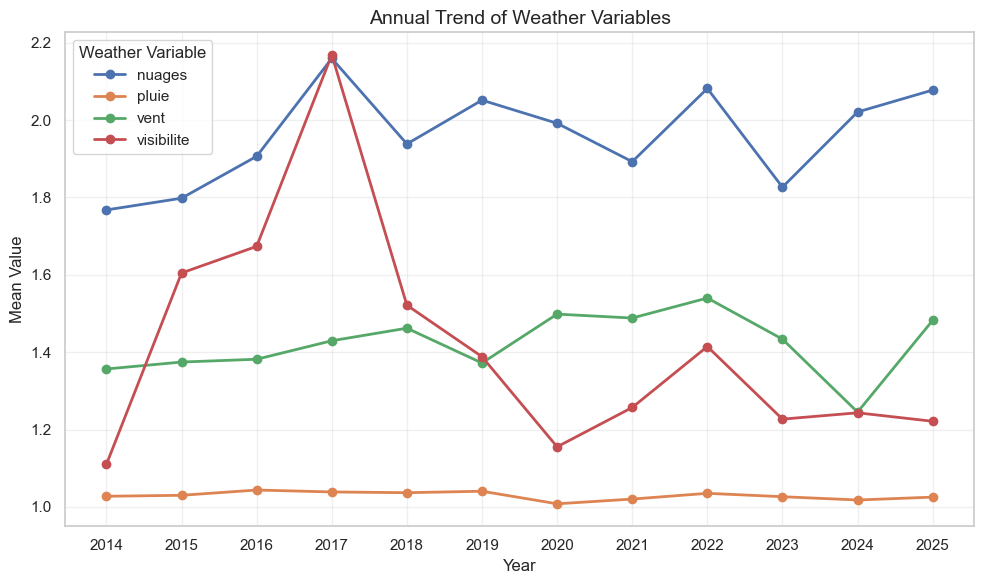

In [1145]:
# %% [markdown]
# ## Annual Trend of Weather Variables / 年度天气指标趋势

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set style
sns.set(style="whitegrid")

# 将天气列转换为数值 / Ensure numeric type
weather_cols = ['nuages', 'pluie', 'vent', 'visibilite']
obs_data_cleaned[weather_cols] = obs_data_cleaned[weather_cols].apply(pd.to_numeric, errors='coerce')

# 按年份计算平均值 / Aggregate yearly mean
annual_weather = obs_data_cleaned.groupby('year')[weather_cols].mean().reset_index()

# %% [markdown]
# ### 绘制年度折线图 / Plot annual trend

# %%
plt.figure(figsize=(10,6))

# 遍历天气列绘制折线
for col in weather_cols:
    plt.plot(annual_weather['year'], annual_weather[col], marker='o', linewidth=2, label=col)

plt.title("Annual Trend of Weather Variables", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.xticks(annual_weather['year'])
plt.grid(True, alpha=0.3)
plt.legend(title="Weather Variable")
plt.tight_layout()
plt.show()

## 9. Environmental Influences / 环境影响分析

### 9.1 Weather Trends / 天气趋势

Temporal patterns in weather variables (clouds, rain, wind, visibility).

天气变量(云量、降雨、风力、能见度)的时间模式。

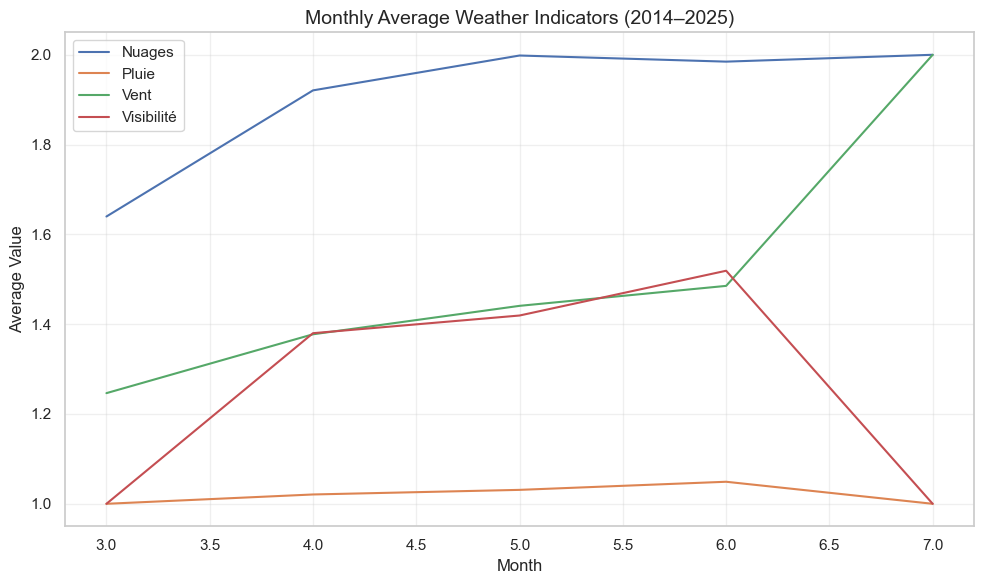

In [1146]:
# %% [markdown]
# ## 月尺度天气变化趋势图
# ## Monthly Weather Trends (nuages, pluie, vent, visibilite)

# %%
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 按月聚合（取平均值）
monthly_weather = (
    obs_data_cleaned
    .groupby(['year', 'month'])[['nuages', 'pluie', 'vent', 'visibilite']]
    .mean()
    .reset_index()
)

# 为了展示总体月度趋势，可以按月份再平均一次（跨年度）
monthly_mean_weather = (
    monthly_weather
    .groupby('month')[['nuages', 'pluie', 'vent', 'visibilite']]
    .mean()
    .reset_index()
)

# 绘制折线图
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_mean_weather, x='month', y='nuages', label='Nuages')
sns.lineplot(data=monthly_mean_weather, x='month', y='pluie', label='Pluie')
sns.lineplot(data=monthly_mean_weather, x='month', y='vent', label='Vent')
sns.lineplot(data=monthly_mean_weather, x='month', y='visibilite', label='Visibilité')

plt.title("Monthly Average Weather Indicators (2014–2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [1147]:
# %% [markdown]
# ## Annual Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每年极端天气观测数量

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 确保 year 和 month 列存在 / Ensure year and month columns exist
# obs_data_cleaned['year'], obs_data_cleaned['month']

# 按年份和月份统计极端天气数量 / Count extreme weather per month
monthly_extreme_counts = (
    obs_data_cleaned[obs_data_cleaned["is_extreme_weather"]]
    .groupby(["year"])
    .size()
    .reset_index(name="extreme_count")
)

# 查看前几行 / Preview
monthly_extreme_counts


year  extreme_count
0   2014            292
1   2015            691
2   2016            945
3   2017           1027
4   2018           1109
5   2019            650
6   2020            602
7   2021            643
8   2022            907
9   2023            907
10  2024            474
11  2025            837

### 9.2 Extreme Weather Events / 极端天气事件

Frequency and temporal distribution of extreme weather conditions.

极端天气条件的频率和时间分布。

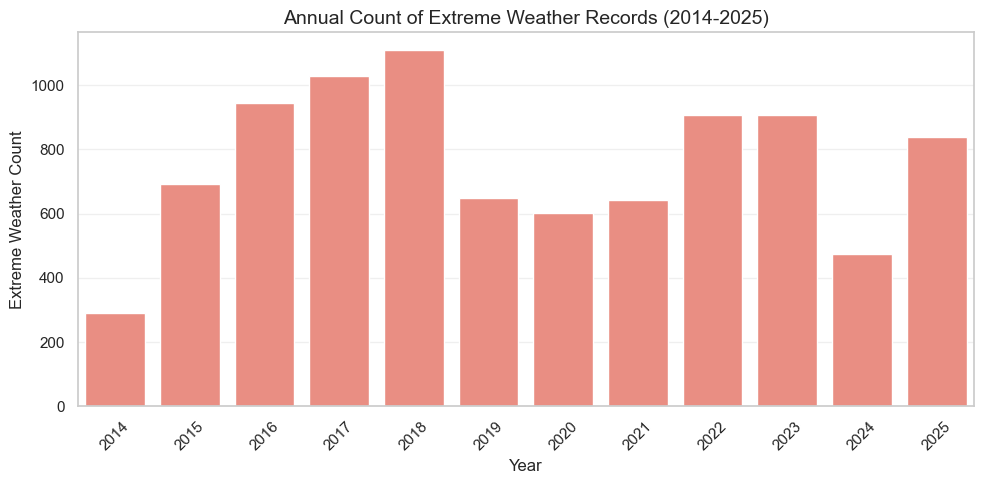

In [1148]:
# %% [markdown]
# ## Annual Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每年极端天气观测数量柱状图

# %%
plt.figure(figsize=(10,5))

# 绘制柱状图 / Bar plot
sns.barplot(
    data=monthly_extreme_counts,
    x="year",
    y="extreme_count",
    color='salmon'
)

plt.title("Annual Count of Extreme Weather Records (2014-2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Extreme Weather Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)  # 仅显示y轴网格
plt.tight_layout()
plt.show()

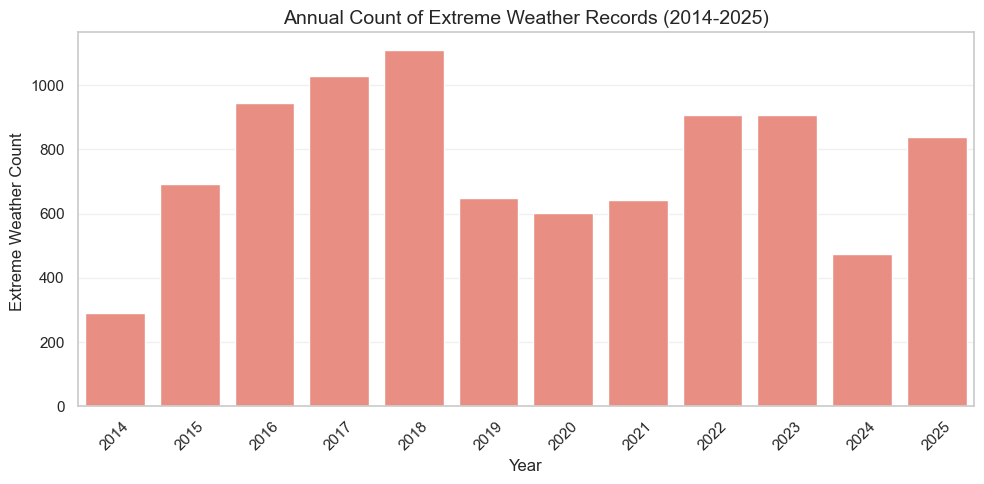

In [1149]:
# %% [markdown]
# ## Annual Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每年极端天气观测数量柱状图

# %%
plt.figure(figsize=(10,5))

# 绘制柱状图 / Bar plot
sns.barplot(
    data=monthly_extreme_counts,
    x="year",
    y="extreme_count",
    color='salmon'
)

plt.title("Annual Count of Extreme Weather Records (2014-2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Extreme Weather Count ", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)  # 仅显示y轴网格
plt.tight_layout()
plt.show()

In [1150]:
# %% [markdown]
# ## Monthly Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每个月极端天气观测数量

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 确保 year 和 month 列存在 / Ensure year and month columns exist
# obs_data_cleaned['year'], obs_data_cleaned['month']

# 按年份和月份统计极端天气数量 / Count extreme weather per month
monthly_extreme_counts = (
    obs_data_cleaned[obs_data_cleaned["is_extreme_weather"]]
    .groupby(["year", "month"])
    .size()
    .reset_index(name="extreme_count")
)

# 查看前几行 / Preview
monthly_extreme_counts

year  month  extreme_count
0   2014      4            162
1   2014      5             68
2   2014      6             62
3   2015      4            180
4   2015      5            295
5   2015      6            216
6   2016      4            210
7   2016      5            512
8   2016      6            223
9   2017      4            300
10  2017      5            420
11  2017      6            307
12  2018      4            408
13  2018      5            434
14  2018      6            267
15  2019      4            318
16  2019      5            236
17  2019      6             96
18  2020      4            321
19  2020      5            128
20  2020      6            153
21  2021      4            229
22  2021      5            358
23  2021      6             56
24  2022      4            525
25  2022      5            316
26  2022      6             66
27  2023      4            319
28  2023      5            483
29  2023      6            105
30  2024      4             55
31  2024      5            375
32  2024      6             44
33  2025      4            355
34  2025      5            357
35  2025      6            125

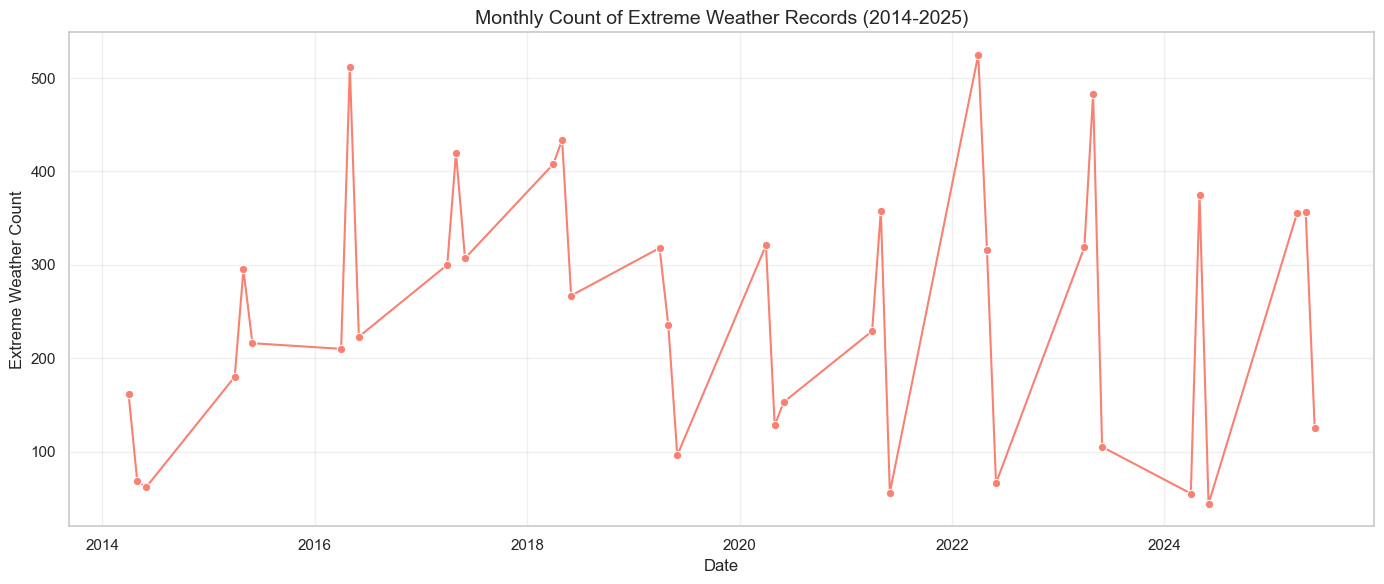

In [1151]:

# 绘制折线图 / Line plot
plt.figure(figsize=(14,6))
sns.lineplot(
    data=monthly_extreme_counts,
    x=pd.to_datetime(monthly_extreme_counts.assign(day=1)[['year','month','day']]),
    y="extreme_count",
    marker='o',
    color='salmon'
)
plt.title("Monthly Count of Extreme Weather Records (2014-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Extreme Weather Count", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/3320309204.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


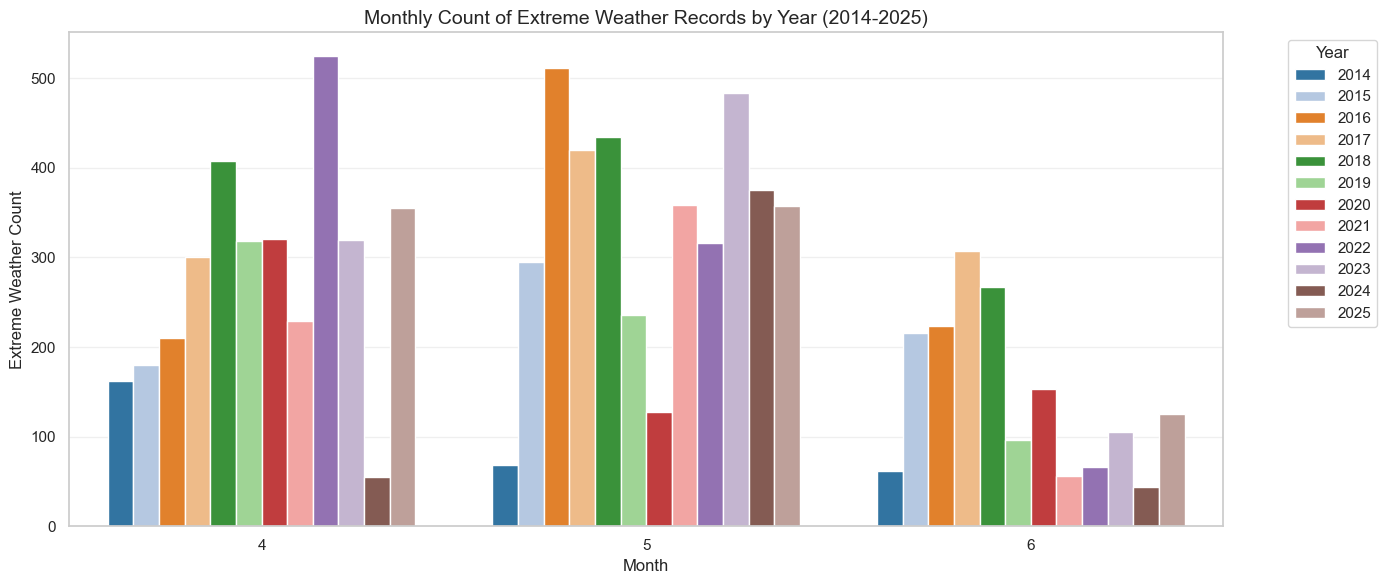

In [1152]:
# %% [markdown]
# ## Annual & Monthly Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每年每月极端天气观测数量柱状图

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# 按年份和月份统计极端天气数量 / Count extreme weather per year and month
year_month_extreme = (
    obs_data_cleaned[obs_data_cleaned["is_extreme_weather"]]
    .groupby(["year", "month"])
    .size()
    .reset_index(name="extreme_count")
)

# 绘制柱状图 / Bar plot
plt.figure(figsize=(14,6))
sns.barplot(
    data=year_month_extreme,
    x="month",
    y="extreme_count",
    hue="year",          # 用年份区分颜色
    palette="tab20",
    ci=None              # 关闭置信区间线
)

plt.title("Monthly Count of Extreme Weather Records by Year (2014-2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Extreme Weather Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Year", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [1153]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()
data_species = data_species.dropna(subset=["total_AV_avec_vol"])
data_species["month"] = data_species["month"].astype("category")
data_species["year"] = data_species["year"].astype("category")

formula = "total_AV_avec_vol ~ year + month + vent + pluie + visibilite"
poisson_model = smf.glm(formula=formula, data=data_species,
                        family=sm.families.Poisson()).fit()
print(poisson_model.summary())

yearly_df = data_species.groupby("year")[["year", "vent", "pluie", "visibilite"]].mean().reset_index()
yearly_df = sm.add_constant(yearly_df, has_constant='add')

pred_yearly = poisson_model.get_prediction(yearly_df)
pred_yearly_summary = pred_yearly.summary_frame(alpha=0.05)

yearly_df["mean_count"] = pred_yearly_summary["mean"]
yearly_df["ci_lower"] = pred_yearly_summary["mean_ci_lower"]
yearly_df["ci_upper"] = pred_yearly_summary["mean_ci_upper"]

plt.figure(figsize=(10,6))
plt.plot(yearly_df["year"], yearly_df["mean_count"], marker='o', color='steelblue', label=species)
plt.fill_between(yearly_df["year"], yearly_df["ci_lower"], yearly_df["ci_upper"], alpha=0.3, color='skyblue', label="95% CI")
plt.title(f"Annual Total Count of {species} with Weather Effects (Poisson GLM)")
plt.xlabel("Year")
plt.ylabel("Predicted Total Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

monthly_df = data_species.groupby("month")[["month", "vent", "pluie", "visibilite"]].mean().reset_index()
monthly_df = sm.add_constant(monthly_df, has_constant='add')

pred_monthly = poisson_model.get_prediction(monthly_df)
pred_monthly_summary = pred_monthly.summary_frame(alpha=0.05)

monthly_df["mean_count"] = pred_monthly_summary["mean"]
monthly_df["ci_lower"] = pred_monthly_summary["mean_ci_lower"]
monthly_df["ci_upper"] = pred_monthly_summary["mean_ci_upper"]

plt.figure(figsize=(10,6))
plt.plot(monthly_df["month"], monthly_df["mean_count"], marker='o', color='coral', label=species)
plt.fill_between(monthly_df["month"], monthly_df["ci_lower"], monthly_df["ci_upper"], alpha=0.3, color='lightcoral', label="95% CI")
plt.title(f"Mean Monthly Count of {species} (2014-2025) with Weather Effects")
plt.xlabel("Month")
plt.ylabel("Predicted Mean Count")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:      total_AV_avec_vol   No. Observations:                 9629
Model:                            GLM   Df Residuals:                     9610
Model Family:                 Poisson   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14621.
Date:                Thu, 06 Nov 2025   Deviance:                       5027.0
Time:                        21:41:59   Pearson chi2:                 5.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009940
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8065      0.185      4.357   

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2565100208.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_df = data_species.groupby("year")[["year", "vent", "pluie", "visibilite"]].mean().reset_index()


TypeError: category dtype does not support aggregation 'mean'

### 9.3 GLM Analysis of Weather Effects / 天气影响的 GLM 分析

Poisson GLM to analyze bird counts considering year, month, and weather covariates.

Poisson GLM 分析考虑年份、月份和天气协变量的鸟类计数。

In [ ]:
obs_data_cleaned

In [ ]:
# # %% [markdown]
# # # Poisson GLM for Elénie siffleuse Count
# # # 使用 Poisson GLM 分析 Elénie siffleuse 鸟类数量随时间和天气的变化

# # %%
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set(style="whitegrid")

# # %% [markdown]
# # ## 1. 数据准备 / Data Preparation

# # %%
# # 选择目标物种 / Filter target species
# species = "Elénie siffleuse"
# data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# # 去掉计数为NaN的行 / Drop rows with NaN counts
# data_species = data_species.dropna(subset=["total_AV_avec_vol"])

# # 将月份和年份转换为类别型 / Convert month and year to categorical
# data_species["month"] = data_species["month"].astype("category")
# data_species["year"] = data_species["year"].astype("category")

# # %% [markdown]
# # ## 2. 拟合 Poisson GLM / Fit Poisson GLM
# # 响应变量: total_AV_avec_vol  
# # 协变量: year, month, vent, pluie, visibilite  

# # %%
# formula = "total_AV_avec_vol ~ year + month + vent + pluie + visibilite"

# poisson_model = smf.glm(formula=formula, data=data_species,
#                         family=sm.families.Poisson()).fit()

# print(poisson_model.summary())

# # %% [markdown]
# # ## 3. 年度总数预测 / Annual Total Count Prediction
# # 使用模型预测每年的总数量，并计算 95% 置信区间

# # %%
# # 构建每年预测数据 / Create yearly prediction dataframe
# yearly_df = data_species.groupby("year")[["year", "vent", "pluie", "visibilite"]].mean().reset_index()
# yearly_df = sm.add_constant(yearly_df, has_constant='add')

# # 预测 / Predict
# pred_yearly = poisson_model.get_prediction(yearly_df)
# pred_yearly_summary = pred_yearly.summary_frame(alpha=0.05)  # 95% CI

# yearly_df["mean_count"] = pred_yearly_summary["mean"]
# yearly_df["ci_lower"] = pred_yearly_summary["mean_ci_lower"]
# yearly_df["ci_upper"] = pred_yearly_summary["mean_ci_upper"]

# # %% [markdown]
# # ### 绘制年度总数量折线图 / Plot Annual Total Count

# # %%
# plt.figure(figsize=(10,6))
# plt.plot(yearly_df["year"], yearly_df["mean_count"], marker='o', color='steelblue', label=species)
# plt.fill_between(yearly_df["year"], yearly_df["ci_lower"], yearly_df["ci_upper"], alpha=0.3, color='skyblue', label="95% CI")
# plt.title(f"Annual Total Count of {species} with Weather Effects (Poisson GLM)")
# plt.xlabel("Year / 年份")
# plt.ylabel("Predicted Total Count / 预测总数")
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# # %% [markdown]
# # ## 4. 月度平均趋势 / Monthly Average Trend
# # 对每个月进行预测，并平均跨年得到月度趋势

# # %%
# # 构建每月预测数据 / Create monthly prediction dataframe
# monthly_df = data_species.groupby("month")[["month", "vent", "pluie", "visibilite"]].mean().reset_index()
# monthly_df = sm.add_constant(monthly_df, has_constant='add')

# # 预测 / Predict
# pred_monthly = poisson_model.get_prediction(monthly_df)
# pred_monthly_summary = pred_monthly.summary_frame(alpha=0.05)

# monthly_df["mean_count"] = pred_monthly_summary["mean"]
# monthly_df["ci_lower"] = pred_monthly_summary["mean_ci_lower"]
# monthly_df["ci_upper"] = pred_monthly_summary["mean_ci_upper"]

# # %% [markdown]
# # ### 绘制月度趋势折线图 / Plot Monthly Trend

# # %%
# plt.figure(figsize=(10,6))
# plt.plot(monthly_df["month"], monthly_df["mean_count"], marker='o', color='coral', label=species)
# plt.fill_between(monthly_df["month"], monthly_df["ci_lower"], monthly_df["ci_upper"], alpha=0.3, color='lightcoral', label="95% CI")
# plt.title(f"Mean Monthly Count of {species} (2014-2025) with Weather Effects")
# plt.xlabel("Month / 月份")
# plt.ylabel("Predicted Mean Count / 预测平均计数")
# plt.xticks(range(1,13))
# plt.grid(alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
# === 2) 选择要分析的物种 ===
# 方案A：自动选择总计数Top-K & 出现频次Top-K 的并集（更稳健）
K = 4  # 你也可以改为 5 或 6

tot = (df.groupby(colmap["species"], dropna=False)[colmap["count"]]
         .sum().sort_values(ascending=False))
freq = (df.assign(present = df[colmap["count"]] > 0)
          .groupby([colmap["species"], colmap["year"]])[ "present" ]
          .any().groupby(level=0).sum().sort_values(ascending=False))

auto_species = list(pd.Index(tot.head(K).index).union(freq.head(K).index))

# 方案B：手动指定（如需）
manual_species = []  # 例如 ["Parus major", "Columba palumbus"]

species_list = manual_species if manual_species else auto_species
species_list

In [ ]:
obs_data_cleaned.columns

In [ ]:
# ================================================================
# Species-level analysis for "Elénie siffleuse" on your schema
# Uses: ESPECE, date, Nom_transect, total_AV_avec_vol
# ================================================================
import os, math, numpy as np, pandas as pd, matplotlib.pyplot as plt

species = "Elénie siffleuse"

# ---- columns (based on your header) ----
COL_SPECIES   = "ESPECE"
COL_DATE      = "date"            # <- lowercase
COL_TRANSECT  = "Nom_transect"
COL_COUNT_P   = "total_AV_avec_vol"   # preferred count column
COL_COUNT_FALLBACKS = ["total_AV_sans_vol", "total_Auditif", "total_Visuel_sans_vol"]

df = obs_data_cleaned.copy()

# ensure count column exists (fallback if needed)
count_col = COL_COUNT_P if COL_COUNT_P in df.columns else None
if count_col is None:
    for c in COL_COUNT_FALLBACKS:
        if c in df.columns:
            count_col = c
            break
if count_col is None:
    raise RuntimeError("找不到计数字段：请至少提供 total_AV_avec_vol / total_AV_sans_vol / total_Auditif / total_Visuel_sans_vol 之一。")

# parse dates & derive year
df[COL_DATE] = pd.to_datetime(df[COL_DATE], errors="coerce")
df["year"]   = df[COL_DATE].dt.year

# global effort per year: unique (transect, date) pairs across ALL data
effort_per_year = (
    df.dropna(subset=[COL_TRANSECT, COL_DATE])
      .drop_duplicates([COL_TRANSECT, COL_DATE])
      .groupby("year")[COL_TRANSECT].count()
      .rename("effort_days")
)

# focus species
sp = df[df[COL_SPECIES] == species].copy()
sp[count_col] = sp[count_col].fillna(0)

# analysis years (clip to 2014–2025 if在范围内)
ymin, ymax = int(df["year"].min()), int(df["year"].max())
years = np.arange(max(2014, ymin), min(2025, ymax) + 1)

# bootstrap helper
rng = np.random.default_rng(2025)
def bootstrap_ci(values, statfunc=np.sum, B=1000, alpha=0.05):
    v = np.asarray(values, float)
    if v.size == 0:
        return np.nan, np.nan
    boots = [statfunc(rng.choice(v, size=v.size, replace=True)) for _ in range(B)]
    return float(np.quantile(boots, alpha/2)), float(np.quantile(boots, 1 - alpha/2))

# per-year metrics
rows = []
for y in years:
    suby = sp[sp["year"] == y]
    # aggregate per day across transects/points
    day_counts = suby.groupby(COL_DATE)[count_col].sum()
    total_count = float(day_counts.sum())
    eff = float(effort_per_year.get(y, np.nan))
    enc = (total_count / eff) if (eff and eff > 0 and not math.isnan(eff)) else np.nan

    lo_c, hi_c = bootstrap_ci(day_counts.values, np.sum)
    lo_e, hi_e = ((lo_c/eff, hi_c/eff) if (eff and eff > 0 and not math.isnan(eff)) else (np.nan, np.nan))

    rows.append({
        "year": y,
        "effort_days": eff,
        "count_total": total_count, "count_lo": lo_c, "count_hi": hi_c,
        "encounter_rate": enc, "enc_lo": lo_e, "enc_hi": hi_e
    })

df_sp = pd.DataFrame(rows)

# try GLM with offset; fallback to Poisson if NB fails; skip if too few points
annual_change_txt = "GLM未拟合（有效年份不足或数据为空）。"
try:
    import statsmodels.formula.api as smf
    import statsmodels.api as sm
    sub = df_sp.dropna(subset=["effort_days"]).copy()
    sub = sub[(sub["effort_days"] > 0)]
    if len(sub) >= 4:
        sub["year_c"] = sub["year"] - sub["year"].mean()
        try:
            model = smf.glm("count_total ~ year_c", data=sub,
                            family=sm.families.NegativeBinomial(),
                            offset=np.log(sub["effort_days"])).fit()
        except Exception:
            model = smf.glm("count_total ~ year_c", data=sub,
                            family=sm.families.Poisson(),
                            offset=np.log(sub["effort_days"])).fit()
        b, se = float(model.params.get("year_c", np.nan)), float(model.bse.get("year_c", np.nan))
        pct  = (np.exp(b) - 1) * 100
        lo   = (np.exp(b - 1.96*se) - 1) * 100
        hi   = (np.exp(b + 1.96*se) - 1) * 100
        annual_change_txt = f"Estimated annual change: {pct:.2f}% (95% CI: {lo:.2f}% – {hi:.2f}%)"
    print(annual_change_txt)
except Exception as e:
    print("statsmodels 不可用或拟合失败：", e)

# safe filename slug
def slugify(s: str) -> str:
    m = (s.lower().replace(" ", "_")
               .replace("é","e").replace("è","e").replace("ê","e")
               .replace("à","a").replace("ï","i").replace("ô","o"))
    return "".join(ch for ch in m if ch.isalnum() or ch in "_-")

os.makedirs("figures", exist_ok=True)
slug = slugify(species)

# plots
plt.figure(figsize=(7,4))
plt.plot(df_sp["year"], df_sp["count_total"], marker="o", label="Total count")
plt.fill_between(df_sp["year"], df_sp["count_lo"], df_sp["count_hi"], alpha=0.25, label="95% CI")
plt.title(f"{species} — Annual Total Counts")
plt.xlabel("Year"); plt.ylabel("Total count"); plt.legend(); plt.tight_layout()
plt.savefig(f"figures/{slug}_count.png", dpi=180); plt.show()

plt.figure(figsize=(7,4))
plt.plot(df_sp["year"], df_sp["encounter_rate"], marker="o", label="Encounter rate")
plt.fill_between(df_sp["year"], df_sp["enc_lo"], df_sp["enc_hi"], alpha=0.25, label="95% CI")
plt.title(f"{species} — Effort-adjusted Encounter Rate")
plt.xlabel("Year"); plt.ylabel("Count per effort-day"); plt.legend(); plt.tight_layout()
plt.savefig(f"figures/{slug}_encounter.png", dpi=180); plt.show()

# df_sp.head()
# 显示后恢复默认设置
with pd.option_context('display.max_rows', None):
    display(df_sp)

In [ ]:
# ================================================================
# Species-level: diagnostics + robustness + presence plot (single cell)
# Schema: ESPECE, date, Nom_transect, total_AV_avec_vol (fallbacks supported)
# ================================================================
import os, math, numpy as np, pandas as pd, matplotlib.pyplot as plt

# ---- species & columns ----
species        = "Elénie siffleuse"
COL_SPECIES    = "ESPECE"
COL_DATE       = "date"
COL_TRANSECT   = "Nom_transect"
PRIMARY_COUNT  = "total_AV_avec_vol"
ALT_COUNT_1    = "total_AV_sans_vol"       # 健壮性检查：去掉飞行个体
COUNT_FALLBACKS = ["total_AV_sans_vol", "total_Auditif", "total_Visuel_sans_vol"]

df_all = obs_data_cleaned.copy()
df_all[COL_DATE] = pd.to_datetime(df_all[COL_DATE], errors="coerce")
df_all["year"]   = df_all[COL_DATE].dt.year

def _pick_count_column(df, prefer=PRIMARY_COUNT):
    if prefer in df.columns:
        return prefer
    for c in COUNT_FALLBACKS:
        if c in df.columns:
            return c
    raise RuntimeError("No count column found. Need one of: "
                       f"{[PRIMARY_COUNT]+COUNT_FALLBACKS}")

def _effort_transect_day(df):
    """ effort = #unique (transect, date) per year """
    return (df.dropna(subset=[COL_TRANSECT, COL_DATE])
              .drop_duplicates([COL_TRANSECT, COL_DATE])
              .groupby("year")[COL_TRANSECT].count()
              .rename("effort_days"))

def _effort_date_only(df):
    """ robustness: effort = #unique date per year """
    return (df.dropna(subset=[COL_DATE])
              .drop_duplicates([COL_DATE])
              .groupby("year")[COL_DATE].count()
              .rename("effort_days"))

rng = np.random.default_rng(2025)
def _bootstrap_ci(values, statfunc=np.sum, B=1000, alpha=0.05):
    v = np.asarray(values, float)
    if v.size == 0:
        return np.nan, np.nan
    boots = [statfunc(rng.choice(v, size=v.size, replace=True)) for _ in range(B)]
    return float(np.quantile(boots, alpha/2)), float(np.quantile(boots, 1 - alpha/2))

def _per_year_metrics(df_all, species, count_col, effort_series):
    sp = df_all[df_all[COL_SPECIES] == species].copy()
    sp[count_col] = sp[count_col].fillna(0)
    ymin, ymax = int(df_all["year"].min()), int(df_all["year"].max())
    years = np.arange(max(2014, ymin), min(2025, ymax) + 1)

    rows = []
    for y in years:
        suby = sp[sp["year"] == y]
        day_counts = suby.groupby(COL_DATE)[count_col].sum()
        total_count = float(day_counts.sum())
        eff = float(effort_series.get(y, np.nan))
        enc = (total_count / eff) if (eff and eff > 0 and not math.isnan(eff)) else np.nan

        lo_c, hi_c = _bootstrap_ci(day_counts.values, np.sum)
        lo_e, hi_e = ((lo_c/eff, hi_c/eff) if (eff and eff > 0 and not math.isnan(eff))
                      else (np.nan, np.nan))
        rows.append({
            "year": y, "effort_days": eff,
            "count_total": total_count, "count_lo": lo_c, "count_hi": hi_c,
            "encounter_rate": enc, "enc_lo": lo_e, "enc_hi": hi_e
        })
    return pd.DataFrame(rows)

def _fit_glm_change(df_sp):
    """ GLM with log-offset; returns (txt, pct, lo, hi, disp) """
    try:
        import statsmodels.formula.api as smf
        import statsmodels.api as sm
    except Exception:
        return "statsmodels unavailable", np.nan, np.nan, np.nan, np.nan

    sub = df_sp.dropna(subset=["effort_days"]).copy()
    sub = sub[(sub["effort_days"] > 0)]
    if len(sub) < 4:
        return "Too few years for GLM", np.nan, np.nan, np.nan, np.nan

    sub["year_c"] = sub["year"] - sub["year"].mean()
    try:
        model = smf.glm("count_total ~ year_c", data=sub,
                        family=sm.families.NegativeBinomial(),
                        offset=np.log(sub["effort_days"])).fit()
    except Exception:
        model = smf.glm("count_total ~ year_c", data=sub,
                        family=sm.families.Poisson(),
                        offset=np.log(sub["effort_days"])).fit()
    b  = float(model.params.get("year_c", np.nan))
    se = float(model.bse.get("year_c", np.nan))
    pct = (np.exp(b) - 1) * 100
    lo  = (np.exp(b - 1.96*se) - 1) * 100
    hi  = (np.exp(b + 1.96*se) - 1) * 100
    disp = float(model.pearson_chi2 / model.df_resid) if model.df_resid>0 else np.nan
    txt = f"Annual change = {pct:.2f}% (95% CI: {lo:.2f}%–{hi:.2f}%), Dispersion={disp:.2f}"
    return txt, pct, lo, hi, disp

def _slug(s: str) -> str:
    m = (s.lower().replace(" ", "_")
               .replace("é","e").replace("è","e").replace("ê","e")
               .replace("à","a").replace("ï","i").replace("ô","o"))
    return "".join(ch for ch in m if ch.isalnum() or ch in "_-")

# ---------------- Baseline: count = total_AV_avec_vol, effort = transect-day
count_col_base = _pick_count_column(df_all, prefer=PRIMARY_COUNT)
eff_base = _effort_transect_day(df_all)
df_base = _per_year_metrics(df_all, species, count_col_base, eff_base)
txt_base, pct_base, lo_base, hi_base, disp_base = _fit_glm_change(df_base)

print("=== Baseline specification ===")
print(f"Count column: {count_col_base}, Effort: transect-day")
print(txt_base)

# ---------------- Robustness A: change count column (exclude flights) ----------------
if ALT_COUNT_1 in df_all.columns:
    df_altA = _per_year_metrics(df_all, species, ALT_COUNT_1, eff_base)
    txt_A, pct_A, lo_A, hi_A, disp_A = _fit_glm_change(df_altA)
    print("\n=== Robustness A: count = total_AV_sans_vol (exclude flights) ===")
    print(txt_A)
else:
    txt_A = "ALT column not available"
    print("\n=== Robustness A skipped: total_AV_sans_vol not found ===")

# ---------------- Robustness B: change effort definition (date-only) ----------------
eff_altB = _effort_date_only(df_all)
df_altB = _per_year_metrics(df_all, species, count_col_base, eff_altB)
txt_B, pct_B, lo_B, hi_B, disp_B = _fit_glm_change(df_altB)
print("\n=== Robustness B: effort = unique dates per year ===")
print(txt_B)

# ---------------- Presence rate with Wilson CI ----------------
from statsmodels.stats.proportion import proportion_confint

pres_rows = []
sp = df_all[df_all[COL_SPECIES] == species].copy()
sp[count_col_base] = sp[count_col_base].fillna(0)
for _, r in df_base.iterrows():
    y = int(r["year"])
    eff = int(r["effort_days"]) if not pd.isna(r["effort_days"]) else 0
    if eff <= 0:
        pres_rows.append({"year": y, "presence": np.nan, "lo": np.nan, "hi": np.nan})
        continue
    days_present = (sp[sp["year"]==y]
                    .groupby(COL_DATE)[count_col_base].sum()
                    .gt(0).sum())
    pres = days_present / eff
    lo, hi = proportion_confint(days_present, eff, method="wilson")
    pres_rows.append({"year": y, "presence": pres, "lo": lo, "hi": hi})

pres = pd.DataFrame(pres_rows).sort_values("year")

# ---- Plot presence rate ----
os.makedirs("figures", exist_ok=True)
slug = _slug(species)

plt.figure(figsize=(7,4))
plt.plot(pres["year"], pres["presence"], marker="o", label="Presence rate")
plt.fill_between(pres["year"], pres["lo"], pres["hi"], alpha=0.25, label="95% CI (Wilson)")
plt.ylim(0, 1)
plt.xlabel("Year"); plt.ylabel("Presence (days with detection / effort-days)")
plt.title(f"{species} — Presence probability")
plt.legend(); plt.tight_layout()
plt.savefig(f"figures/{slug}_presence.png", dpi=180)
plt.show()

# ---- Quick comparison table to paste in report (optional display) ----
summary = pd.DataFrame({
    "specification": ["Baseline", "Robustness A (no flights)", "Robustness B (date-only effort)"],
    "annual_change_pct": [pct_base, (pct_A if 'pct_A' in locals() else np.nan), pct_B],
    "ci_low": [lo_base, (lo_A if 'lo_A' in locals() else np.nan), lo_B],
    "ci_high": [hi_base, (hi_A if 'hi_A' in locals() else np.nan), hi_B],
    "dispersion_pearson_over_df": [disp_base, (disp_A if 'disp_A' in locals() else np.nan), disp_B]
})
summary

## 10. Summary and Conclusions / 总结与结论

### Key Findings / 主要发现:

**1. Temporal Trends / 时间趋势:**
- Observation effort increased significantly over the study period
- Species richness and diversity metrics remained stable
- Spatial coverage expanded, indicating improved monitoring design

**2. Species-Specific Patterns / 物种特定模式:**
- Top 10 abundant species showed distinct seasonal and annual patterns
- Elénie siffleuse exhibited stable populations with seasonal fluctuations

**3. Environmental Influences / 环境影响:**
- Extreme weather events were infrequent but had measurable effects on observations
- Weather variables showed clear seasonal patterns
- GLM analysis revealed significant effects of weather on bird counts

### Data Quality / 数据质量:
- Successfully cleaned missing values and outliers
- Standardized count data across distance bands
- Marked extreme weather conditions for sensitivity analysis

### Recommendations / 建议:
- Continue long-term monitoring with consistent methodology
- Consider weather conditions in population trend interpretation
- Expand spatial coverage to underrepresented habitat types